In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

INFO:SparkMonitorKernel:SparkMonitor comm opened from frontend.


['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packa

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

# norm_to_1fb = True
norm_to_1fb = False

lepton_type = 'muon'
# lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

plot_separate_syst_uncertainties = False

save_figures = False

# run_tables = False

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 14.025827145867588, '2018B1': 6.620869367493728, '2018B2': 0.430376623828928, '2018C': 6.891684998276784, '2018D1': 20.939902986506983, '2018D2': 10.856932131702669}, 'electron': {'2018A': 13.088399561509418, '2018B1': 6.629521091507798, '2018B2': 0.430939012174748, '2018C': 6.8915954055654725, '2018D1': 20.94983928140255, '2018D2': 10.862083907209522}}
Luminosity 2018 muon: 59.76559325367668
Luminosity 2018 electron: 58.85237825936951


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [4]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9932      99320 8072610517918790459  0              130.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0           0.0  236.454941   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    55        548   10111487040465804063 0           0.0  211.374191   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9932      99320 8072610517918790459  0           0.0  396.427917   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0     -0.605854 -0.769534   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9932      99320 8072610517918790459  0      0.270221  1.273853   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       291.459412   71.138802   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    55        548   10111487040465804063 0       404.987579   10.673149   
    60        593   11479252221660711580 0       520.812378   82.395920   
...                                                     ...         ...   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9932      99320 8072610517918790459  0       425.057953   76.337906   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   10        98    11108945275985346800 0          76.202141   0.250948  ...   
    2

In [8]:
msk_columns_ = [ key_[:len('MX')] == 'MX' for key_ in df_signals_protons_multiRP_events[ label_ref_ ].columns ]
columns_ = df_signals_protons_multiRP_events[ label_ref_ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_events[ label_ref_ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       666.376770   666.376770   
    25        246   6732049695921593490  0      1679.362671  1679.362671   
    48        473   8749266920161569861  0      1038.845215  1038.845215   
    55        548   10111487040465804063 0      1005.320740  1005.320740   
    60        593   11479252221660711580 0      1504.115356  1504.115356   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2111.751709  2111.751709   
    9932      99320 8072610517918790459  0       905.621582   905.621582   
    9958      99577 8240557362429832909  0      1371.073364  1371.073364   
    9967      99661 9457232060636232257  0      1223.536499  1223.536499   
    9999      99982 2401133407686114619  0      1764.854004  1764.854004   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       666.376781   692.850704   
    25        246   6732049695921593490  0      1679.362655  1735.034726   
    48        473   8749266920161569861  0      1038.845241  1076.216658   
    55        548   10111487040465804063 0      1005.320713  1042.008649   
    60        593   11479252221660711580 0      1504.115388  1555.292671   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2111.751601  2197.284640   
    9932      99320 8072610517918790459  0       905.621558   940.809948   
    9958      99577 8240557362429832909  0      1371.073313  1422.517645   
    9967      99661 9457232060636232257  0      1223.536506  1265.728505   
    9999      99982 2401133407686114619  0      1764.853969  1823.203665   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   10        98    11108945275985346800 0       638.806607   693.868381   
    25        246   6732049695921593490  0      1621.780535  1737.215635   
    48        473   8749266920161569861  0      1000.078217  1078.374677   
    55        548   10111487040465804063 0       967.242214  1043.600592   
    60        593   11479252221660711580 0      1451.134369  1558.857142   
...                                                     ...          ...   
    9921      99203 4631958745543777280  0      2022.604595  2191.355024   
    9932      99320 8072610517918790459  0       869.009568   939.459907   
    9958      99577 8240557362429832909  0      1317.621961  1419.562018   
    9967      99661 9457232060636232257  0      1179.836741  1268.921797   
    9999      99982 2401133407686114619  0      1704.508093  1826.005862   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   10        98    11108945275985346800 0        721.434515    665.160808   
    25        246   6732049695921593490  0       1794.805613   1677.649884   
    48        473   8749266920161569861  0       1117.168160   1038.132549   
    55        548   10111487040465804063 0       1081.685490   1004.072154   
    60        593   11479252221660711580 0       1611.896995   1503.947889   
...                                                      ...           ...   
    9921      99203 4631958745543777280  0       2280.112335   2098.847642   
    9932      99320 8072610517918790459  0        975.963051    901.479869   
    9958      99577 8240557362429832909  0       1472.825701   1364.220327   
    9967      99661 9457232060636232257  0       1312.678798   1223.601008   
    9999      99982 2401133407686114619  0       1886.377307   1763.568957   

                                                MX_m100_nom  MX_m100_p100  

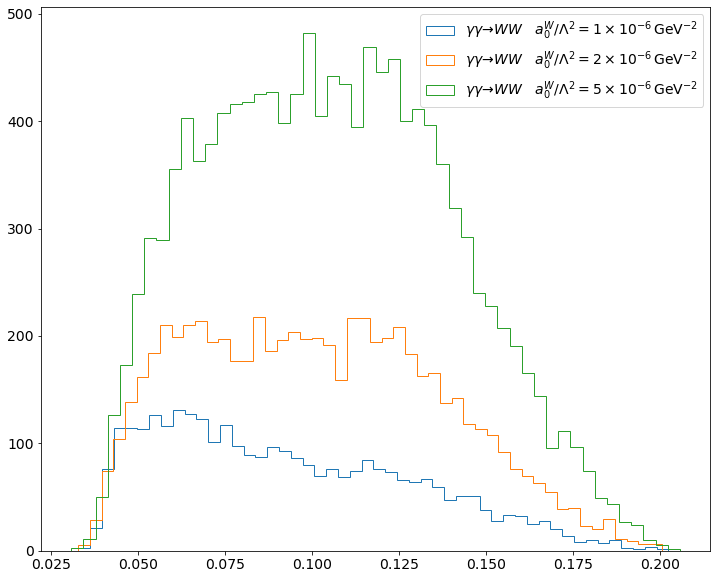

In [9]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

### Ouf of acceptance protons

### Signal with pileup/data protons

In [10]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [11]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    109       1087  17131802332494696354 0              130.0       0.4   
    169       1689  6907600029324167612  0              138.0       0.4   
    1161      11609 795661169471817171   0              139.0       0.4   
    1424      14234 5806656075052075346  0              130.0       0.4   
...                                                       ...       ...   
    8754      87539 11771871423485135104 0              154.0       0.4   
    9292      92914 8991196666050499818  0              158.0       0.4   
    9315      93145 13804778771917431660 0              153.0       0.4   
    9601      96002 10180400734851154199 0              152.0       0.4   
    9988      99879 8441746362180913029  0              151.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    109       1087  17131802332494696354 0           0.0  247.038254   
    169       1689  6907600029324167612  0           0.0  786.828735   
    1161      11609 795661169471817171   0           0.0  596.467224   
    1424      14234 5806656075052075346  0           0.0  393.835388   
...                                                  ...         ...   
    8754      87539 11771871423485135104 0           0.0  234.976624   
    9292      92914 8991196666050499818  0           0.0  463.928131   
    9315      93145 13804778771917431660 0           0.0  311.160187   
    9601      96002 10180400734851154199 0           0.0  299.320282   
    9988      99879 8441746362180913029  0           0.0  238.896408   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    109       1087  17131802332494696354 0      1.403882 -2.276454   
    169       1689  6907600029324167612  0      0.888920 -1.119034   
    1161      11609 795661169471817171   0      0.415472 -1.867239   
    1424      14234 5806656075052075346  0     -1.285722  0.731988   
...                                                  ...       ...   
    8754      87539 11771871423485135104 0      0.512994 -1.157326   
    9292      92914 8991196666050499818  0     -0.329733  2.987611   
    9315      93145 13804778771917431660 0     -0.670576 -1.477166   
    9601      96002 10180400734851154199 0      1.536158  3.048037   
    9988      99879 8441746362180913029  0      0.281532 -2.066732   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    109       1087  17131802332494696354 0       542.039185  72.382683   
    169       1689  6907600029324167612  0      1127.200195  69.586273   
    1161      11609 795661169471817171   0       657.944702  71.605080   
    1424      14234 5806656075052075346  0       773.644165  82.892929   
...                                                     ...        ...   
    8754      87539 11771871423485135104 0       274.035950  11.067647   
    9292      92914 8991196666050499818  0       498.903839  75.917595   
    9315      93145 13804778771917431660 0       394.857422  73.951088   
    9601      96002 10180400734851154199 0       731.494568  56.432407   
    9988      99879 8441746362180913029  0       256.136414  12.341436   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    109       1087

In [12]:
msk_columns_ = [ key_[:len('MX')] == 'MX' for key_ in df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns ]
columns_ = df_signals_protons_multiRP_mix_protons_events[ label_ref_ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   18        175   8328339178254842181  0      1084.570190  1084.570190   
    109       1087  17131802332494696354 0       654.002930   654.002930   
    169       1689  6907600029324167612  0       960.377869   960.377869   
    1161      11609 795661169471817171   0       975.507202   975.507202   
    1424      14234 5806656075052075346  0      2007.418335  2007.418335   
...                                                     ...          ...   
    8754      87539 11771871423485135104 0      1600.754028  1600.754028   
    9292      92914 8991196666050499818  0       696.289429   696.289429   
    9315      93145 13804778771917431660 0      1253.836304  1253.836304   
    9601      96002 10180400734851154199 0      1330.903931  1330.903931   
    9988      99879 8441746362180913029  0      2026.452393  2026.452393   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   18        175   8328339178254842181  0      1084.570140  1084.570109   
    109       1087  17131802332494696354 0       654.002938   654.002920   
    169       1689  6907600029324167612  0       960.377842   960.377890   
    1161      11609 795661169471817171   0       975.507185   975.507154   
    1424      14234 5806656075052075346  0      2007.418394  2007.418323   
...                                                     ...          ...   
    8754      87539 11771871423485135104 0      1600.754037  1600.754048   
    9292      92914 8991196666050499818  0       696.289442   696.289443   
    9315      93145 13804778771917431660 0      1253.836259  1253.836218   
    9601      96002 10180400734851154199 0      1330.903970  1330.903986   
    9988      99879 8441746362180913029  0      2026.452452  2026.452458   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   18        175   8328339178254842181  0      1084.570109  1084.570109   
    109       1087  17131802332494696354 0       654.002920   654.002920   
    169       1689  6907600029324167612  0       960.377890   960.377890   
    1161      11609 795661169471817171   0       975.507154   975.507154   
    1424      14234 5806656075052075346  0      2007.418323  2007.418323   
...                                                     ...          ...   
    8754      87539 11771871423485135104 0      1600.754048  1600.754048   
    9292      92914 8991196666050499818  0       696.289443   696.289443   
    9315      93145 13804778771917431660 0      1253.836218  1253.836218   
    9601      96002 10180400734851154199 0      1330.903986  1330.903986   
    9988      99879 8441746362180913029  0      2026.452458  2026.452458   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   18        175   8328339178254842181  0       1084.570109   1084.570109   
    109       1087  17131802332494696354 0        654.002920    654.002920   
    169       1689  6907600029324167612  0        960.377890    960.377890   
    1161      11609 795661169471817171   0        975.507154    975.507154   
    1424      14234 5806656075052075346  0       2007.418323   2007.418323   
...                                                      ...           ...   
    8754      87539 11771871423485135104 0       1600.754048   1600.754048   
    9292      92914 8991196666050499818  0        696.289443    696.289443   
    9315      93145 13804778771917431660 0       1253.836218   1253.836218   
    9601      96002 10180400734851154199 0       1330.903986   1330.903986   
    9988      99879 8441746362180913029  0       2026.452458   2026.452458   

                                                MX_m100_nom  MX_m100_p100  

### Signal with event mixing (signal and pileup protons)

In [13]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-muon-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [14]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    22        213   8833972083606893094  0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    53        526   557268409041302119   0              149.0       0.4   
...                                                       ...       ...   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9982      99816 7540378755937222023  0              141.0       0.4   
    9988      99879 8441746362180913029  0              151.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    22        213   8833972083606893094  0           0.0  214.828033   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    53        526   557268409041302119   0           0.0  202.998352   
...                                                  ...         ...   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9982      99816 7540378755937222023  0           0.0  298.560944   
    9988      99879 8441746362180913029  0           0.0  238.896408   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    22        213   8833972083606893094  0      0.687979  0.375376   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    53        526   557268409041302119   0     -0.314340 -2.106972   
...                                                  ...       ...   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9982      99816 7540378755937222023  0     -0.762441 -2.175475   
    9988      99879 8441746362180913029  0      0.281532 -2.066732   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0       888.046204   78.547112   
    22        213   8833972083606893094  0       280.092041   71.716690   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    53        526   557268409041302119   0       218.904190   26.348419   
...                                                     ...         ...   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9971      99701 15913202775396096505 0       773.146790   68.773056   
    9982      99816 7540378755937222023  0       395.441376    5.896878   
    9988      99879 8441746362180913029  0       256.136414   12.341436   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    2

In [15]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    64        636   1889158458402674605  0              130.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    77        762   898270863651217580   0              148.0       0.4   
...                                                       ...       ...   
    9915      99148 9027171743398588963  0              153.0       0.4   
    9917      99167 7037532472275048024  0              148.0       0.4   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    64        636   1889158458402674605  0           0.0  274.994659   
    71        706   10284919335476110625 0           0.0  568.194763   
    77        762   898270863651217580   0           0.0  241.249664   
...                                                  ...         ...   
    9915      99148 9027171743398588963  0           0.0  775.930786   
    9917      99167 7037532472275048024  0           0.0  603.757324   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    64        636   1889158458402674605  0      0.914896 -1.320226   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    77        762   898270863651217580   0     -0.617383  0.646603   
...                                                  ...       ...   
    9915      99148 9027171743398588963  0     -0.809761 -1.105224   
    9917      99167 7037532472275048024  0      0.529868  0.767814   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    64        636   1889158458402674605  0       408.026917   74.735039   
    71        706   10284919335476110625 0      1031.590454   67.864975   
    77        762   898270863651217580   0       294.636505   39.659046   
...                                                     ...         ...   
    9915      99148 9027171743398588963  0      1050.636108   11.372771   
    9917      99167 7037532472275048024  0       699.042664   77.520233   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   25        246   6732049695921593490  0         114.010490   0.172032  ...   
    4

In [16]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   22        213   8833972083606893094  0              130.0       0.4   
    102       1012  3261322430295409192  0              152.0       0.4   
    109       1087  17131802332494696354 0              130.0       0.4   
    164       1639  14909678990415216261 0              144.0       0.4   
    183       1828  8438789864951974811  0              143.0       0.4   
...                                                       ...       ...   
    9851      98503 7649062376225972291  0              148.0       0.4   
    9863      98621 46158500210360617    0              147.0       0.4   
    9870      98693 12293205995114717539 0              150.0       0.4   
    9872      98713 8407378010332173941  0              130.0       0.4   
    9913      99122 18099696035221687939 0              137.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   22        213   8833972083606893094  0           0.0  214.828033   
    102       1012  3261322430295409192  0           0.0  234.084747   
    109       1087  17131802332494696354 0           0.0  247.038254   
    164       1639  14909678990415216261 0           0.0  216.376907   
    183       1828  8438789864951974811  0           0.0  635.768921   
...                                                  ...         ...   
    9851      98503 7649062376225972291  0           0.0  684.236267   
    9863      98621 46158500210360617    0           0.0  777.608765   
    9870      98693 12293205995114717539 0           0.0  211.723572   
    9872      98713 8407378010332173941  0           0.0  882.710327   
    9913      99122 18099696035221687939 0           0.0  306.848175   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   22        213   8833972083606893094  0      0.687979  0.375376   
    102       1012  3261322430295409192  0      0.887100  0.166378   
    109       1087  17131802332494696354 0      1.403882 -2.276454   
    164       1639  14909678990415216261 0      0.690669  2.125663   
    183       1828  8438789864951974811  0      0.015333  2.030661   
...                                                  ...       ...   
    9851      98503 7649062376225972291  0     -0.329353 -2.905340   
    9863      98621 46158500210360617    0     -0.468492 -0.628372   
    9870      98693 12293205995114717539 0      1.233746 -2.808871   
    9872      98713 8407378010332173941  0      0.206480 -0.686665   
    9913      99122 18099696035221687939 0     -1.948019  1.278039   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   22        213   8833972083606893094  0       280.092041  71.716690   
    102       1012  3261322430295409192  0       344.697906  80.358170   
    109       1087  17131802332494696354 0       542.039185  72.382683   
    164       1639  14909678990415216261 0       279.378326  41.707642   
    183       1828  8438789864951974811  0       644.448792  73.155266   
...                                                     ...        ...   
    9851      98503 7649062376225972291  0       728.856384  64.767853   
    9863      98621 46158500210360617    0       872.500183  21.675562   
    9870      98693 12293205995114717539 0       397.365295  10.246674   
    9872      98713 8407378010332173941  0       908.499634  76.034370   
    9913      99122 18099696035221687939 0      1103.445801  81.988060   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   22        213   8833972083606893094  0          76.635963   0.379205  ...   
    102       1012

In [17]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   53        526   557268409041302119   0              149.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
    113       1129  11186751244676430297 0              137.0       0.4   
    117       1166  11713528567079749674 0              148.0       0.4   
    159       1582  15076025742146567415 0              133.0       0.4   
...                                                       ...       ...   
    9933      99324 3378399744587332274  0              139.0       0.4   
    9946      99457 2787950735724318201  0              146.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   53        526   557268409041302119   0           0.0  202.998352   
    60        593   11479252221660711580 0           0.0  225.833420   
    113       1129  11186751244676430297 0           0.0  730.005859   
    117       1166  11713528567079749674 0           0.0  574.676758   
    159       1582  15076025742146567415 0           0.0  349.045624   
...                                                  ...         ...   
    9933      99324 3378399744587332274  0           0.0  912.393982   
    9946      99457 2787950735724318201  0           0.0  213.740433   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   53        526   557268409041302119   0     -0.314340 -2.106972   
    60        593   11479252221660711580 0      1.460313  1.167191   
    113       1129  11186751244676430297 0      0.327237  2.254548   
    117       1166  11713528567079749674 0      0.028119 -1.932061   
    159       1582  15076025742146567415 0      1.531654 -2.929849   
...                                                  ...       ...   
    9933      99324 3378399744587332274  0      0.317581  0.158812   
    9946      99457 2787950735724318201  0      1.868203 -1.167019   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   53        526   557268409041302119   0       218.904190  26.348419   
    60        593   11479252221660711580 0       520.812378  82.395920   
    113       1129  11186751244676430297 0       778.060303  52.141514   
    117       1166  11713528567079749674 0       589.206909  65.850021   
    159       1582  15076025742146567415 0       850.780273  72.923912   
...                                                     ...        ...   
    9933      99324 3378399744587332274  0       968.950195  60.645046   
    9946      99457 2787950735724318201  0       712.045410  13.965050   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9971      99701 15913202775396096505 0       773.146790  68.773056   
    9999      99982 2401133407686114619  0       864.023926  56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   53        526   557268409041302119   0          28.222254   0.166865  ...   
    60        593 

In [18]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    69        688   12919571703668241873 0              140.0       0.4   
    149       1486  302288139772899374   0              148.0       0.4   
    169       1689  6907600029324167612  0              138.0       0.4   
    198       1976  6724942979978284544  0              142.0       0.4   
...                                                       ...       ...   
    9890      98892 4633971489682408745  0              151.0       0.4   
    9905      99044 6738648298675348810  0              153.0       0.4   
    9963      99621 4411160583016604570  0              147.0       0.4   
    9982      99816 7540378755937222023  0              141.0       0.4   
    9988      99879 8441746362180913029  0              151.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   18        175   8328339178254842181  0           0.0   847.566895   
    69        688   12919571703668241873 0           0.0   328.912140   
    149       1486  302288139772899374   0           0.0   552.783813   
    169       1689  6907600029324167612  0           0.0   786.828735   
    198       1976  6724942979978284544  0           0.0  1120.726562   
...                                                  ...          ...   
    9890      98892 4633971489682408745  0           0.0   335.520660   
    9905      99044 6738648298675348810  0           0.0   237.083923   
    9963      99621 4411160583016604570  0           0.0   904.155273   
    9982      99816 7540378755937222023  0           0.0   298.560944   
    9988      99879 8441746362180913029  0           0.0   238.896408   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    69        688   12919571703668241873 0      1.633069 -1.699650   
    149       1486  302288139772899374   0     -1.301689  0.225664   
    169       1689  6907600029324167612  0      0.888920 -1.119034   
    198       1976  6724942979978284544  0     -0.465875  1.298452   
...                                                  ...       ...   
    9890      98892 4633971489682408745  0     -0.275601 -1.272118   
    9905      99044 6738648298675348810  0      1.573767  0.986731   
    9963      99621 4411160583016604570  0      0.189177 -1.077344   
    9982      99816 7540378755937222023  0     -0.762441 -2.175475   
    9988      99879 8441746362180913029  0      0.281532 -2.066732   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    69        688   12919571703668241873 0       879.698975  79.845200   
    149       1486  302288139772899374   0      1097.064697  73.899323   
    169       1689  6907600029324167612  0      1127.200195  69.586273   
    198       1976  6724942979978284544  0      1253.816162  19.093399   
...                                                     ...        ...   
    9890      98892 4633971489682408745  0       364.093201  83.403038   
    9905      99044 6738648298675348810  0       604.983582  86.241371   
    9963      99621 4411160583016604570  0       927.960266  73.133041   
    9982      99816 7540378755937222023  0       395.441376   5.896878   
    9988      99879 8441746362180913029  0       256.136414  12.341436   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    6

In [22]:
cat__ = '1proton_sig_Arm0'
msk_columns_ = [ key_[:len('MX')] == 'MX' for key_ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ].columns ]
columns_ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ].columns[ msk_columns_ ]
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ][ columns_ ]

MX       MX_nom  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029419   994.029419   
    102       1012  3261322430295409192  0      1042.841064  1042.841064   
    109       1087  17131802332494696354 0      1011.756042  1011.756042   
    164       1639  14909678990415216261 0      1253.066284  1253.066284   
    183       1828  8438789864951974811  0      1605.866943  1605.866943   
...                                                     ...          ...   
    9851      98503 7649062376225972291  0      1544.244263  1544.244263   
    9863      98621 46158500210360617    0       777.610596   777.610596   
    9870      98693 12293205995114717539 0      1647.241577  1647.241577   
    9872      98713 8407378010332173941  0      1713.888672  1713.888672   
    9913      99122 18099696035221687939 0       805.393494   805.393494   

                                                 MX_nom_nom  MX_nom_p100  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029447   994.029442   
    102       1012  3261322430295409192  0      1042.841099  1042.841090   
    109       1087  17131802332494696354 0      1011.756025  1011.755989   
    164       1639  14909678990415216261 0      1253.066242  1253.066254   
    183       1828  8438789864951974811  0      1605.866954  1605.866925   
...                                                     ...          ...   
    9851      98503 7649062376225972291  0      1544.244245  1544.244239   
    9863      98621 46158500210360617    0       777.610604   777.610617   
    9870      98693 12293205995114717539 0      1647.241592  1647.241613   
    9872      98713 8407378010332173941  0      1713.888690  1713.888792   
    9913      99122 18099696035221687939 0       805.393513   805.393494   

                                                MX_nom_m100  MX_p100_nom  \
run lumiblock event hash_id              slice                             
1   22        213   8833972083606893094  0       994.029442  1030.110970   
    102       1012  3261322430295409192  0      1042.841090  1042.841090   
    109       1087  17131802332494696354 0      1011.755989  1046.844017   
    164       1639  14909678990415216261 0      1253.066254  1297.769220   
    183       1828  8438789864951974811  0      1605.866925  1661.635752   
...                                                     ...          ...   
    9851      98503 7649062376225972291  0      1544.244239  1599.936362   
    9863      98621 46158500210360617    0       777.610617   805.514766   
    9870      98693 12293205995114717539 0      1647.241613  1706.984229   
    9872      98713 8407378010332173941  0      1713.888792  1772.999578   
    9913      99122 18099696035221687939 0       805.393494   837.327334   

                                                MX_p100_p100  MX_p100_m100  \
run lumiblock event hash_id              slice                               
1   22        213   8833972083606893094  0       1030.110970   1030.110970   
    102       1012  3261322430295409192  0       1042.841090   1042.841090   
    109       1087  17131802332494696354 0       1046.844017   1046.844017   
    164       1639  14909678990415216261 0       1297.769220   1297.769220   
    183       1828  8438789864951974811  0       1661.635752   1661.635752   
...                                                      ...           ...   
    9851      98503 7649062376225972291  0       1599.936362   1599.936362   
    9863      98621 46158500210360617    0        805.514766    805.514766   
    9870      98693 12293205995114717539 0       1706.984229   1706.984229   
    9872      98713 8407378010332173941  0       1772.999578   1772.999578   
    9913      99122 18099696035221687939 0        837.327334    837.327334   

                                                MX_m100_nom  MX_m100_p100  

### Select events (signal)

In [15]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-muon-A0W1e-6
1535
642
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1535, 'Muon': 1535, 'Jet': 1418, 'Jet_Muon': 1418, 'MET': 1313, 'Jet_MET': 1276, 'PrunedMass': 976, 'Tau21': 903, 'BJet_Veto': 903, 'Xi_CMS': 856, 'WLeptonic': 847, 'Jet_WLeptonic': 847, 'MWW': 841, 'ExtraTracks': 642}
jet
{'label_jet': '_jes_up'}
643
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1535, 'Muon': 1535, 'Jet': 1437, 'Jet_Muon': 1437, 'MET': 1329, 'Jet_MET': 1292, 'PrunedMass': 986, 'Tau21': 913, 'BJet_Veto': 913, 'Xi_CMS': 864, 'WLeptonic': 849, 'Jet_WLeptonic': 849, 'MWW': 842, 'ExtraTracks': 643}
{'label_jet': '_jes_dw'}
644
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraT

193
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 427, 'Muon': 427, 'Jet': 410, 'Jet_Muon': 410, 'MET': 390, 'Jet_MET': 374, 'PrunedMass': 297, 'Tau21': 272, 'BJet_Veto': 272, 'Xi_CMS': 250, 'WLeptonic': 249, 'Jet_WLeptonic': 249, 'MWW': 249, 'ExtraTracks': 193}
GGToWW-AQGC-2018-muon-A0W2e-6
3357
1482
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3357, 'Muon': 3357, 'Jet': 3226, 'Jet_Muon': 3226, 'MET': 3002, 'Jet_MET': 2914, 'PrunedMass': 2297, 'Tau21': 2098, 'BJet_Veto': 2098, 'Xi_CMS': 1963, 'WLeptonic': 1951, 'Jet_WLeptonic': 1951, 'MWW': 1947, 'ExtraTracks': 1482}
jet
{'label_jet': '_jes_up'}
1469
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3357,

3256
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7129, 'Muon': 7129, 'Jet': 7039, 'Jet_Muon': 7039, 'MET': 6565, 'Jet_MET': 6336, 'PrunedMass': 5021, 'Tau21': 4554, 'BJet_Veto': 4554, 'Xi_CMS': 4201, 'WLeptonic': 4196, 'Jet_WLeptonic': 4196, 'MWW': 4193, 'ExtraTracks': 3256}
jet
{'label_jet': '_jes_up'}
3236
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7129, 'Muon': 7129, 'Jet': 7053, 'Jet_Muon': 7053, 'MET': 6576, 'Jet_MET': 6347, 'PrunedMass': 5029, 'Tau21': 4559, 'BJet_Veto': 4559, 'Xi_CMS': 4175, 'WLeptonic': 4166, 'Jet_WLeptonic': 4166, 'MWW': 4163, 'ExtraTracks': 3236}
{'label_jet': '_jes_dw'}
3275
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 

1136
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2533, 'Muon': 2533, 'Jet': 2521, 'Jet_Muon': 2521, 'MET': 2381, 'Jet_MET': 2293, 'PrunedMass': 1813, 'Tau21': 1612, 'BJet_Veto': 1612, 'Xi_CMS': 1413, 'WLeptonic': 1412, 'Jet_WLeptonic': 1412, 'MWW': 1412, 'ExtraTracks': 1136}


In [16]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
#     samples_info = json.load( open( 'samples_info_2018.json' ) )
#     samples_info = json.load( open( 'samples_info_UL.json' ) )
    samples_info = json.load( open( 'samples_info_UL18_XSDB.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8': [200205760.0, 831.76, 1.0, 800],
 'WW_TuneCP5_13TeV-pythia8': [6013000.0, 75.95, 1.0, 800],
 'WZ_TuneCP5_13TeV-pythia8': [6017000.0, 27.59, 1.0, 800],
 'ZZ_TuneCP5_13TeV-pythia8': [3000.0, 12.17, 1.0, 800],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8': [7654000.0,
  3.549,
  1.0,
  800],
 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8': [178756000.0,
  115.3,
  1.0,
  800],
 'ST

In [17]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
    
norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    print ( samples_info[ sample_names[ label_ ] ] )
    sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
    sample_cross_section_ = sample_cross_section_ * sel_eff_
    if norm_to_1fb:
        sample_cross_section_ = 1.e-03
#     if data_sample == '2018':
#         sample_cross_section_ *= ( 0.14271*(1.174) )
    print ( sample_cross_section_ )
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

59.76559325367668
GGToWW-AQGC-2018-muon-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.045393
[5.97655933e-04 4.53930000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.058313
[5.97655933e-04 5.83130000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.148122
[5.97655933e-04 1.48122000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proto

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'calo_met' 'met' 'met_x'
 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4'
 'num_jets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad'
 'recoMWlep' 'recoMWW' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt'
 'WLeptonicEta' 'WLeptonicPhi' 'muon0_pt' 'muon0_eta' 'muon0_phi'
 'muon0_energy' 'muon0_charge' 'muon0_iso' 'muon0_dxy' 'muon0_dz'
 'muon0_trackerLayersWithMeasurement' 'run_mc' 'pileupWeight'
 'mc_pu_trueinteractions' 'mcWeight' 'prefiring_weight'
 'prefiring_weight_up' 'prefiring_weight_down' 'prefiring_weight_ECAL'
 'prefiring_weight_ECAL_up' 'prefiring_weight_ECAL_down'
 'prefiring_weight_Muon' 'prefiring_weight_Muon_up'
 'prefiring_weight_Muon_down' 'jet0_jer_res' 'jet0_jer_sf' 'jet0_jer_sfup'
 'jet0_jer_sfdown' 'jet0_cjer' 'jet0_cjer_up' 'jet0_cjer_down'
 'met_ptJER_Up' 'met_ptJE

In [19]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    69        688   12919571703668241873 0              140.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    102       1012  3261322430295409192  0              152.0       0.4   
    113       1129  11186751244676430297 0              137.0       0.4   
...                                                       ...       ...   
    9917      99167 7037532472275048024  0              148.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    69        688   12919571703668241873 0           0.0  328.912140   
    71        706   10284919335476110625 0           0.0  568.194763   
    102       1012  3261322430295409192  0           0.0  234.084747   
    113       1129  11186751244676430297 0           0.0  730.005859   
...                                                  ...         ...   
    9917      99167 7037532472275048024  0           0.0  603.757324   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    69        688   12919571703668241873 0      1.633069 -1.699650   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    102       1012  3261322430295409192  0      0.887100  0.166378   
    113       1129  11186751244676430297 0      0.327237  2.254548   
...                                                  ...       ...   
    9917      99167 7037532472275048024  0      0.529868  0.767814   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    69        688   12919571703668241873 0       879.698975  79.845200   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    102       1012  3261322430295409192  0       344.697906  80.358170   
    113       1129  11186751244676430297 0       778.060303  52.141514   
...                                                     ...        ...   
    9917      99167 7037532472275048024  0       699.042664  77.520233   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    69        688 

In [20]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'pileupWeight' ] ]

pileupWeight
run lumiblock event hash_id              slice              
1   71        706   10284919335476110625 0          0.992863
    241       2410  7852918816888529788  0          1.016032
    301       3008  8473333272413352264  0          1.006624
    457       4565  16890764284145850910 0          0.966407
    487       4862  12160033784165724945 0          1.001758
...                                                      ...
    9769      97682 3629188191985195522  0          0.992863
    9801      98010 1212705756648802189  0          0.856406
    9917      99167 7037532472275048024  0          1.003386
    9958      99577 8240557362429832909  0          1.125987
    9967      99661 9457232060636232257  0          0.998228

[153 rows x 1 columns]

In [21]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_id  sf_muon_id_unc  \
run lumiblock event hash_id              slice                               
1   71        706   10284919335476110625 0        0.996643        0.000380   
    241       2410  7852918816888529788  0        0.996643        0.000380   
    301       3008  8473333272413352264  0        0.995961        0.000578   
    457       4565  16890764284145850910 0        0.996643        0.000380   
    487       4862  12160033784165724945 0        0.996446        0.000738   
...                                                    ...             ...   
    9769      97682 3629188191985195522  0        0.996643        0.000380   
    9801      98010 1212705756648802189  0        0.996643        0.000380   
    9917      99167 7037532472275048024  0        0.996643        0.000380   
    9958      99577 8240557362429832909  0        0.996643        0.000380   
    9967      99661 9457232060636232257  0        0.996643        0.000380   

                                                sf_muon_id_up  sf_muon_id_dw  
run lumiblock event hash_id              slice                                
1   71        706   10284919335476110625 0           0.997023       0.996263  
    241       2410  7852918816888529788  0           0.997023       0.996263  
    301       3008  8473333272413352264  0           0.996539       0.995383  
    457       4565  16890764284145850910 0           0.997023       0.996263  
    487       4862  12160033784165724945 0           0.997184       0.995708  
...                                                       ...            ...  
    9769      97682 3629188191985195522  0           0.997023       0.996263  
    9801      98010 1212705756648802189  0           0.997023       0.996263  
    9917      99167 7037532472275048024  0           0.997023       0.996263  
    9958      99577 8240557362429832909  0           0.997023       0.996263  
    9967      99661 9457232060636232257  0           0.997023       0.996263  

[153 rows x 4 columns]

In [22]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_trigger"
var_name_unc__ = var_name__ + "_unc"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_unc__, var_name_up__, var_name_dw__ ] ]

sf_muon_trigger  \
run lumiblock event hash_id              slice                    
1   71        706   10284919335476110625 0             0.973937   
    241       2410  7852918816888529788  0             0.977448   
    301       3008  8473333272413352264  0             1.005186   
    457       4565  16890764284145850910 0             0.977448   
    487       4862  12160033784165724945 0             0.979695   
...                                                         ...   
    9769      97682 3629188191985195522  0             0.973937   
    9801      98010 1212705756648802189  0             0.977448   
    9917      99167 7037532472275048024  0             0.973937   
    9958      99577 8240557362429832909  0             0.973937   
    9967      99661 9457232060636232257  0             0.973937   

                                                sf_muon_trigger_unc  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.001784   
    241       2410  7852918816888529788  0                 0.001090   
    301       3008  8473333272413352264  0                 0.000654   
    457       4565  16890764284145850910 0                 0.001090   
    487       4862  12160033784165724945 0                 0.000285   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.001784   
    9801      98010 1212705756648802189  0                 0.001090   
    9917      99167 7037532472275048024  0                 0.001784   
    9958      99577 8240557362429832909  0                 0.001784   
    9967      99661 9457232060636232257  0                 0.001784   

                                                sf_muon_trigger_up  \
run lumiblock event hash_id              slice                       
1   71        706   10284919335476110625 0                0.975721   
    241       2410  7852918816888529788  0                0.978537   
    301       3008  8473333272413352264  0                1.005840   
    457       4565  16890764284145850910 0                0.978537   
    487       4862  12160033784165724945 0                0.979980   
...                                                            ...   
    9769      97682 3629188191985195522  0                0.975721   
    9801      98010 1212705756648802189  0                0.978537   
    9917      99167 7037532472275048024  0                0.975721   
    9958      99577 8240557362429832909  0                0.975721   
    9967      99661 9457232060636232257  0                0.975721   

                                                sf_muon_trigger_dw  
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0                0.972153  
    241       2410  7852918816888529788  0                0.976358  
    301       3008  8473333272413352264  0                1.004532  
    457       4565  16890764284145850910 0                0.976358  
    487       4862  12160033784165724945 0                0.979410  
...                                                            ...  
    9769      97682 3629188191985195522  0                0.972153  
    9801      98010 1212705756648802189  0                0.976358  
    9917      99167 7037532472275048024  0                0.972153  
    9958      99577 8240557362429832909  0                0.972153  
    9967      99661 9457232060636232257  0                0.972153  

[153 rows x 4 columns]

In [23]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'eff_proton_var_up', 'eff_proton_var_dw' ] ]

eff_proton_var_up  \
run lumiblock event hash_id              slice                      
1   71        706   10284919335476110625 0               1.030212   
    241       2410  7852918816888529788  0               1.030212   
    301       3008  8473333272413352264  0               1.030212   
    457       4565  16890764284145850910 0               1.030212   
    487       4862  12160033784165724945 0               1.030212   
...                                                           ...   
    9769      97682 3629188191985195522  0               1.030212   
    9801      98010 1212705756648802189  0               1.030212   
    9917      99167 7037532472275048024  0               1.030212   
    9958      99577 8240557362429832909  0               1.030212   
    9967      99661 9457232060636232257  0               1.022100   

                                                eff_proton_var_dw  
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0               0.969788  
    241       2410  7852918816888529788  0               0.969788  
    301       3008  8473333272413352264  0               0.969788  
    457       4565  16890764284145850910 0               0.969788  
    487       4862  12160033784165724945 0               0.969788  
...                                                           ...  
    9769      97682 3629188191985195522  0               0.969788  
    9801      98010 1212705756648802189  0               0.969788  
    9917      99167 7037532472275048024  0               0.969788  
    9958      99577 8240557362429832909  0               0.969788  
    9967      99661 9457232060636232257  0               0.977900  

[153 rows x 2 columns]

In [24]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ 'prefiring_weight', 'prefiring_weight_up', 'prefiring_weight_down' ] ]

prefiring_weight  \
run lumiblock event hash_id              slice                     
1   71        706   10284919335476110625 0              0.995184   
    241       2410  7852918816888529788  0              0.995184   
    301       3008  8473333272413352264  0              0.995184   
    457       4565  16890764284145850910 0              0.995184   
    487       4862  12160033784165724945 0              0.995184   
...                                                          ...   
    9769      97682 3629188191985195522  0              0.995184   
    9801      98010 1212705756648802189  0              0.995184   
    9917      99167 7037532472275048024  0              0.995184   
    9958      99577 8240557362429832909  0              0.995184   
    9967      99661 9457232060636232257  0              0.995184   

                                                prefiring_weight_up  \
run lumiblock event hash_id              slice                        
1   71        706   10284919335476110625 0                 0.994133   
    241       2410  7852918816888529788  0                 0.994133   
    301       3008  8473333272413352264  0                 0.994133   
    457       4565  16890764284145850910 0                 0.994133   
    487       4862  12160033784165724945 0                 0.994133   
...                                                             ...   
    9769      97682 3629188191985195522  0                 0.994133   
    9801      98010 1212705756648802189  0                 0.994133   
    9917      99167 7037532472275048024  0                 0.994133   
    9958      99577 8240557362429832909  0                 0.994133   
    9967      99661 9457232060636232257  0                 0.994133   

                                                prefiring_weight_down  
run lumiblock event hash_id              slice                         
1   71        706   10284919335476110625 0                   0.996234  
    241       2410  7852918816888529788  0                   0.996234  
    301       3008  8473333272413352264  0                   0.996234  
    457       4565  16890764284145850910 0                   0.996234  
    487       4862  12160033784165724945 0                   0.996234  
...                                                               ...  
    9769      97682 3629188191985195522  0                   0.996234  
    9801      98010 1212705756648802189  0                   0.996234  
    9917      99167 7037532472275048024  0                   0.996234  
    9958      99577 8240557362429832909  0                   0.996234  
    9967      99661 9457232060636232257  0                   0.996234  

[153 rows x 3 columns]

In [25]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
    variations_weights_sf_muon_trigger_ = [ "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_trigger_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )
    variations_weights_sf_electron_trigger_ = [ "sf_electron_trigger_up", "sf_electron_trigger_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_trigger_ )

variations_weights_sf_prefiring_ = [ "sf_prefiring_up", "sf_prefiring_dw" ]
variations_weights_.extend( variations_weights_sf_prefiring_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", 
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
        
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
        
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"

var_names_sf_trigger__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_muon_id_up", "sf_muon_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_muon_trigger"
        
    var_names_sf_trigger__[ "sf_muon_trigger_up" ] = "sf_muon_trigger_up"
    var_names_sf_trigger__[ "sf_muon_trigger_dw" ] = "sf_muon_trigger_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_prefiring_up", "sf_prefiring_dw",
                  "sf_electron_id_up", "sf_electron_id_dw" ]:
        var_names_sf_trigger__[ key_ ] = "sf_electron_trigger"
        
    var_names_sf_trigger__[ "sf_electron_trigger_up" ] = "sf_electron_trigger_up"
    var_names_sf_trigger__[ "sf_electron_trigger_dw" ] = "sf_electron_trigger_dw"

var_names_sf_prefiring__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_muon_id_up", "sf_muon_id_dw",
                  "sf_muon_trigger_up", "sf_muon_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
elif lepton_type == 'electron':
    for key_ in [ "nom",
                  "proton_eff_up", "proton_eff_dw",
                  "sf_electron_id_up", "sf_electron_id_dw",
                  "sf_electron_trigger_up", "sf_electron_trigger_dw" ]:
        var_names_sf_prefiring__[ key_ ] = "prefiring_weight"
var_names_sf_prefiring__[ "sf_prefiring_up" ] = "prefiring_weight_up"
var_names_sf_prefiring__[ "sf_prefiring_dw" ] = "prefiring_weight_down"

var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_sf_trigger__ )
print ( var_names_sf_prefiring__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                        df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                       df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
            if data_sample == '2017':
                weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                           df_selected_events__[ "eff_strictzero" ] )


        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                                       df_selected_events__[ "eff_strictzero" ] )
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_trigger__[ var_weights_ ] ] *
                                                                                                      df_selected_events__[ var_names_sf_prefiring__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                          df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_muon_id_up', 'sf_muon_id_dw', 'sf_muon_trigger_up', 'sf_muon_trigger_dw', 'sf_prefiring_up', 'sf_prefiring_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_muon_id', 'proton_eff_up': 'sf_muon_id', 'proton_eff_dw': 'sf_muon_id', 'sf_prefiring_up': 'sf_muon_id', 'sf_prefiring_dw': 'sf_muon_id', 'sf_muon_trigger_up': 'sf_muon_id', 'sf_muon_trigger_dw': 'sf_muon_id', 'sf_muon_id_up': 'sf_muon_id_up', 'sf_muon_id_dw': 'sf_muon_id_dw'}
{'nom': 'sf_muon_trigger', 'proton_eff_up': 'sf_muon_trigger', 'proton_eff_dw': 'sf_muon_trigger', 'sf_prefiring_up': 'sf_muon_trigger', 'sf_prefiring_dw': 'sf_muon_trigger', 'sf_muon_id_up': 'sf_muon_trigger', 'sf_muon_id_dw': 'sf_muon_trigger', 'sf_muon_trigger_up': 'sf_muon_trigger_up', 'sf_muon_trigger_dw': 'sf_muon_trigger_dw'}
{'nom': 'prefiring_weight', 'proton_eff_up': 'prefiring_weight', 'proton_eff_dw': 'prefiring_weight', 'sf_muon_id_up': 'prefiring_weight', 'sf_muon_id_dw': 'prefiring_weight', 'sf_muon_trigger_up': 'prefiring_weight',

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.026020
     241        2410   7852918816888529788   0        0.026723
     301        3008   8473333272413352264   0        0.027208
     457        4565   16890764284145850910  0        0.025418
     487        4862   12160033784165724945  0        0.026403
                                                        ...   
     9769       97682  3629188191985195522   0        0.026020
     9801       98010  1212705756648802189   0        0.022525
     9917       99167  7037532472275048024   0        0.026296
     9958       99577  8240557362429832909   0        0.029508
     9967       99661  9457232060636232257   0        0.026160
Length: 153, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.026020
     241        2410   78529188168

In [26]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-2018-muon-A0W1e-6
{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    71         706    10284919335476110625  0        0.026020
                   241        2410   7852918816888529788   0        0.026723
                   301        3008   8473333272413352264   0        0.027208
                   457        4565   16890764284145850910  0        0.025418
                   487        4862   12160033784165724945  0        0.026403
                                                                      ...   
2protons_mix  1    9780       97800  10673312602691681834  0        0.026277
                   9810       98096  13179807713726438011  0        0.026516
                   9828       98280  7932218712089184008   0        0.025350
                   9890       98892  4633971489682408745   0        0.027464
                   9905       99044  6738648298675348810   0        0.026463
Length: 642, dtype: float64, '_jes_up':  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          1      6025467297070359873   0        0.034542
                   45         446    9545767841607825887   0        0.033289
                   52         518    8644475448256328373   0        0.033895
                   73         728    2472394711421382474   0        0.033405
                   130        1294   14314490683350305090  0        0.032022
                                                                      ...   
2protons_mix  1    9933       99325  10212396484239542592  0        0.032768
                   9943       99421  18143743780543110552  0        0.034944
                   9979       99789  3773942926444552414   0        0.033969
                   9987       99863  10050889218631856636  0        0.029487
                   9992       99920  16465507394660264032  0        0.034094
Length: 1482, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          10     9311444988691148512   0        0.093781
                   14         132    13666057879713431447  0        0.086947
                   15         143    7678995466823194192   0        0.102733
                   21         208    13958284347534136226  0        0.074639
                   34         331    3010845467042626086   0        0.090972
                                                                      ...   
2protons_mix  1    9982       99817  16165981300758956824  0        0.085927
                   9984       99831  7479703414226374763   0        0.088821
                   9991       99909  17353514022714937600  0        0.091724
                   9993       99923  8645810709966289029   0        0.088545
                   9997       99964  3255649066454345609   0        0.085787
Length: 3256, dtype: float64, '_jes_up':               run  lumiblock  

In [27]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    69        688   12919571703668241873 0              140.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    102       1012  3261322430295409192  0              152.0       0.4   
    113       1129  11186751244676430297 0              137.0       0.4   
...                                                       ...       ...   
    9917      99167 7037532472275048024  0              148.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    69        688   12919571703668241873 0           0.0  328.912140   
    71        706   10284919335476110625 0           0.0  568.194763   
    102       1012  3261322430295409192  0           0.0  234.084747   
    113       1129  11186751244676430297 0           0.0  730.005859   
...                                                  ...         ...   
    9917      99167 7037532472275048024  0           0.0  603.757324   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    69        688   12919571703668241873 0      1.633069 -1.699650   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    102       1012  3261322430295409192  0      0.887100  0.166378   
    113       1129  11186751244676430297 0      0.327237  2.254548   
...                                                  ...       ...   
    9917      99167 7037532472275048024  0      0.529868  0.767814   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    69        688   12919571703668241873 0       879.698975  79.845200   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    102       1012  3261322430295409192  0       344.697906  80.358170   
    113       1129  11186751244676430297 0       778.060303  52.141514   
...                                                     ...        ...   
    9917      99167 7037532472275048024  0       699.042664  77.520233   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    69        688 

In [28]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   71        706   10284919335476110625 0              147.0   
                 241       2410  7852918816888529788  0              130.0   
                 301       3008  8473333272413352264  0              152.0   
                 457       4565  16890764284145850910 0              130.0   
                 487       4862  12160033784165724945 0              143.0   
...                                                                    ...   
2protons_mix 1   9780      97800 10673312602691681834 0              148.0   
                 9810      98096 13179807713726438011 0              138.0   
                 9828      98280 7932218712089184008  0              133.0   
                 9890      98892 4633971489682408745  0              151.0   
                 9905      99044 6738648298675348810  0              153.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.4   
                 241       2410  7852918816888529788  0           0.4   
                 301       3008  8473333272413352264  0           0.4   
                 457       4565  16890764284145850910 0           0.4   
                 487       4862  12160033784165724945 0           0.4   
...                                                               ...   
2protons_mix 1   9780      97800 10673312602691681834 0           0.4   
                 9810      98096 13179807713726438011 0           0.4   
                 9828      98280 7932218712089184008  0           0.4   
                 9890      98892 4633971489682408745  0           0.4   
                 9905      99044 6738648298675348810  0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.0   
                 241       2410  7852918816888529788  0           0.0   
                 301       3008  8473333272413352264  0           0.0   
                 457       4565  16890764284145850910 0           0.0   
                 487       4862  12160033784165724945 0           0.0   
...                                                               ...   
2protons_mix 1   9780      97800 10673312602691681834 0           0.0   
                 9810      98096 13179807713726438011 0           0.0   
                 9828      98280 7932218712089184008  0           0.0   
                 9890      98892 4633971489682408745  0           0.0   
                 9905      99044 6738648298675348810  0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   71        706   10284919335476110625 0      568.194763   
                 241       2410  7852918816888529788  0      255.281891   
                 301       3008  8473333272413352264  0      227.315460   
                 457       4565  16890764284145850910 0      229.637680   
                 487       4862  12160033784165724945 0      306.740692   
...                                                                 ...   
2protons_mix 1   9780      97800 10673312602691681834 0      780.387390   
                 9810      98096 13179807713726438011 0      595.950745   
                 9828      98280 7932218712089184008  0      265.288605   
                 9890      98892 4633971489682408745  0      335.520660   
                 9905      99044 6738648298675348810  0      237.083923   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71     

In [29]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   71        706   10284919335476110625 0       2018A   
                 241       2410  7852918816888529788  0      2018D2   
                 301       3008  8473333272413352264  0      2018D2   
                 457       4565  16890764284145850910 0      2018D2   
                 487       4862  12160033784165724945 0       2018C   
...                                                             ...   
2protons_mix 1   9780      97800 10673312602691681834 0       2018A   
                 9810      98096 13179807713726438011 0      2018D1   
                 9828      98280 7932218712089184008  0      2018D2   
                 9890      98892 4633971489682408745  0      2018D1   
                 9905      99044 6738648298675348810  0      2018D1   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   71        706   10284919335476110625 0          0.869303   
                 241       2410  7852918816888529788  0          0.718061   
                 301       3008  8473333272413352264  0          0.749925   
                 457       4565  16890764284145850910 0          0.726348   
                 487       4862  12160033784165724945 0          0.819264   
...                                                                   ...   
2protons_mix 1   9780      97800 10673312602691681834 0          1.350708   
                 9810      98096 13179807713726438011 0          1.986492   
                 9828      98280 7932218712089184008  0          0.812991   
                 9890      98892 4633971489682408745  0          0.431800   
                 9905      99044 6738648298675348810  0          0.739302   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.869258   
                 241       2410  7852918816888529788  0             0.718098   
                 301       3008  8473333272413352264  0             0.749978   
                 457       4565  16890764284145850910 0             0.726246   
                 487       4862  12160033784165724945 0             0.819203   
...                                                                      ...   
2protons_mix 1   9780      97800 10673312602691681834 0             1.350717   
                 9810      98096 13179807713726438011 0             1.986443   
                 9828      98280 7932218712089184008  0             0.812844   
                 9890      98892 4633971489682408745  0             0.431754   
                 9905      99044 6738648298675348810  0             0.739289   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.869345   
                 241       2410  7852918816888529788  0             0.718018   
                 301       3008  8473333272413352264  0             0.749867   
                 457       4565  16890764284145850910 0             0.726443   
                 487       4862  12160033784165724945 0             0.819317   
...                                                                      ...   
2protons_mix 1   9780      97800 10673312602691681834 0             1.350690   
                 9810      98096 13179807713726438011 0             1.986528   
                 9828      98280 7932218712089184008  0             0.813091   
                 9890      98892 4633971489682408745  0             0.431843   
                 9905      99044 6738648298675348810  0             0.739277   

                                                     

In [30]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   102       1012  3261322430295409192  0              152.0   
                     258       2577  2007343598351031567  0              130.0   
                     293       2922  10277676036891930169 0              130.0   
                     448       4474  16204693578578879862 0              152.0   
                     522       5212  16176255125140643642 0              154.0   
...                                                                        ...   
2protons_mix     1   9780      97800 10673312602691681834 0              148.0   
                     9810      98096 13179807713726438011 0              138.0   
                     9828      98280 7932218712089184008  0              133.0   
                     9890      98892 4633971489682408745  0              151.0   
                     9905      99044 6738648298675348810  0              153.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   102       1012  3261322430295409192  0           0.4   
                     258       2577  2007343598351031567  0           0.4   
                     293       2922  10277676036891930169 0           0.4   
                     448       4474  16204693578578879862 0           0.4   
                     522       5212  16176255125140643642 0           0.4   
...                                                                   ...   
2protons_mix     1   9780      97800 10673312602691681834 0           0.4   
                     9810      98096 13179807713726438011 0           0.4   
                     9828      98280 7932218712089184008  0           0.4   
                     9890      98892 4633971489682408745  0           0.4   
                     9905      99044 6738648298675348810  0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   102       1012  3261322430295409192  0           0.0   
                     258       2577  2007343598351031567  0           0.0   
                     293       2922  10277676036891930169 0           0.0   
                     448       4474  16204693578578879862 0           0.0   
                     522       5212  16176255125140643642 0           0.0   
...                                                                   ...   
2protons_mix     1   9780      97800 10673312602691681834 0           0.0   
                     9810      98096 13179807713726438011 0           0.0   
                     9828      98280 7932218712089184008  0           0.0   
                     9890      98892 4633971489682408745  0           0.0   
                     9905      99044 6738648298675348810  0           0.0   

                                                                    jet0_pt  \
                 run lumiblock event hash_id              slice               
1proton_sig_Arm0 1   102       1012  3261322430295409192  0      234.084747   
                     258       2577  2007343598351031567  0      483.430664   
                     293       2922  10277676036891930169 0      613.915283   
                     448       4474  16204693578578879862 0      376.965973   
                     522       5212  16176255125140643642 0      301.995209   
...                                                                     ...   
2protons_mix     1   9780      97800 10673312602691681834 0      780.387390   
                     9810      98096 13179807713726438011 0      595.950745   
                     9828      98280 7932218712089184008  0      265.288605   
                     9890      98892 4633971489682408745  0      335.520660   
                     9905      99044 673864829

### Plot signal

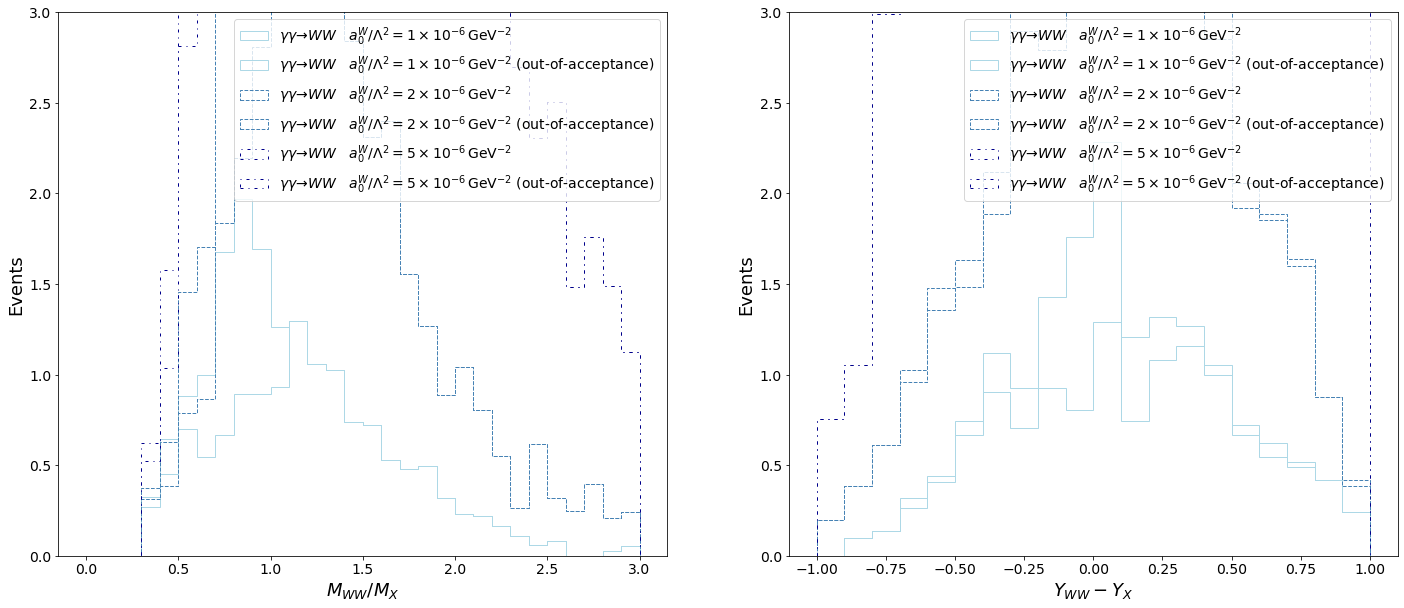

In [31]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,3.) )
axes[1].set_ylim( (0.,3.) )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.png", bbox_inches='tight' )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


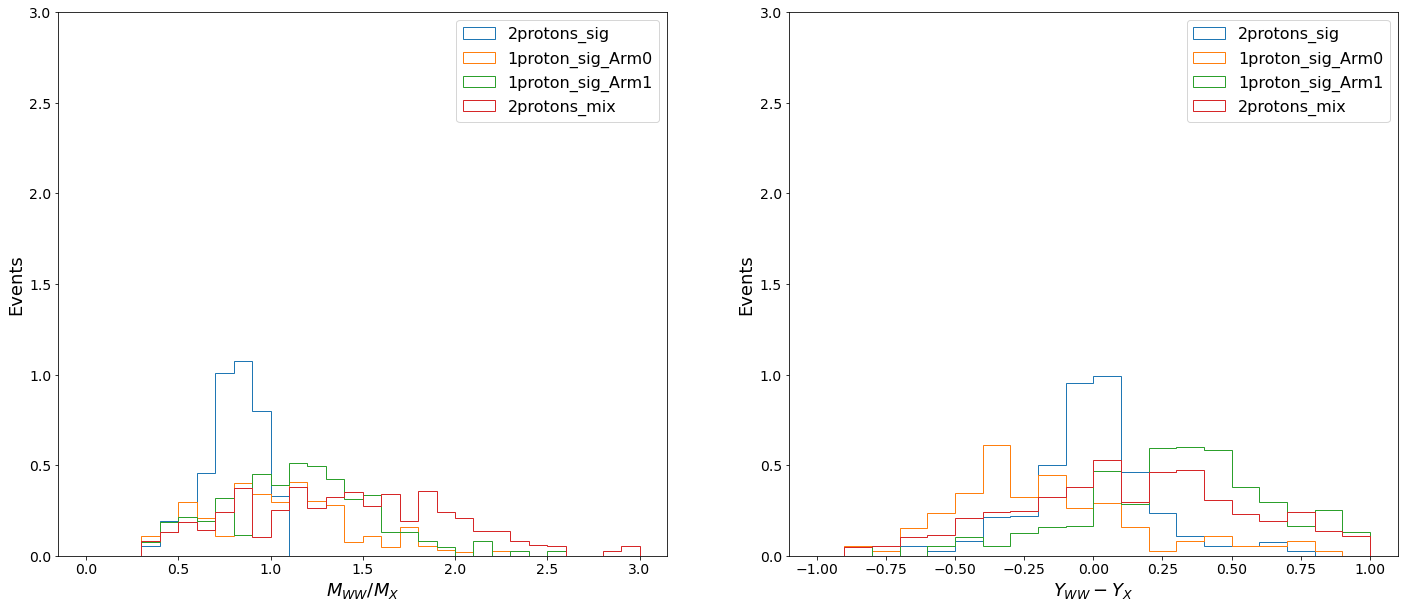

In [32]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W1e-6
Number of events: 17.276462452085813 +/- 0.6835625177485934
Number of events (A): 10.697901058217795 +/- 0.5382280016666428
Number of events (B): 3.568691594826866 +/- 0.3102726116833041
Number of events (C): 2.052025609694479 +/- 0.23608201273932536
Number of events (D): 0.9578441893466728 +/- 0.15988909779249838
0 0
GGToWW-AQGC-2018-muon-A0W2e-6
Number of events: 51.101460959403134 +/- 1.3306840462940346
Number of events (A): 36.87156256782056 +/- 1.1304859754977614
Number of events (B): 6.226712261565909 +/- 0.4653130101546925
Number of events (C): 6.616722494659916 +/- 0.4774020032006716
Number of events (D): 1.3864636353567488 +/- 0.21975581945674186
0 1


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-muon-A0W5e-6
Number of events: 285.28072606356636 +/- 5.0120635843733465
Number of events (A): 216.62022999808056 +/- 4.365750782040367
Number of events (B): 26.650924117248312 +/- 1.529653224955749
Number of events (C): 38.103966429011884 +/- 1.8388943269039
Number of events (D): 3.9056055192256363 +/- 0.5827779583842015
1 0


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


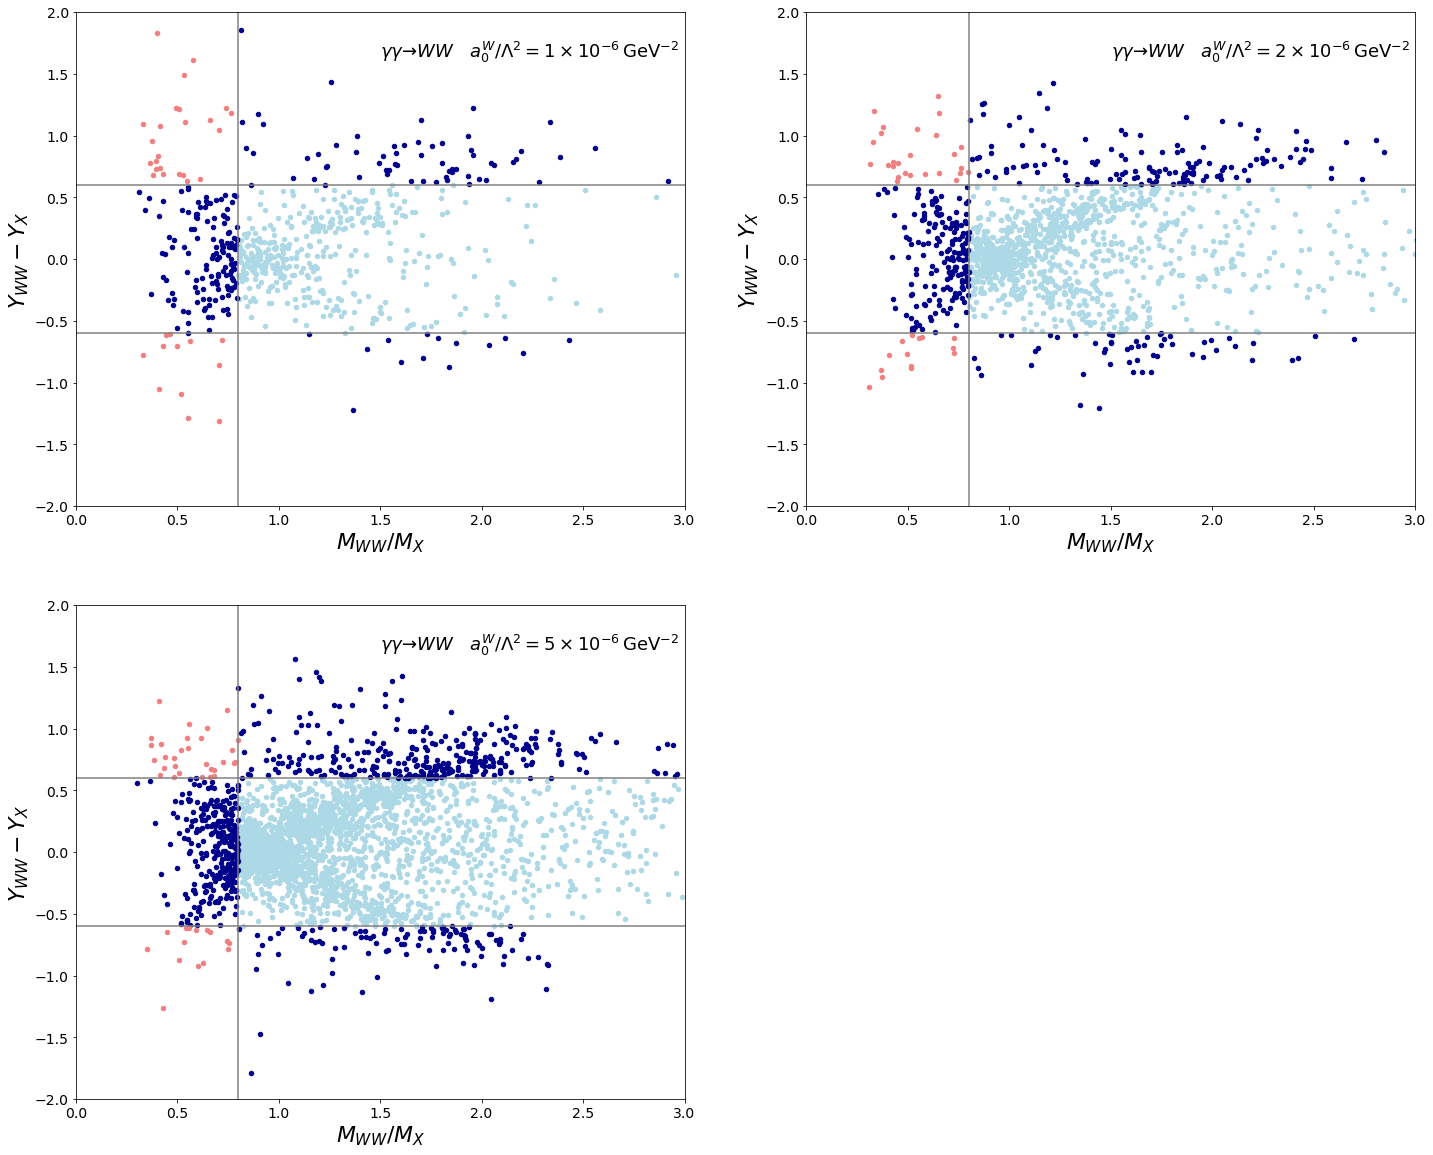

In [33]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.png", bbox_inches='tight' )

### Calculate uncertainties from variations

In [34]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [35]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [36]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

#### JES

In [37]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

In [38]:
if plot_separate_syst_uncertainties:

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [39]:
max_variations = {}
min_variations = {}
if plot_separate_syst_uncertainties:
    max_variations[ "jes" ] = max_
    min_variations[ "jes" ] = min_
    print ( max_variations )
    print ( min_variations )

In [40]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
10.697901058217795 ± 0.5382280016666428
10.779627080406481
10.643075988464728
GGToWW-AQGC-2018-muon-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
36.87156256782056 ± 1.1304859754977614
37.158849389140336
36.52190300027081
GGToWW-AQGC-2018-muon-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
216.62022999808056 ± 4.365750782040367
218.03437048238527
215.17902014869986
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.779627080406481, 'GGToWW-AQGC-2018-muon-A0W2e-6': 37.158849389140336, 'GGToWW-AQGC-2018-muon-A0W5e-6': 218.03437048238527}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.643075988464728, 'GGToWW-AQGC-2018-muon-A0W

In [41]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 216.62022999808056, 'stat': 4.365750782040367, 'syst_up_jes': 1.4141404843047098, 'syst_dw_jes': -1.441209849380698}}


#### JER

In [42]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

In [43]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.10,0.10)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [44]:
if plot_separate_syst_uncertainties:
    max_variations[ "jer" ] = max_
    min_variations[ "jer" ] = min_
    print ( max_variations )
    print ( min_variations )

In [45]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
10.697901058217795 ± 0.5382280016666428
10.75274662285453
10.697901058217795
GGToWW-AQGC-2018-muon-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
36.87156256782056 ± 1.1304859754977614
36.97485187137005
36.803952531800356
GGToWW-AQGC-2018-muon-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
216.62022999808056 ± 4.365750782040367
216.8874525326574
216.3656060135255
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.75274662285453, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.97485187137005, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.8874525326574}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6':

In [46]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 216.62022999808056, 'stat': 4.365750782040367, 'syst_up_jes': 1.4141404843047098, 'syst_dw_jes': -1.441209849380698, 'syst_up_jer': 0.2672225345768311, 'syst_dw_jer': -0.2546239845550531}}


#### Lepton Id

In [47]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

In [48]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [49]:
if plot_separate_syst_uncertainties:
    if lepton_type == 'muon':
        max_variations[ "sf_muon_id" ] = max_
        min_variations[ "sf_muon_id" ] = min_
    elif lepton_type == 'electron':
        max_variations[ "sf_electron_id" ] = max_
        min_variations[ "sf_electron_id" ] = min_
    print ( max_variations )
    print ( min_variations )

In [50]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
10.697901058217795 ± 0.5382280016666428
10.70357941687697
10.69222269955862
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
36.87156256782056 ± 1.1304859754977614
36.890029845893075
36.85309528974804
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
216.62022999808056 ± 4.365750782040367
216.72488283719113
216.51557715897
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.70357941687697, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.890029845893075, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.72488283719113}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.69222269955862, 'GGToWW-A

In [51]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565, 'syst_up_sf_muon_id': 0.018467278072513693, 'syst_dw_sf_muon_id': -0.0184672780725208}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 216.62022999808056, 'stat': 4.365750782040367, 'syst_up_jes': 1.4141404843047098, 'syst_dw_jes': -1.441209849380698, 'syst_up_jer': 0.2672225345768311, 'syst_dw_jer': -0.2546239845550531, 'syst_up_sf_muon_id': 0.104652839110571, 'syst_dw_sf_muon_id': -0.104652839110571}}


#### Trigger

In [52]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

In [53]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
10.697901058217795 ± 0.5382280016666428
10.719622395485327
10.676179720950266
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
36.87156256782056 ± 1.1304859754977614
36.94661375057976
36.796511385061365
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_trigger_up
_nom
_nom
sf_muon_trigger_dw
216.62022999808056 ± 4.365750782040367
217.0622886224363
216.17817137372484
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.719622395485327, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.94661375057976, 'GGToWW-AQGC-2018-muon-A0W5e-6': 217.0622886224363}
{'GGToWW-AQGC-2018-muon-A0W1e

In [54]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_trigger" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_trigger" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565, 'syst_up_sf_muon_id': 0.018467278072513693, 'syst_dw_sf_muon_id': -0.0184672780725208, 'syst_up_sf_muon_trigger': 0.07505118275919642, 'syst_dw_sf_muon_trigger': -0.07505118275919642}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 216.62022999808056, 'stat': 4.365750782040367, 'syst_up_jes': 1.4141404843047098, 'syst_dw_jes': -1.441209849380698, 'sy

#### Prefiring

In [55]:
variations_weights_ = []
variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]

In [56]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
10.697901058217795 ± 0.5382280016666428
10.708416759616654
10.687385356818938
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
36.87156256782056 ± 1.1304859754977614
36.89186914166823
36.851256880883014
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_prefiring_up
_nom
_nom
sf_prefiring_dw
216.62022999808056 ± 4.365750782040367
216.7832774677014
216.45718252845973
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.708416759616654, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.89186914166823, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.7832774677014}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.6873853568

In [57]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_sf_prefiring" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_sf_prefiring" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565, 'syst_up_sf_muon_id': 0.018467278072513693, 'syst_dw_sf_muon_id': -0.0184672780725208, 'syst_up_sf_muon_trigger': 0.07505118275919642, 'syst_dw_sf_muon_trigger': -0.07505118275919642, 'syst_up_sf_prefiring': 0.02030657384766954, 'syst_dw_sf_prefiring': -0.0

#### Proton momentum scale

In [58]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    # vars_ = {}
    # vars_[ "R_MWW_MX" ] = {}
    # vars_[ "R_MWW_MX" ][ "bins" ]  = 30
    # vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
    # vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
    # # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
    # # vars_[ "R_MWW_MX" ][ "range" ] = None
    # # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
    # vars_[ "Diff_YWW_YX" ] = {}
    # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
    # vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
    # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
    # # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
    # # vars_[ "Diff_YWW_YX" ][ "range" ] = None
    # # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

    # ylim_ = (0.,0.2)
    # ylim_ = (0.,0.5)
    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    # ylim_ = (0.,3.)
    # ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)

    color_ = "darkblue"

    relative_uncertainty_ = True

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_ = {}
    min_var_xi_ = {}
    max_var_xi_["arm0"] = max_
    min_var_xi_["arm0"] = min_

In [59]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm0" ] = max_
    min_variations[ "proton_scale_arm0" ] = min_
    print ( max_variations )
    print ( min_variations )

In [60]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"
    
if plot_separate_syst_uncertainties:
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    max_var_xi_["arm1"] = max_
    min_var_xi_["arm1"] = min_

In [61]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_scale_arm1" ] = max_
    min_variations[ "proton_scale_arm1" ] = min_
    print ( max_variations )
    print ( min_variations )

In [62]:
if plot_separate_syst_uncertainties:
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                          weights=weights__,
                                                          histtype='step', color=color_, linestyle="-", label="_nom",
                                                          bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        __max__ = ( counts_ +
                    np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                             ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
        __min__ = ( counts_ -
                    np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                             ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

In [63]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
10.697901058217795 ± 0.5382280016666428
11.07330382549262
10.18880433126636
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
36.87156256782056 ± 1.1304859754977614
37.66303287321673
36.089731806802476
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
216.62022999808056 ± 4.365750782040367
220.34306324760266
211.63188325380256
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 11.07330382549262, 'GGToWW-AQGC-2018-muon-A0W2e-6': 37.663

In [64]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565, 'syst_up_sf_muon_id': 0.018467278072513693, 'syst_dw_sf_muon_id': -0.0184672780725208, 'syst_up_sf_muon_trigger': 0.07505118275919642, 'syst_dw_sf_muon_trigg

In [65]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
10.697901058217795 ± 0.5382280016666428
11.123216702171561
10.38182290233031
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
36.87156256782056 ± 1.1304859754977614
38.01767489375832
35.90393214404697
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
216.62022999808056 ± 4.365750782040367
222.0484672267754
211.47712614991286
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 11.123216702171561, 'GGToWW-AQGC-2018-muon-A0W2e-6': 38.017

In [66]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355, 'syst_up_proton_scale_arm1': 0.4253156439537662, 'syst_dw_proton_scale_arm1': -0.3160781558874852}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_dw_jer': -0.06761003602020565, 'syst_up_sf_muon_id': 0.018467278072513693, 'syst_dw_sf_mu

In [67]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355, 'syst_up_proton_scale_arm1': 0.4253156439537662, 'syst_dw_proton_scale_arm1': -0.3160781558874852, 'syst_up_proton_scale': 0.5672923714183038, 'syst_dw_proton_scale': -0.5992369131002344}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213197748, 'syst_dw_jes': -0.34965956754975025, 'syst_up_jer': 0.10328930354948795, 'syst_

#### Proton efficiency

In [68]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

In [69]:
if plot_separate_syst_uncertainties:
    
    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.05,0.05)

    color_ = "darkblue"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_ref_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    print ( max_, min_ )

In [70]:
if plot_separate_syst_uncertainties:
    max_variations[ "proton_eff" ] = max_
    min_variations[ "proton_eff" ] = min_
    print ( max_variations )
    print ( min_variations )

In [71]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
10.697901058217795 ± 0.5382280016666428
10.859946363087309
10.535855753348283
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
36.87156256782056 ± 1.1304859754977614
37.39853099509758
36.344594140543535
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
216.62022999808056 ± 4.365750782040367
219.51734697578968
213.72311302037144
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.697901058217795, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.87156256782056, 'GGToWW-AQGC-2018-muon-A0W5e-6': 216.62022999808056}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.2896893817780676, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.2779985407971253, 'GGToWW-AQGC-2018-muon-A0W5e-6': 19.059779890886073}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.859946363087309, 'GGToWW-AQGC-2018-muon-A0W2e-6': 37.39853099509758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 219.51734697578968}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 10.535855753348283, 'GG

In [72]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355, 'syst_up_proton_scale_arm1': 0.4253156439537662, 'syst_dw_proton_scale_arm1': -0.3160781558874852, 'syst_up_proton_scale': 0.5672923714183038, 'syst_dw_proton_scale': -0.5992369131002344, 'syst_up_proton_eff': 0.16204530486951363, 'syst_dw_proton_eff': -0.16204530486951185}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 36.87156256782056, 'stat': 1.1304859754977614, 'syst_up_jes': 0.2872868213

In [73]:
if plot_separate_syst_uncertainties:
    color_ = "darkblue"

    relative_uncertainty_ = True

    # ylim_ = (0.,1.)
    ylim_ = (0.,60.)
    ylim_ratio_ = (-0.50,0.50)

    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    label_ = label_ref_
    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
        weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )

        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    #     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
    #                                       color=color_, fmt='o', label="_nom" )

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    #     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
    #     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1

### Total uncertainties

In [74]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    # JES
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    # JER
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    # Lepton Id
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    # Trigger
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_trigger_up", "sf_muon_trigger_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_trigger_up", "sf_electron_trigger_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_trigger_ = ""
    if lepton_type == 'muon': variation_name_trigger_ =  "sf_muon_trigger"
    elif lepton_type == 'electron': variation_name_trigger_ =  "sf_electron_trigger"

    __max_variations[ variation_name_trigger_ ] = max_
    __min_variations[ variation_name_trigger_ ] = min_
    
    # Prefiring
    variations_weights_ = [ "nom", "sf_prefiring_up", "sf_prefiring_dw" ]
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "sf_prefiring" ] = max_
    __min_variations[ "sf_prefiring" ] = min_

    # Proton momentum scale
    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    # Proton efficiency
    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    # Total uncertainties
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_trigger_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "sf_prefiring" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_trigger_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "sf_prefiring" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [75]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.46959906 3.50241878 2.44935266 1.86941729 1.15494913 0.69232704
 0.35386922]
[2.4677657  3.44738452 2.44863253 1.81699817 1.15494913 0.69232704
 0.35386922]
0      0.000000
1      0.000547
2      0.001053
3      0.001524
4      0.001963
         ...   
195    0.000850
196    0.000675
197    0.000476
198    0.000252
199    0.000000
Length: 200, dtype: float64 0.005919349253577486
0     -0.000742
1     -0.001680
2     -0.002531
3     -0.003305
4     -0.004009
         ...   
195   -0.001169
196   -0.000928
197   -0.000655
198   -0.000346
199    0.000000
Length: 200, dtype: float64 -0.0024804437648979845
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.16978879 6.79237248 4.38859846]
[3.14474489 6.68084844 4.3861574 ]
0     -0.017088
1     -0.015870
2     -0.014709
3     -0.013600
4     -0.012540
         ...   
195    0.007874
196    0.007516
197    0.007146
198    0.006762
199    0.006364
Length: 200

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[2.51869169 3.55086894 2.46063094 1.87172517 1.16819307 0.69674929
 0.35448599]
[2.42050644 3.397203   2.38431347 1.8141839  1.14170519 0.68790479
 0.35325244]
0      0.019879
1      0.020168
2      0.020430
3      0.020669
4      0.020886
         ...   
195    0.002203
196    0.002082
197    0.001965
198    0.001852
199    0.001743
Length: 200, dtype: float64 0.013859712291795888
0     -0.019879
1     -0.020168
2     -0.020430
3     -0.020669
4     -0.020886
         ...   
195   -0.002203
196   -0.002082
197   -0.001965
198   -0.001852
199   -0.001743
Length: 200, dtype: float64 -0.013859712291797208
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[3.27165786 6.80070505 4.41508562]
[3.1781355  6.56099184 4.30660945]
0      0.014500
1      0.014653
2      0.014799
3      0.014938
4      0.015071
         ...   
195    0.013044
196    0.012900
197    0.012751
198    0.012597
199    0.012

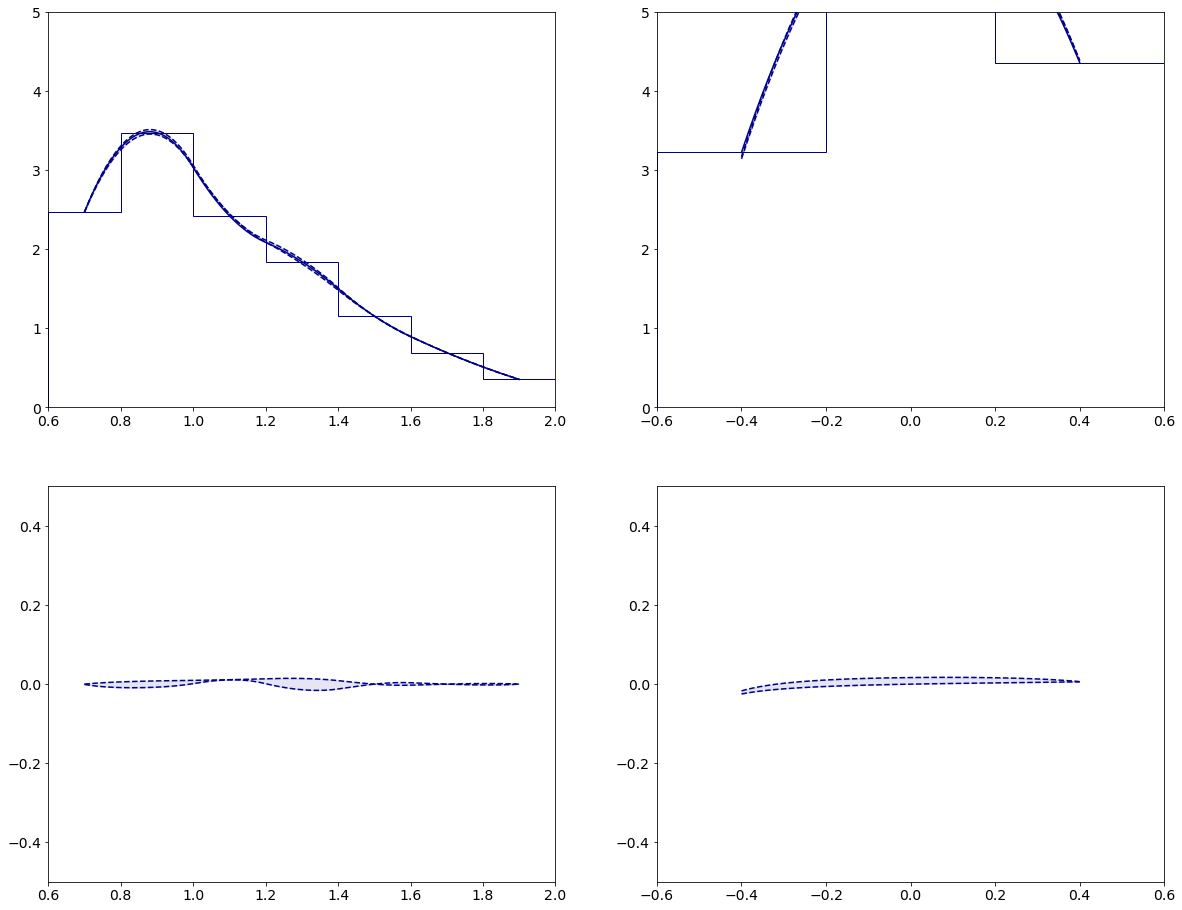

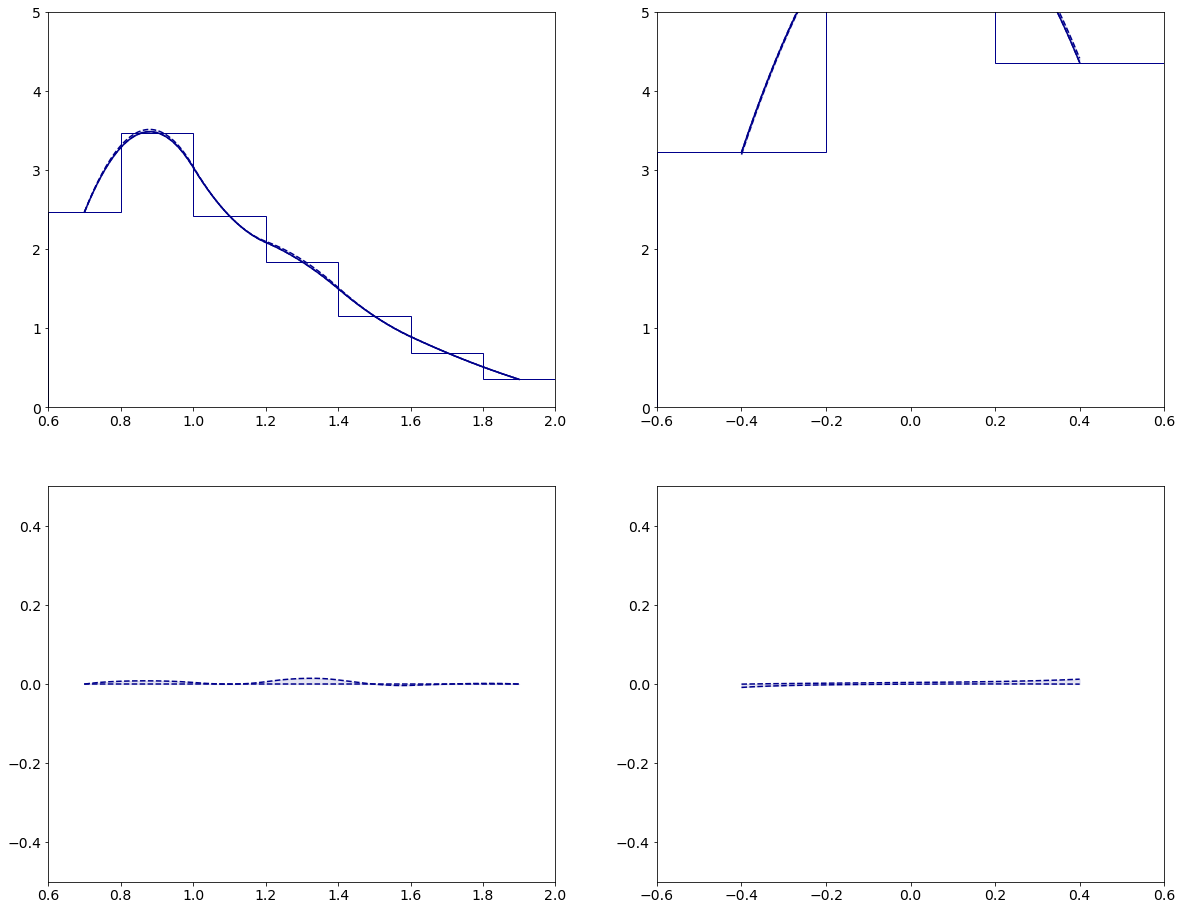

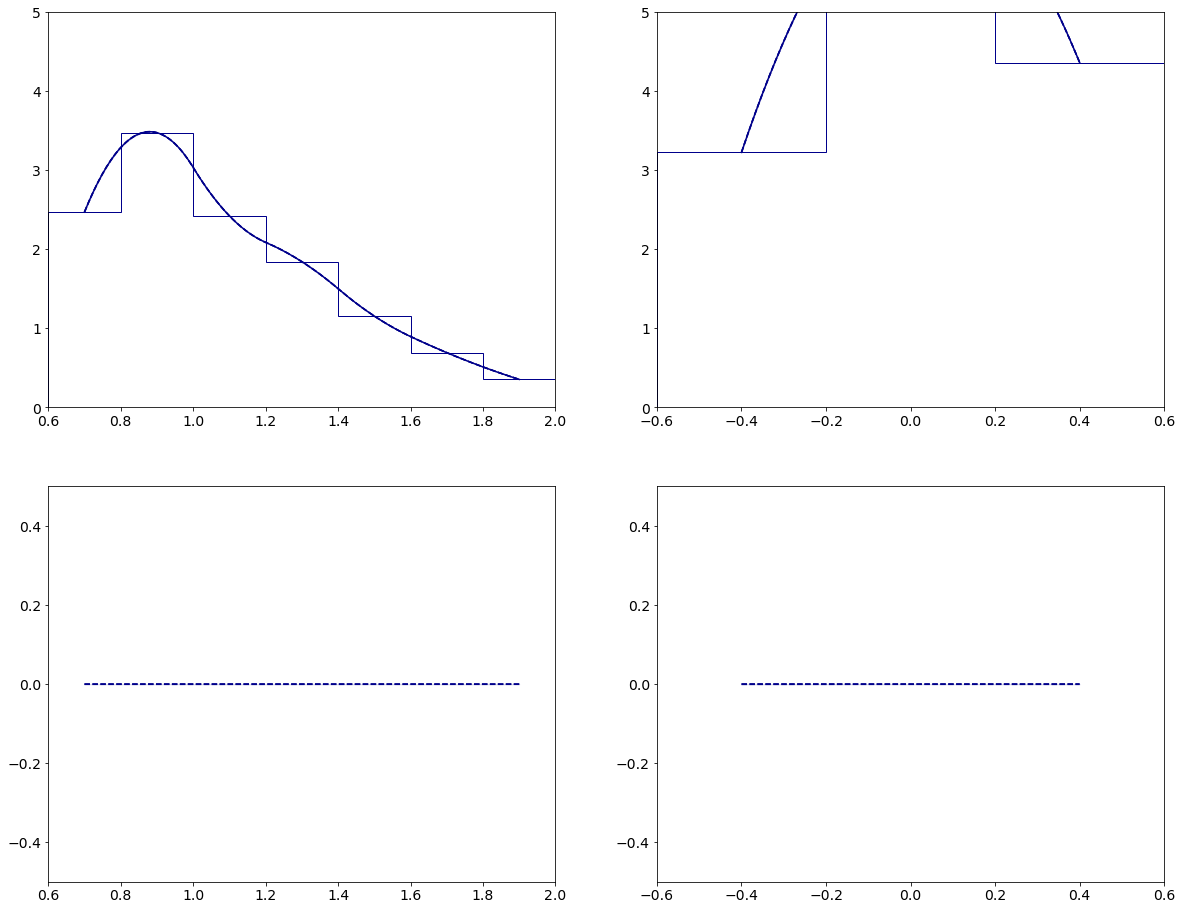

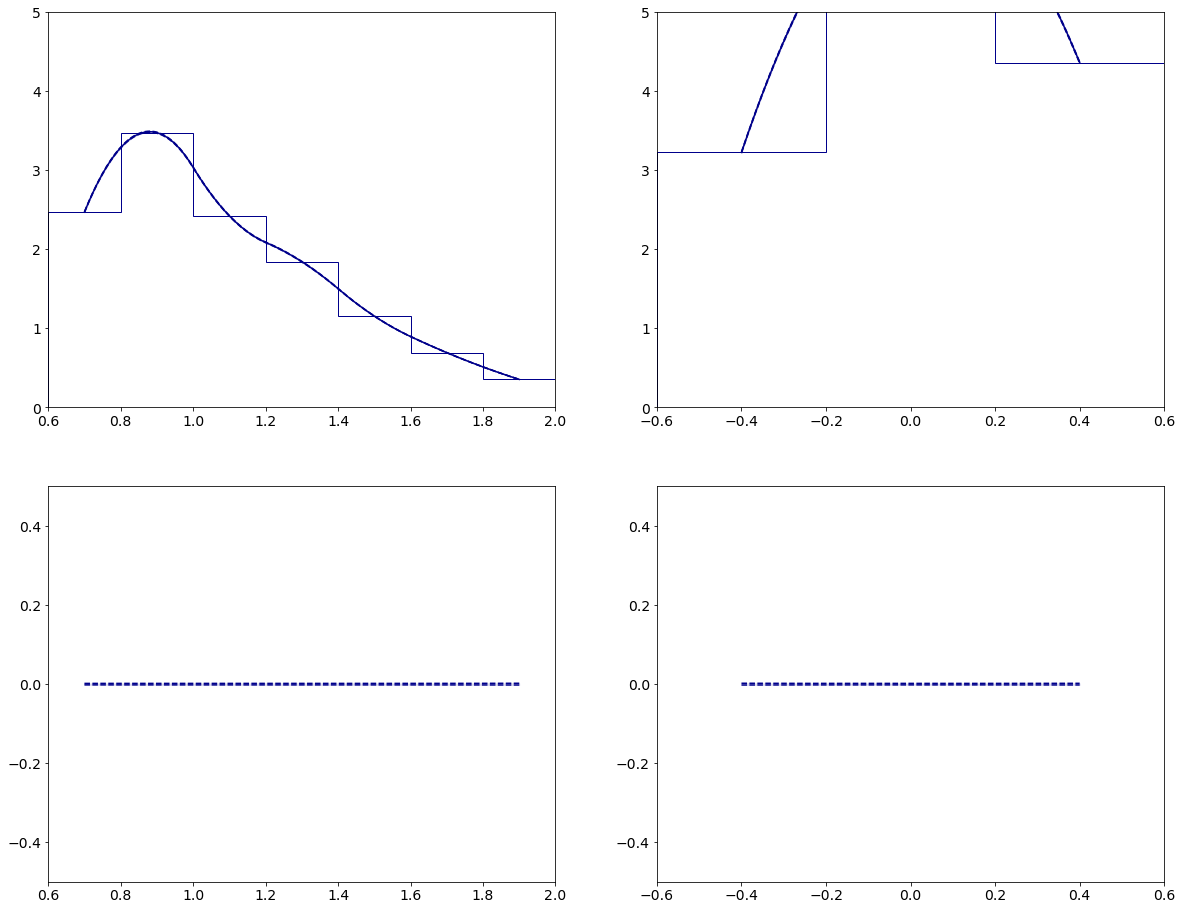

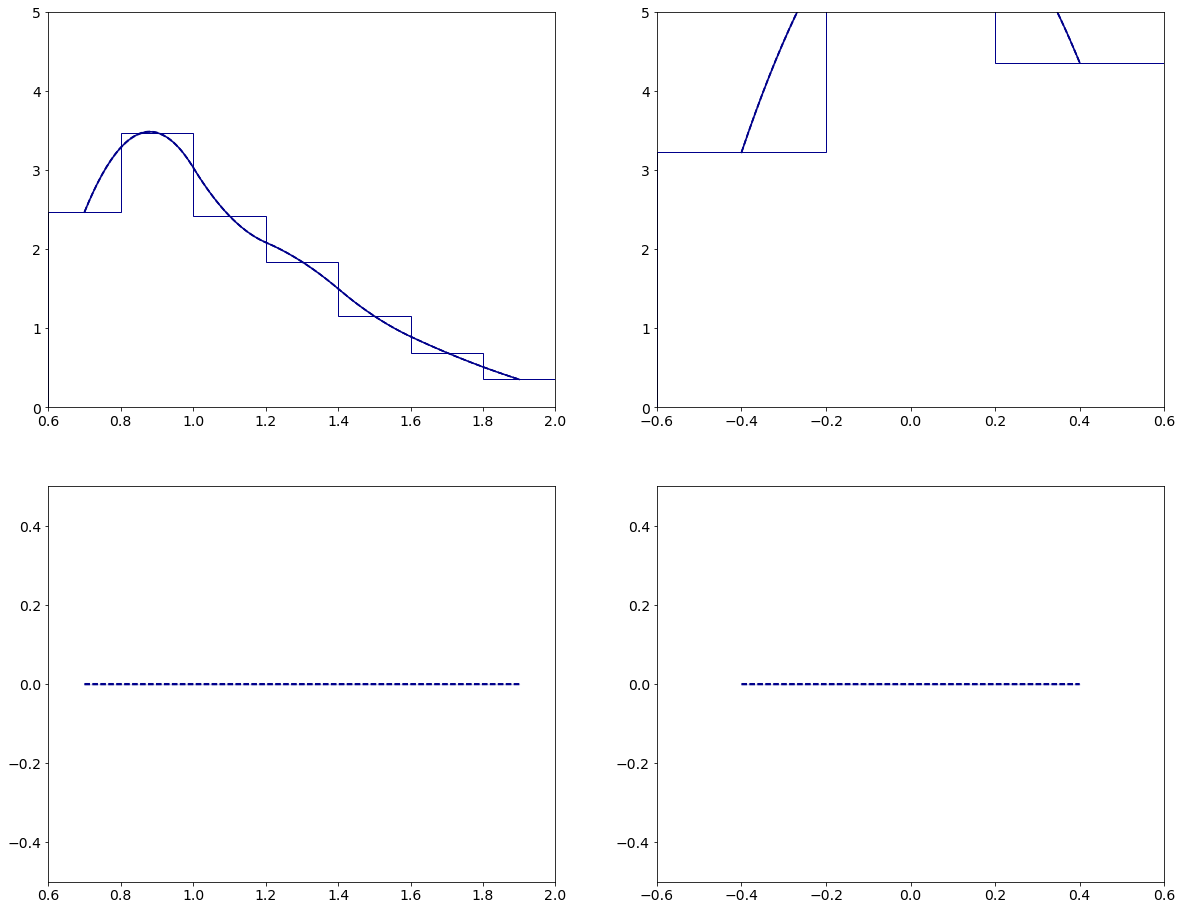

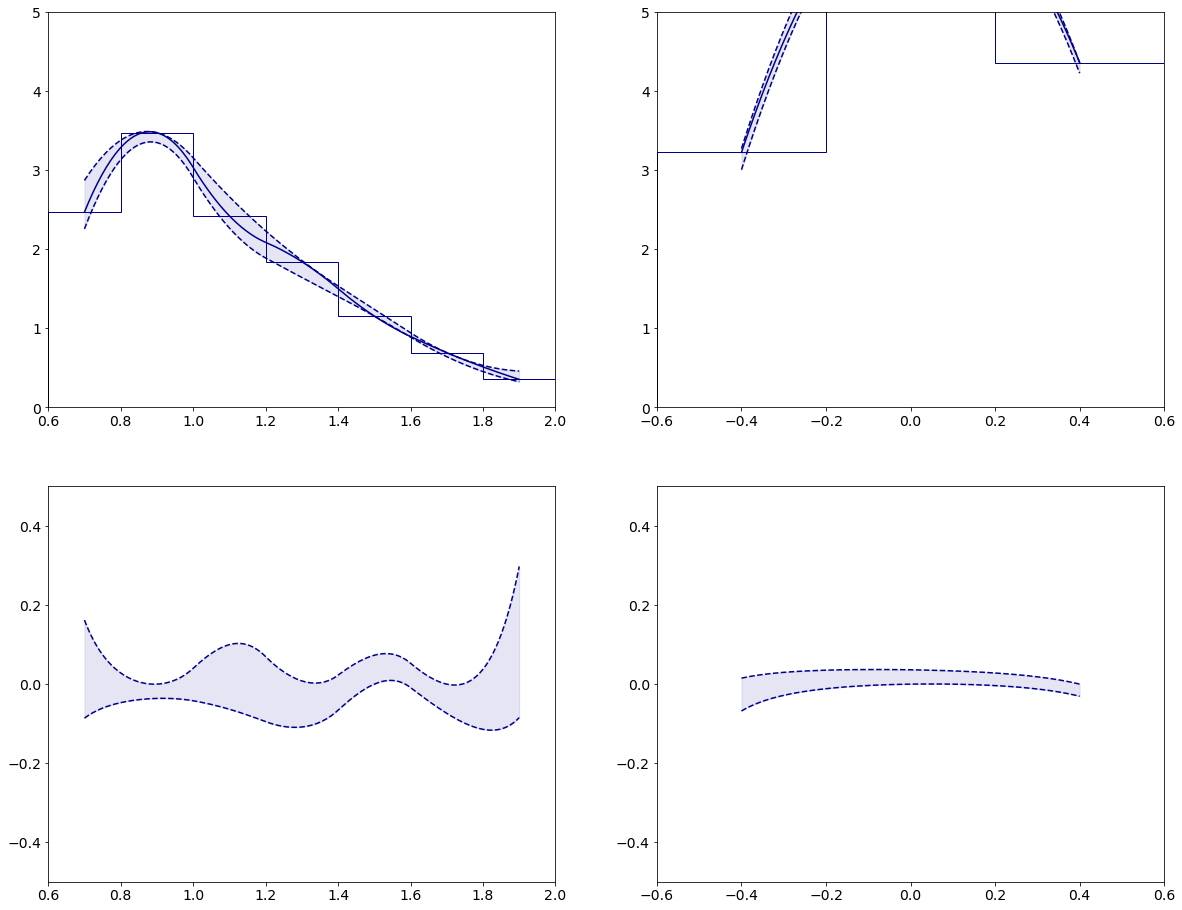

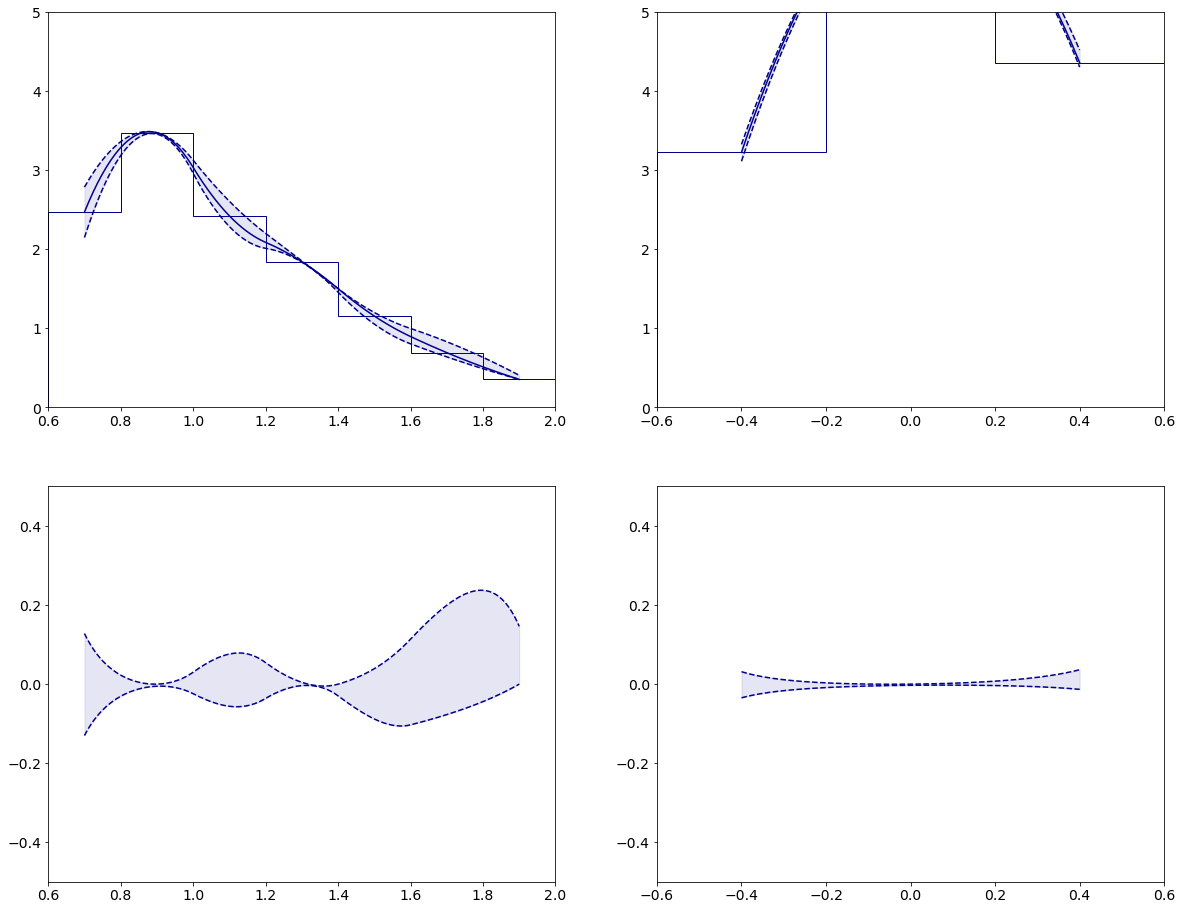

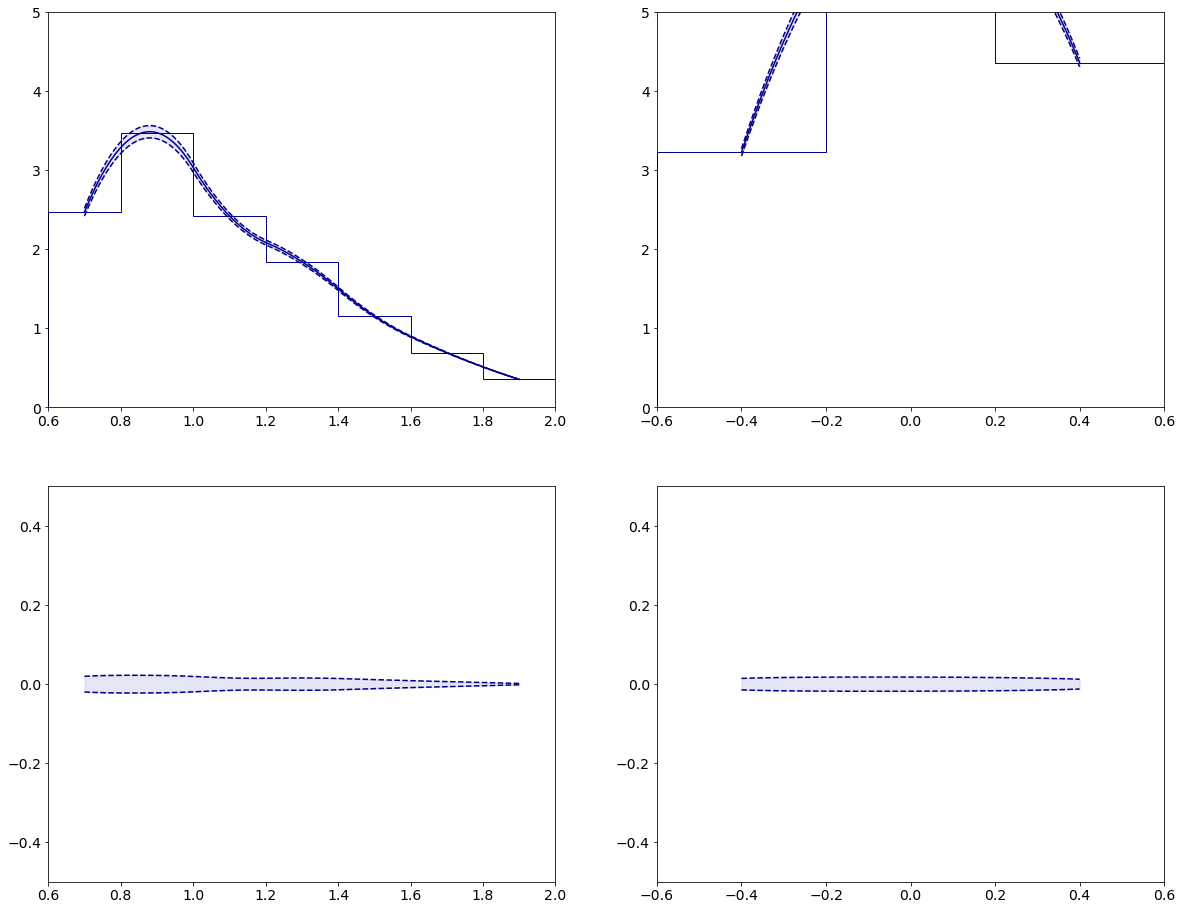

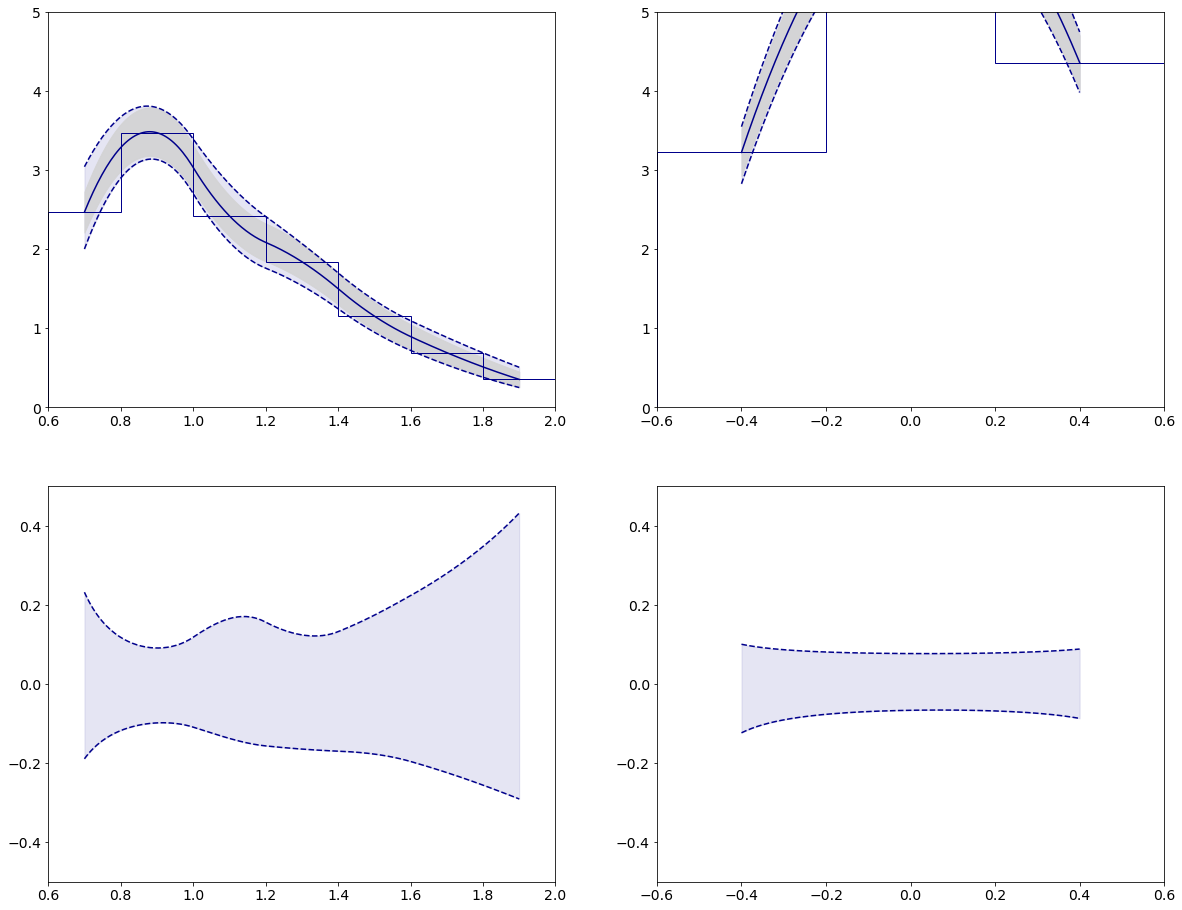

In [76]:
if data_sample == '2018':
    # ylim_ = (0.,0.3)
    ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)
    color_ = "darkblue"

    counts = {}
    err = {}
    bins = {}
    max_variations_total = {}
    min_variations_total = {}

    label_ = ""
    coupling_str_ = "A0W1e-6"
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

    counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        lepton_type=lepton_type,
        label=label_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_
        )

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.46959906 3.50241878 2.44935266 1.86941729 1.15494913 0.69232704
 0.35386922]
[2.4677657  3.44738452 2.44863253 1.81699817 1.15494913 0.69232704
 0.35386922]
0      0.000000
1      0.000547
2      0.001053
3      0.001524
4      0.001963
         ...   
195    0.000850
196    0.000675
197    0.000476
198    0.000252
199    0.000000
Length: 200, dtype: float64 0.005919349253577486
0     -0.000742
1     -0.001680
2     -0.002531
3     -0.003305
4     -0.004009
         ...   
195   -0.001169
196   -0.000928
197   -0.000655
198   -0.000346
199    0.000000
Length: 200, dtype: float64 -0.0024804437648979845
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[3.16978879 6.79237248 4.38859846]
[3.14474489 6.68084844 4.3861574 ]
0     -0.017088
1     -0.015870
2     -0.014709
3     -0.013600
4     -0.012540
         ...   
195    0.007874
196    0.007516
197    0.007146
198    0.006762
199    0.006364
Length: 200

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
[2.46959906 3.47403597 2.42247221 1.84295454 1.15494913 0.69232704
 0.35386922]
[2.72791092 3.77933629 2.68015461 2.06691868 1.33162612 0.82834184
 0.4521856 ]
[2.2112872  3.16873565 2.1647898  1.61899039 0.97827215 0.55631224
 0.25555284]
[3.04355108 3.79149827 2.82401954 2.07253471 1.35637778 0.88627214
 0.50697858]
[2.00320374 3.1334786  2.08983506 1.54020941 0.95058566 0.53745941
 0.25108958]
0      0.232407
1      0.220599
2      0.209740
3      0.199735
4      0.190499
         ...   
195    0.410371
196    0.415819
197    0.421351
198    0.426967
199    0.432672
Length: 200, dtype: float64 0.18768234396056055
0     -0.188855
1     -0.181567
2     -0.174856
3     -0.168663
4     -0.162936
         ...   
195   -0.281819
196   -0.283970
197   -0.286125
198   -0.288284
199   -0.290445
Length: 200, dtype: float64 -0.1695189673155059
Diff_YWW_YX
[3.22489668 6.68084844 4.36084753]
[3.52127899 7.10539943 4.70417311]
[2.92851436 6.25629745 4.017521

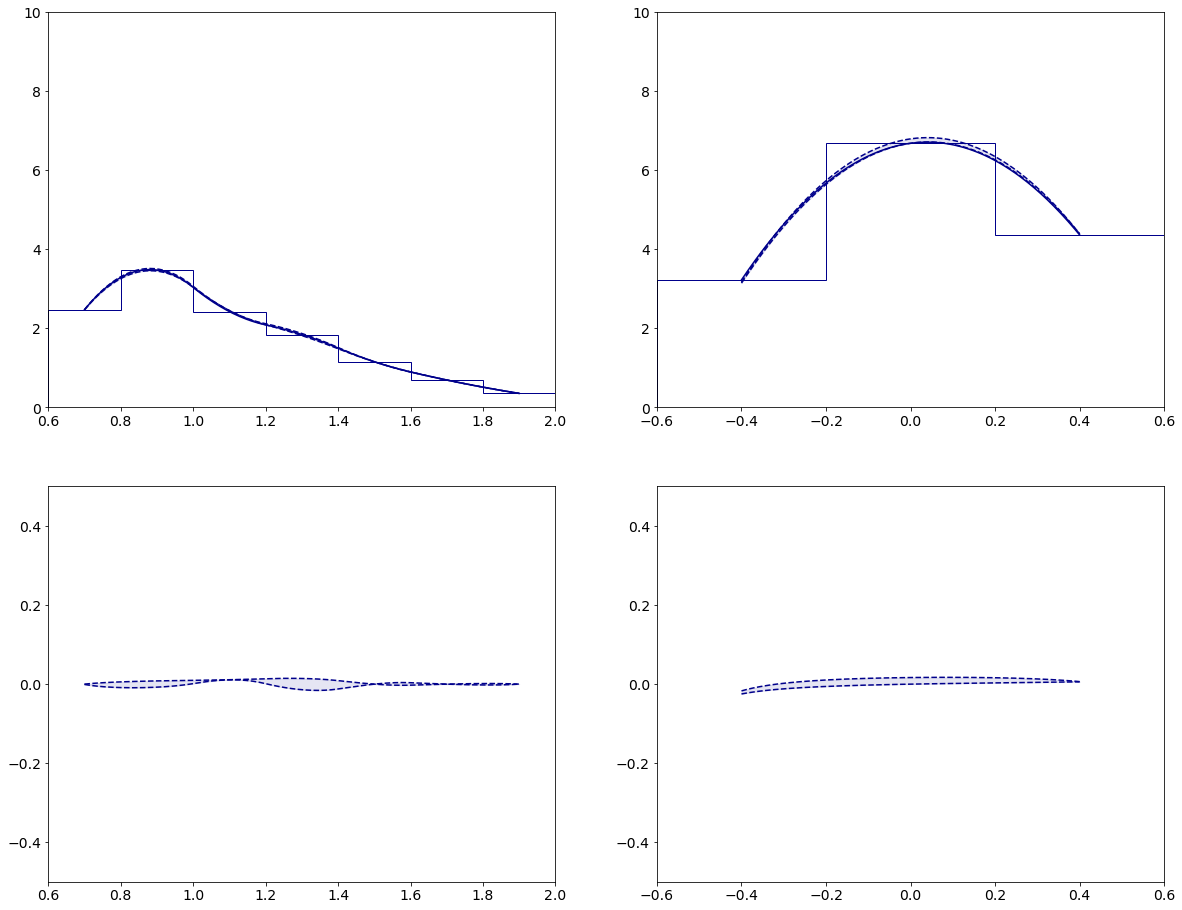

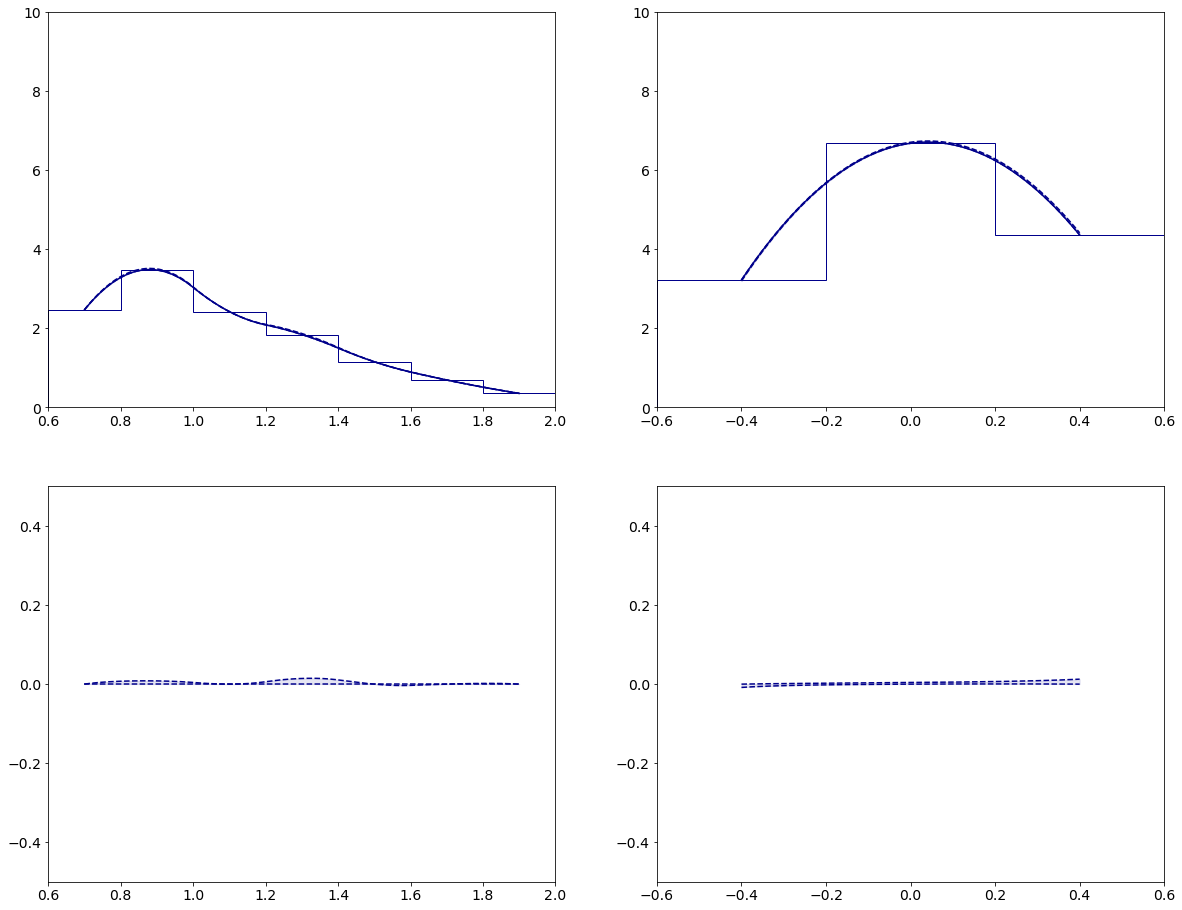

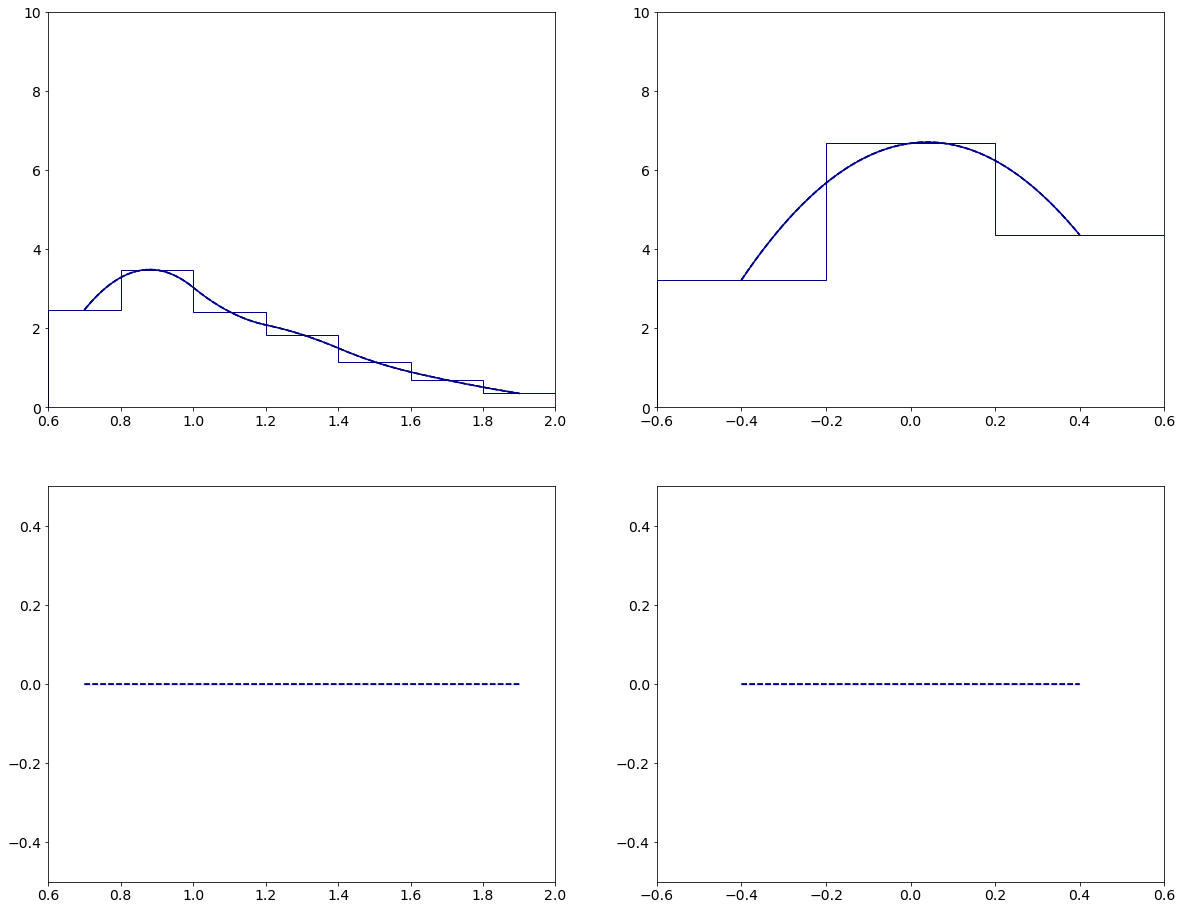

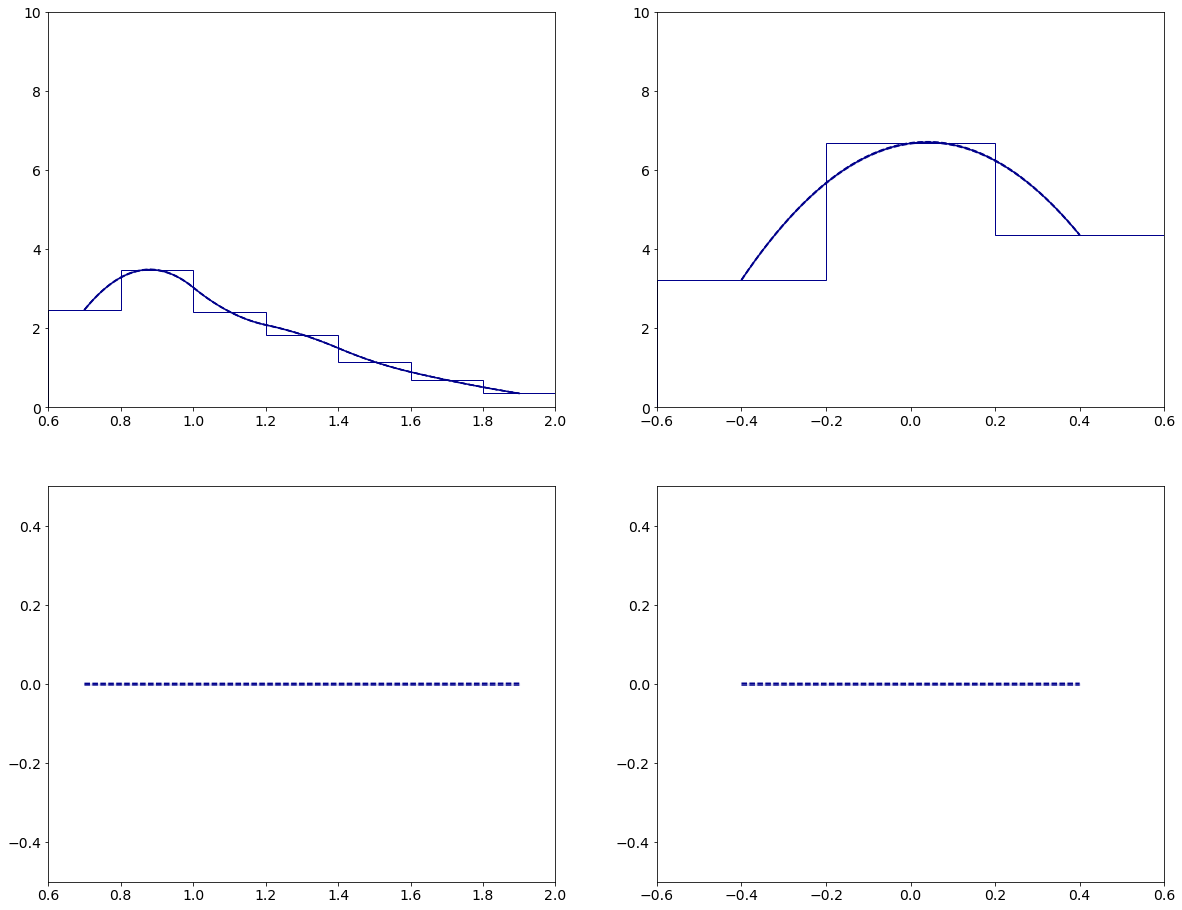

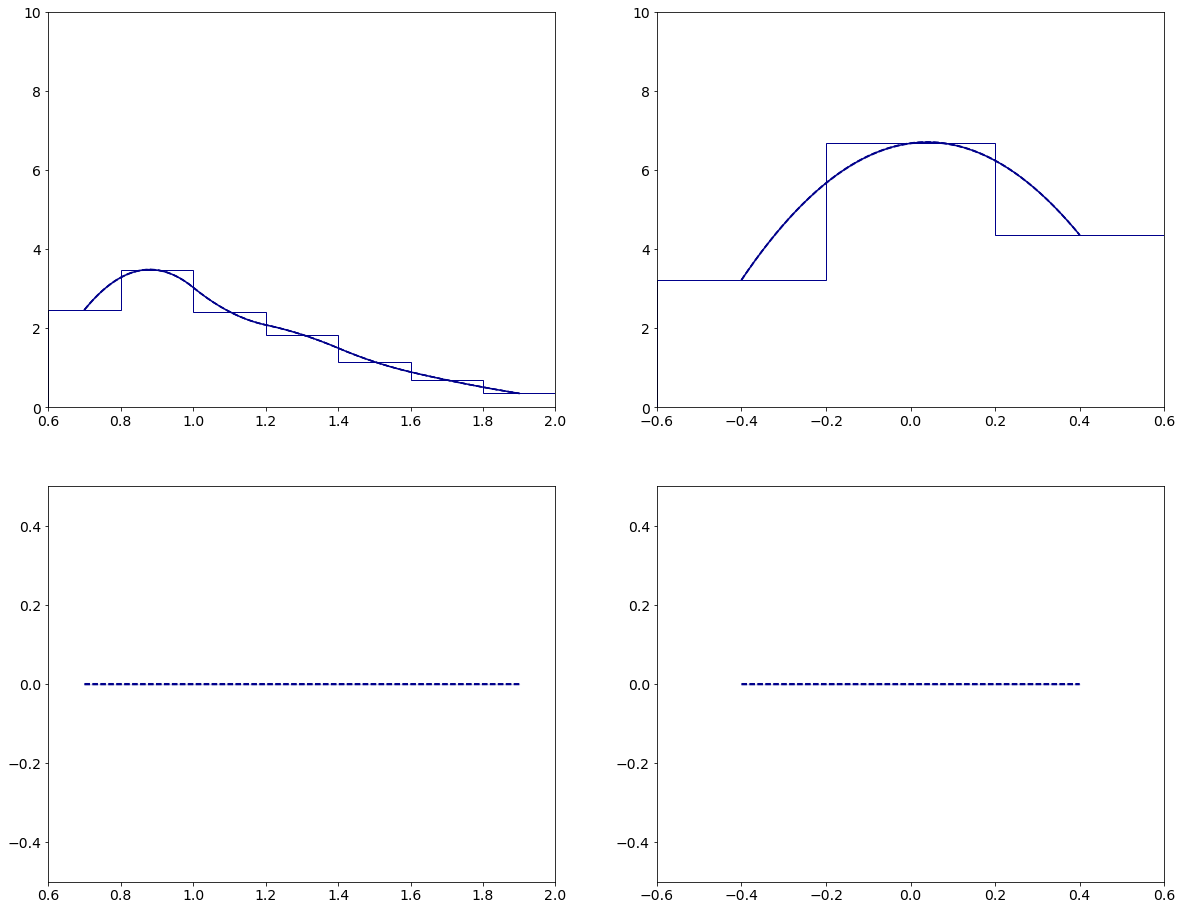

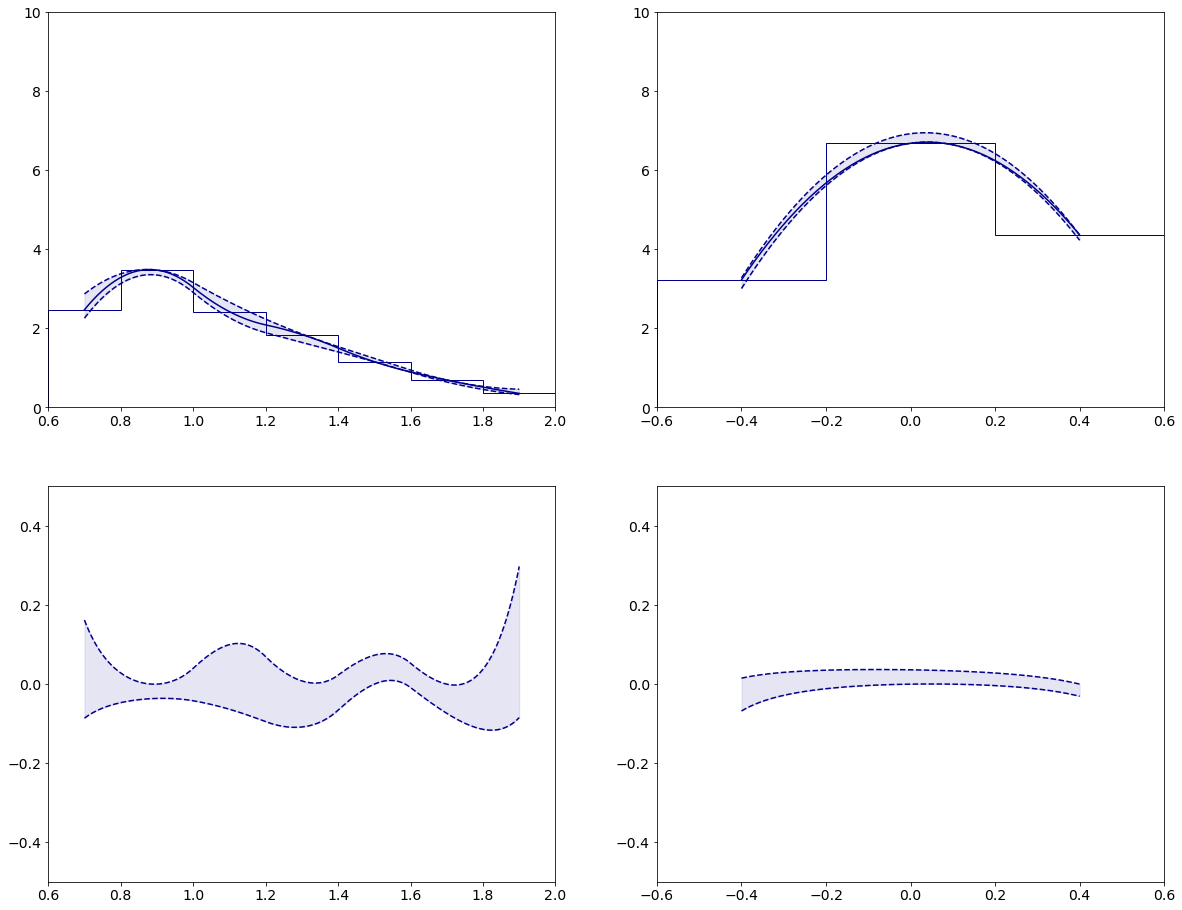

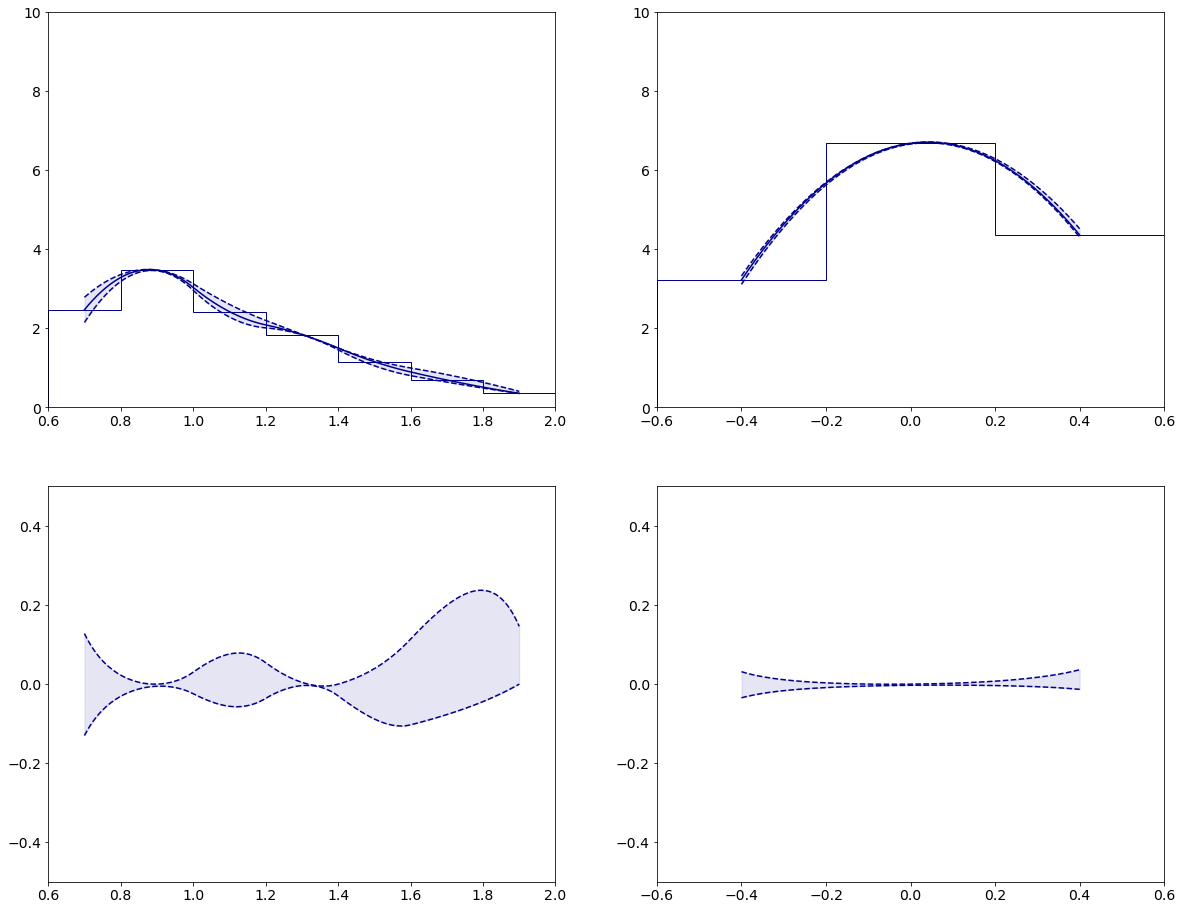

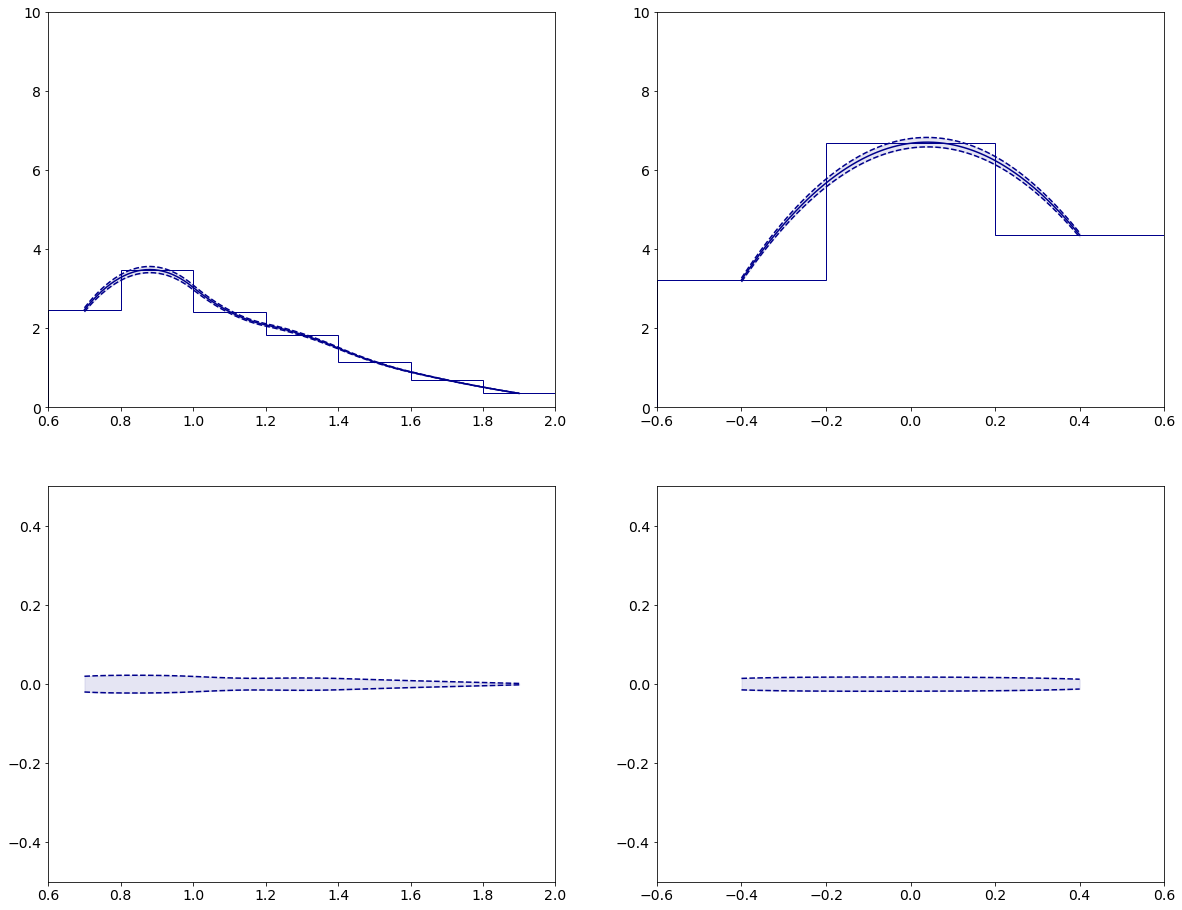

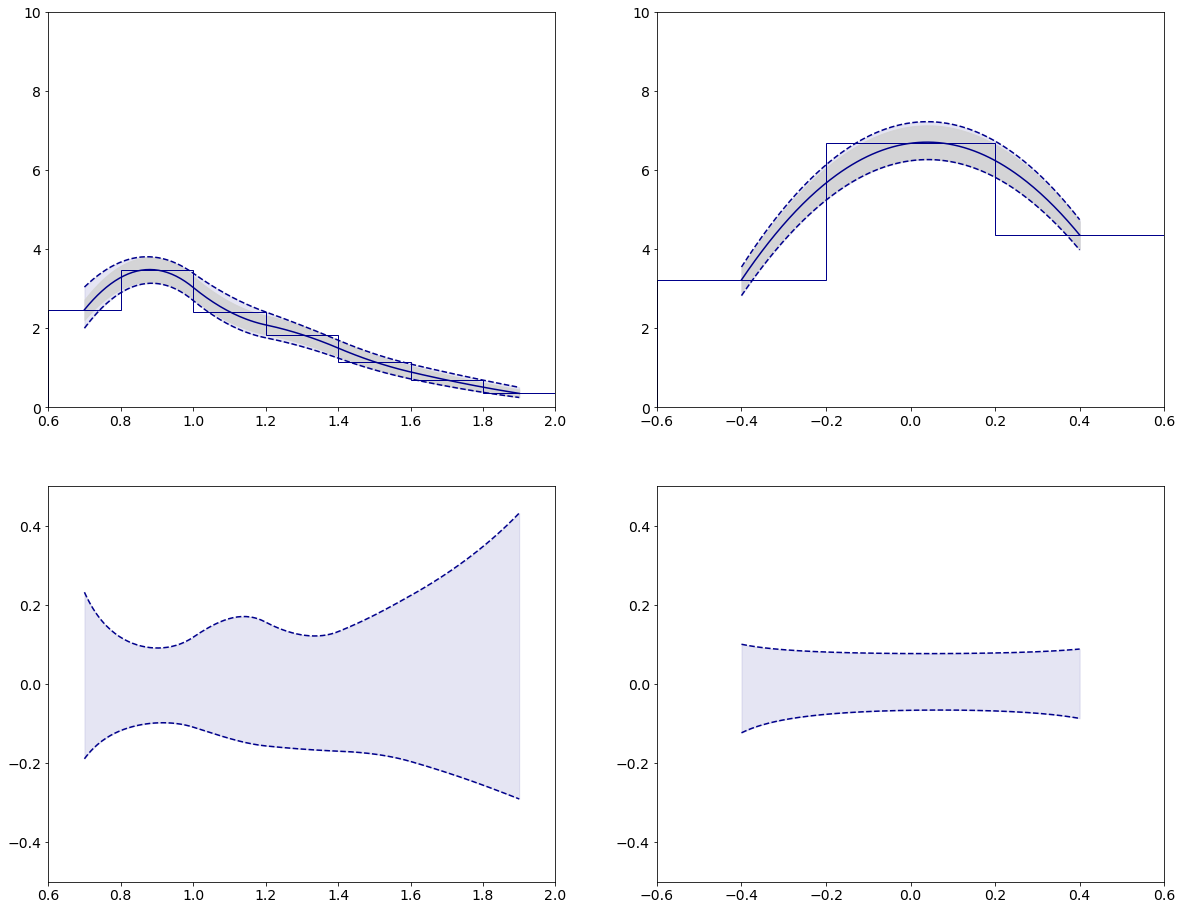

In [77]:
# ylim_ = (0.,0.3)
ylim_ = (0.,10.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 4.77332409 10.4811071   7.55927737  6.76511204  4.25719871  2.87153014
  1.0871666 ]
[ 4.70315088 10.44415398  7.4922338   6.58666785  4.14148405  2.79688783
  1.05735529]
0      0.014920
1      0.013660
2      0.012583
3      0.011652
4      0.010842
         ...   
195    0.028252
196    0.028251
197    0.028243
198    0.028224
199    0.028194
Length: 200, dtype: float64 0.011968853131820105
0     -1.888475e-16
1      6.295739e-05
2      1.158376e-04
3      1.606151e-04
4      1.987692e-04
           ...     
195    6.764006e-04
196    5.505025e-04
197    3.990097e-04
198    2.174067e-04
199    0.000000e+00
Length: 200, dtype: float64 -0.006644061991924669
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 8.77901022 21.41420807 13.26251657]
[ 8.45550738 21.14593337 13.10796826]
0      0.020890
1      0.020213
2      0.019576
3      0.018976
4      0.018409
         ...   
195    0.005709
196    0.005

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[ 4.79314747 10.68260817  7.64786105  6.85985792  4.22574659  2.82122483
  1.05883138]
[ 4.61315429 10.19937188  7.40462967  6.67228498  4.13747654  2.77255082
  1.0558792 ]
0      0.019135
1      0.019776
2      0.020317
3      0.020778
4      0.021175
         ...   
195    0.003692
196    0.003213
197    0.002679
198    0.002077
199    0.001396
Length: 200, dtype: float64 0.01426848746198003
0     -0.019135
1     -0.019776
2     -0.020317
3     -0.020778
4     -0.021175
         ...   
195   -0.003692
196   -0.003213
197   -0.002679
198   -0.002077
199   -0.001396
Length: 200, dtype: float64 -0.01426848746198179
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[ 8.70830138 21.67180189 13.35164524]
[ 8.49043904 20.96083028 13.01353182]
0      0.012667
1      0.012860
2      0.013040
3      0.013211
4      0.013371
         ...   
195    0.013291
196    0.013181
197    0.013066
198    0.0

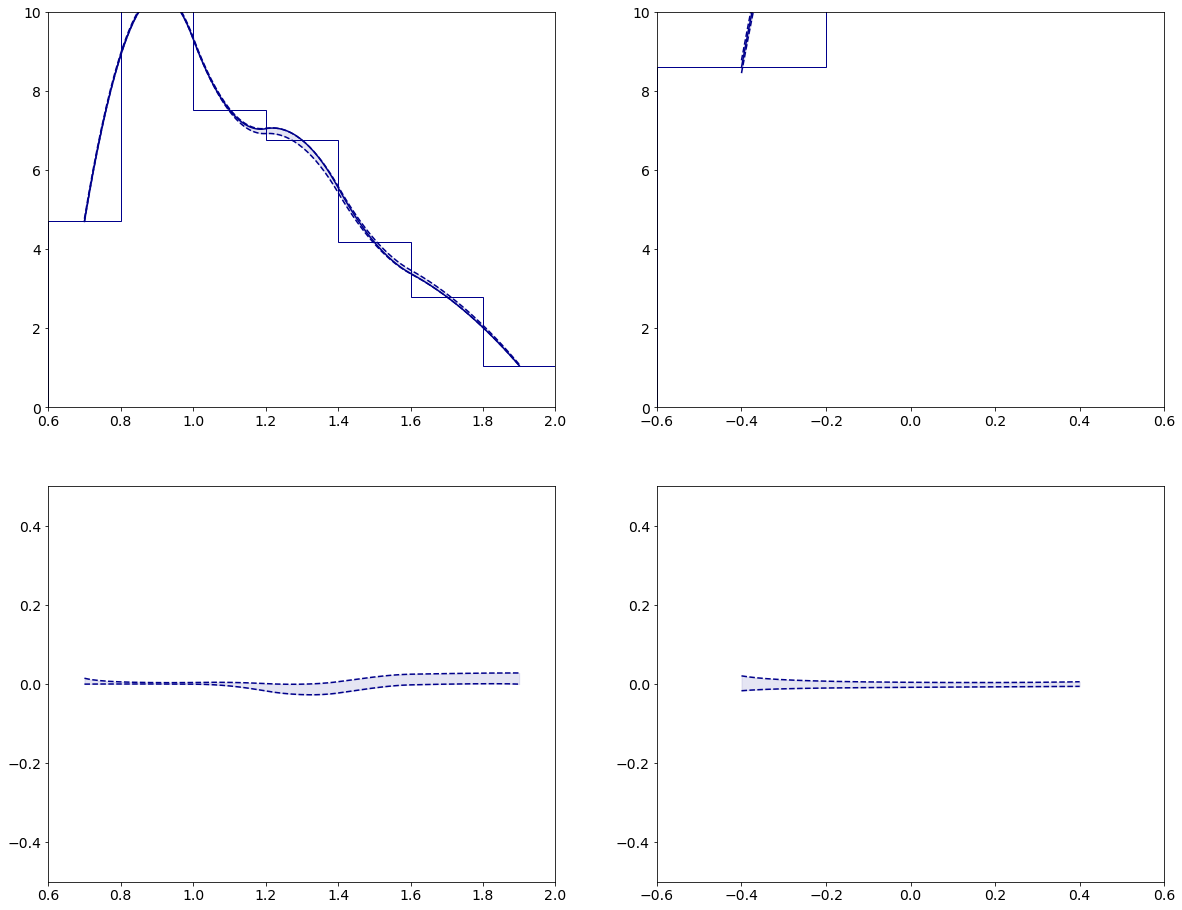

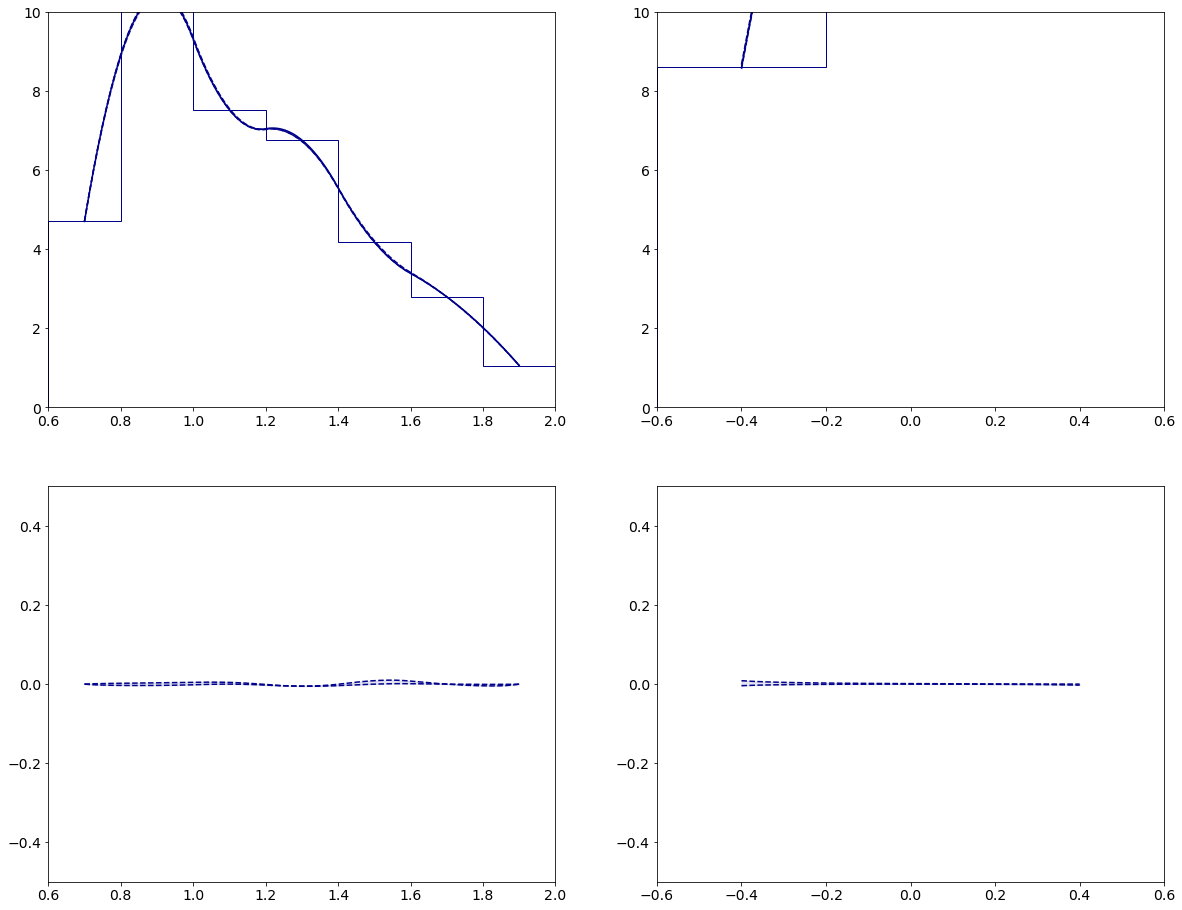

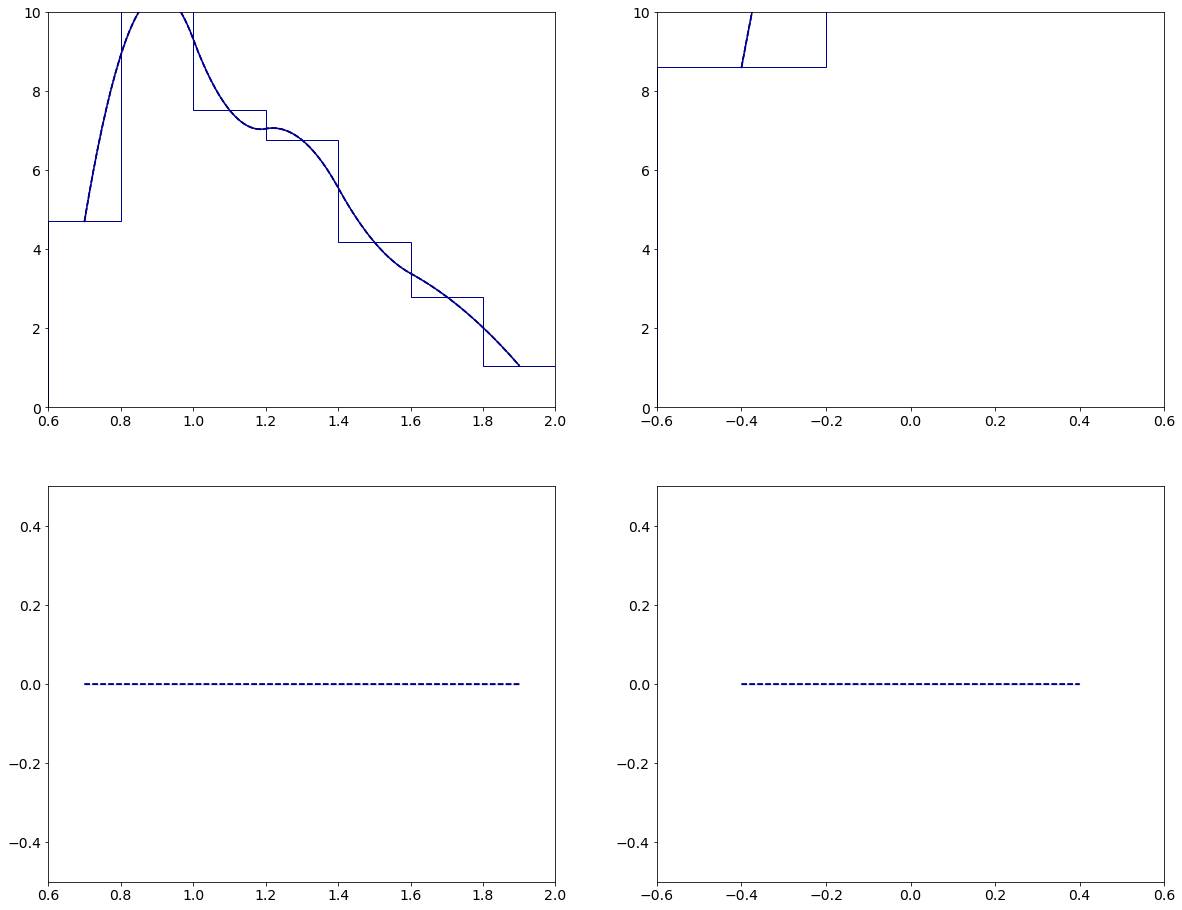

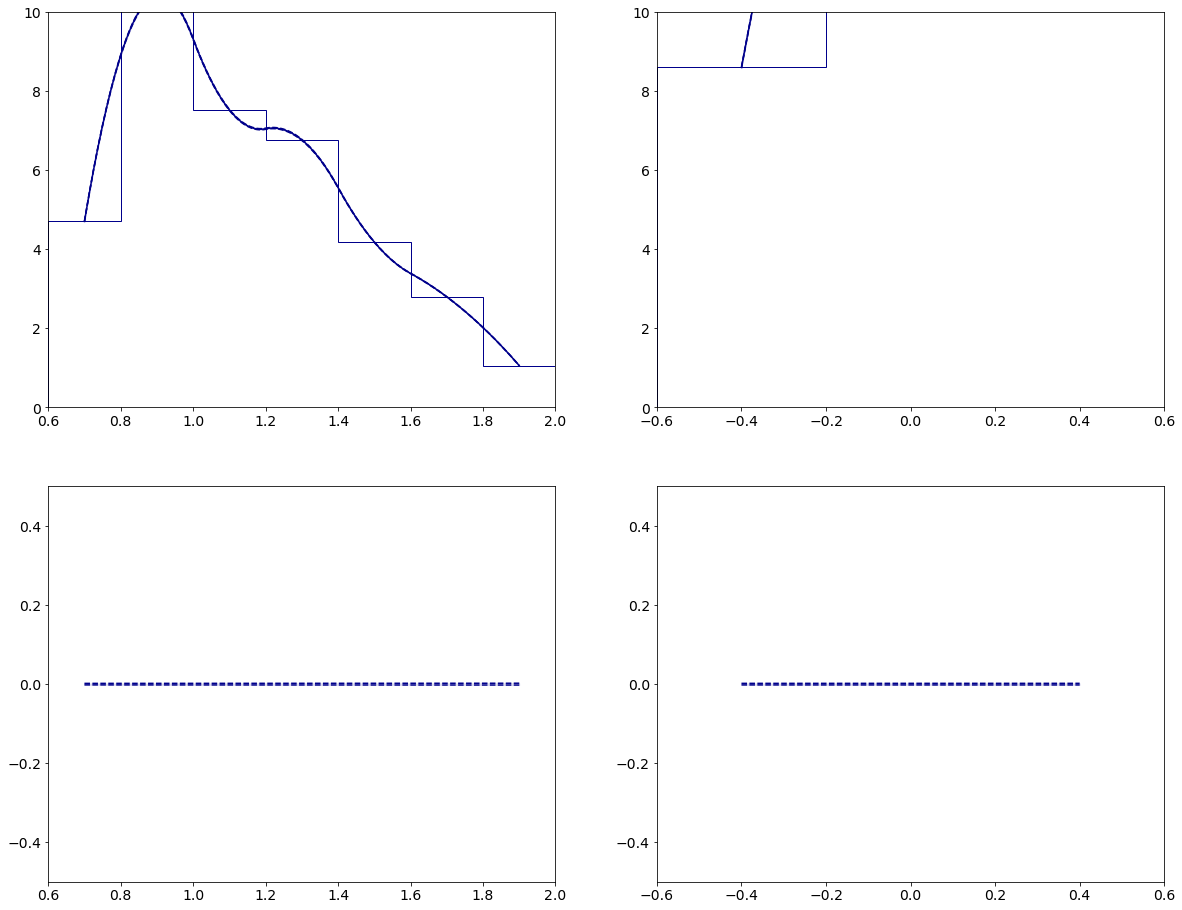

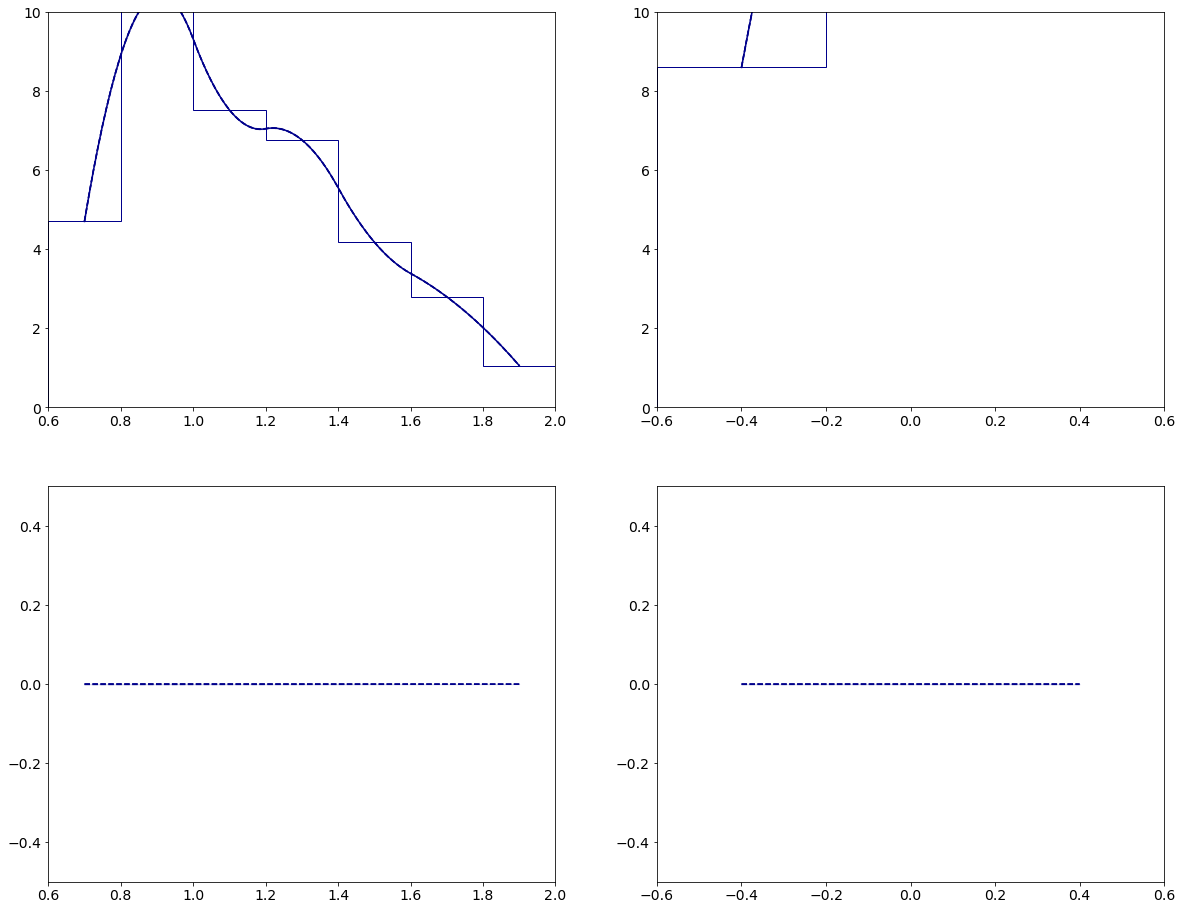

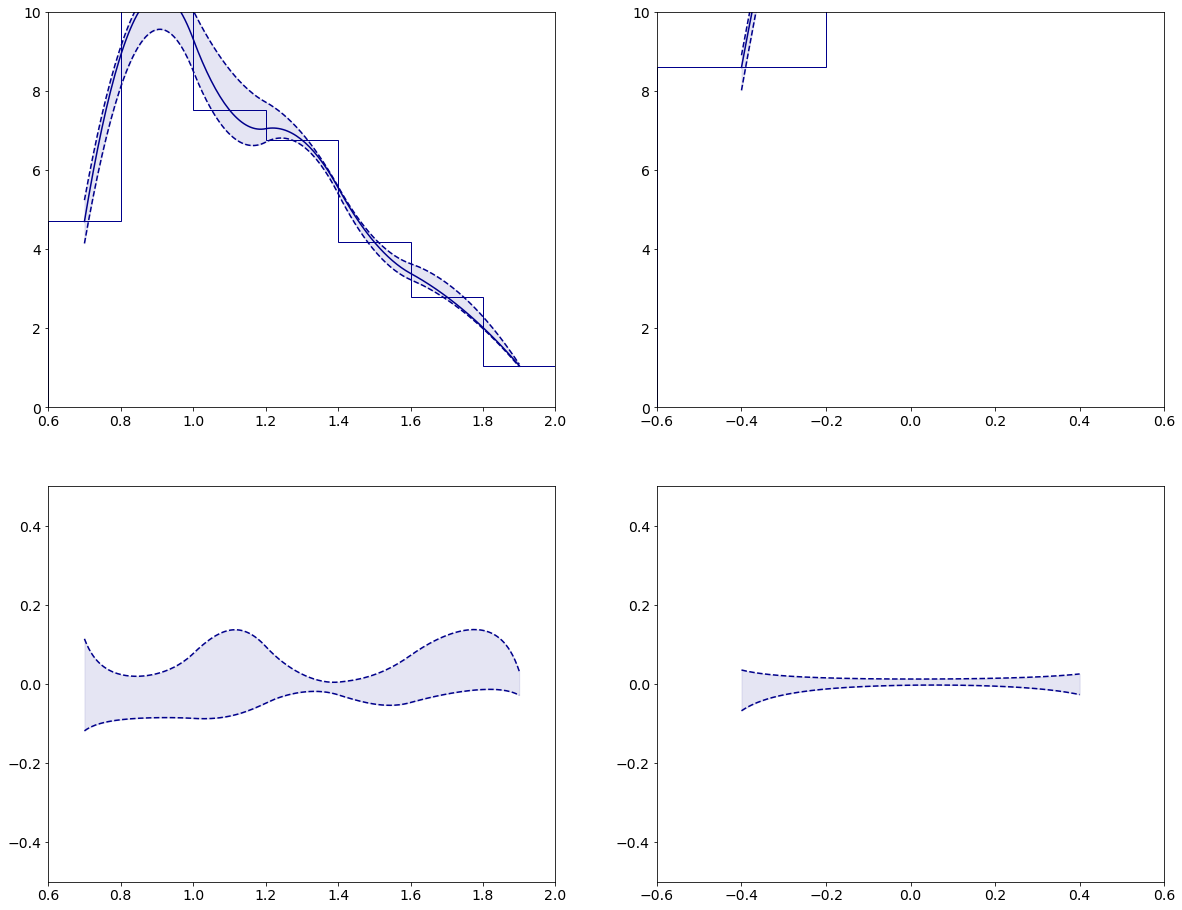

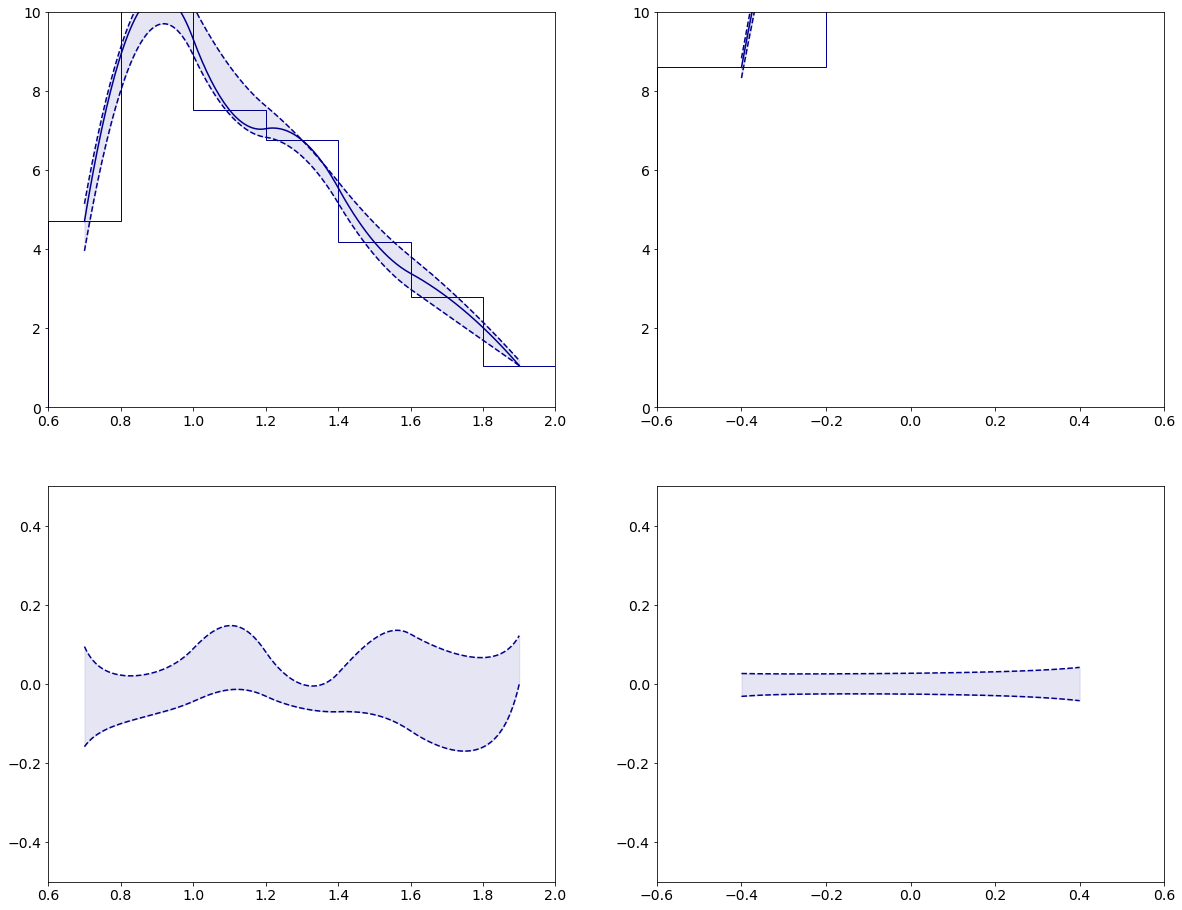

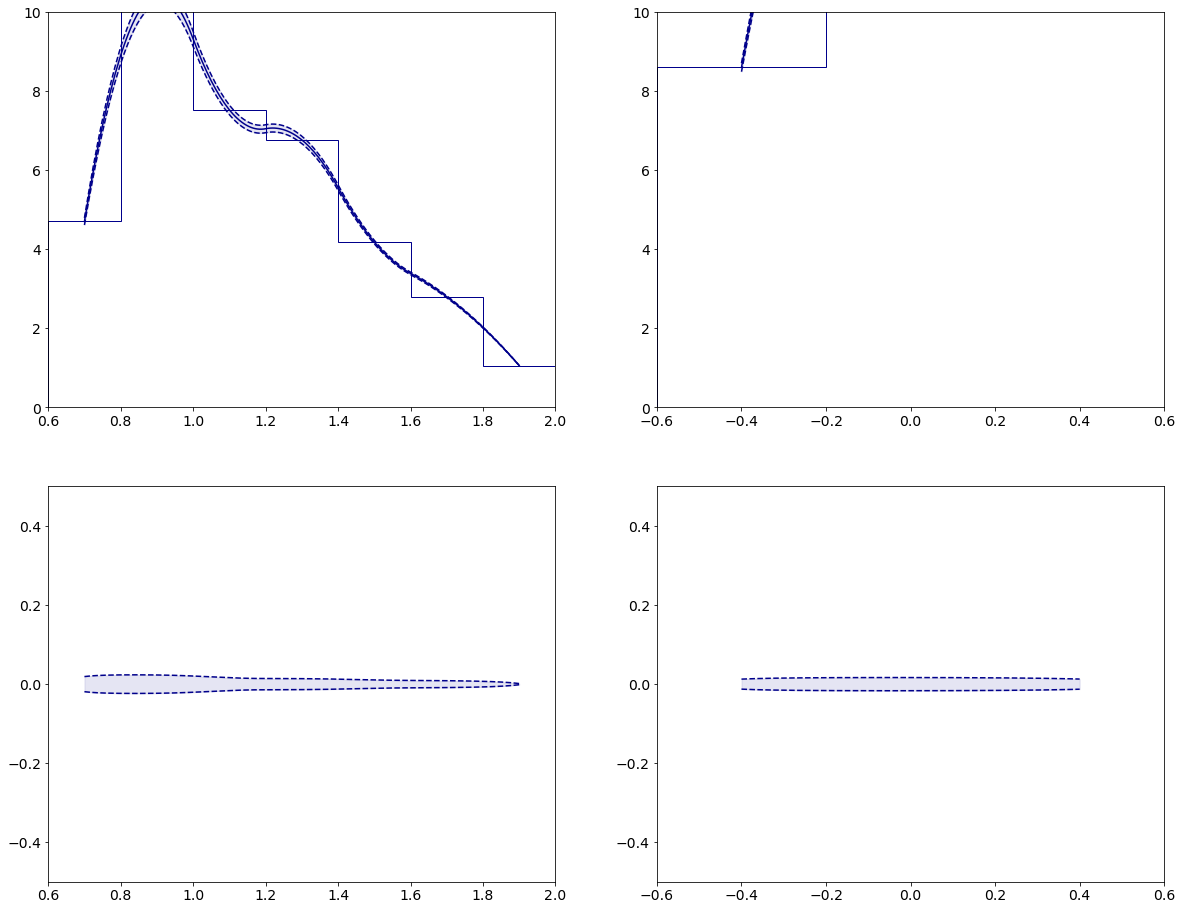

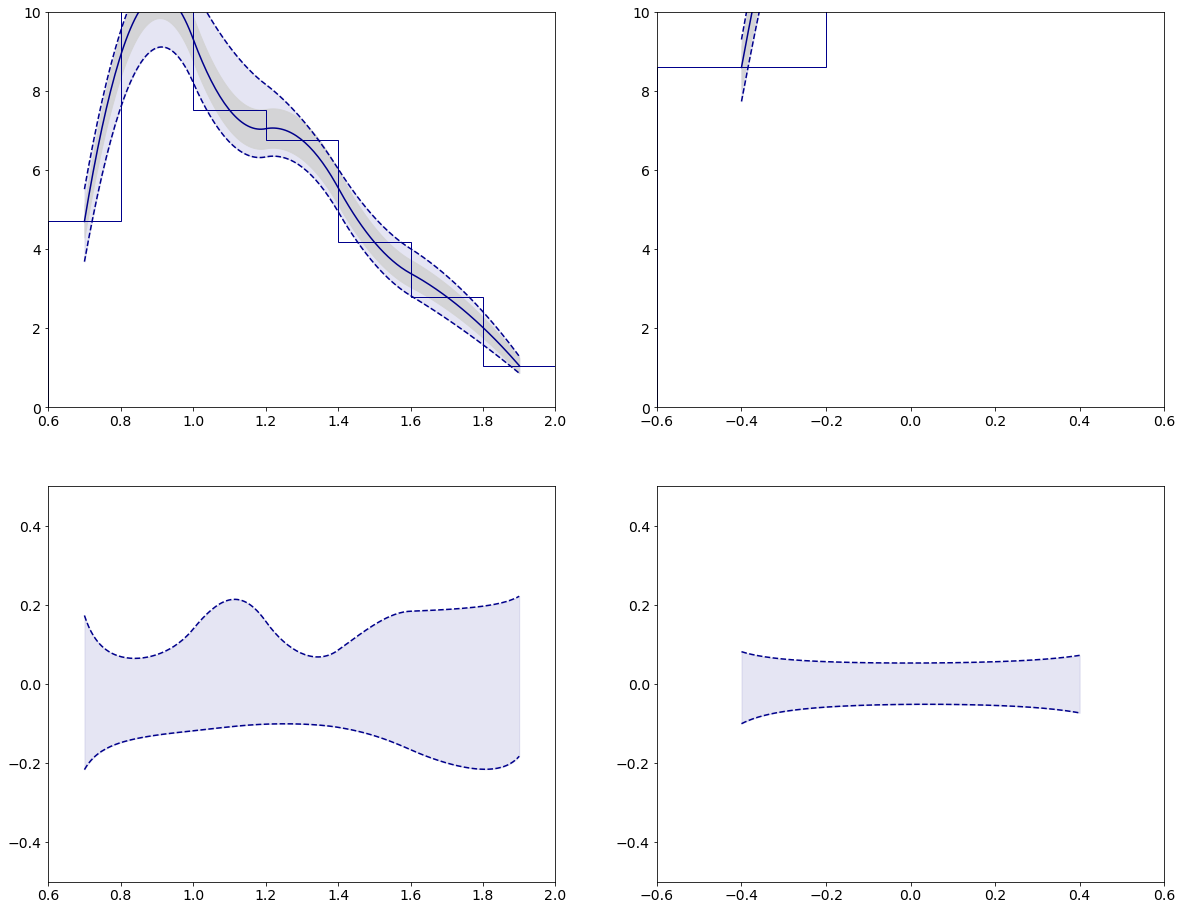

In [78]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,10.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[22.04649898 60.60320122 44.69415038 34.9345765  27.62280339 15.44408442
  8.99971766]
[21.87268936 60.59357718 43.89885208 34.32815444 27.47227861 15.37553676
  8.82123829]
0      0.007946
1      0.007239
2      0.006656
3      0.006167
4      0.005749
         ...   
195    0.012849
196    0.012309
197    0.011716
198    0.011071
199    0.010374
Length: 200, dtype: float64 0.005988382163403634
0      1.624269e-16
1      9.895334e-04
2      1.772735e-03
3      2.399879e-03
4      2.905817e-03
           ...     
195   -4.170268e-03
196   -5.443295e-03
197   -6.784065e-03
198   -8.191336e-03
199   -9.663494e-03
Length: 200, dtype: float64 -0.0029847717151939446
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 45.31785771 122.27750358  77.17863622]
[ 44.96593164 120.61894018  76.43735108]
0      0.004228
1      0.004332
2      0.004428
3      0.004519
4      0.004604
         ...   
195    0.006689
196  

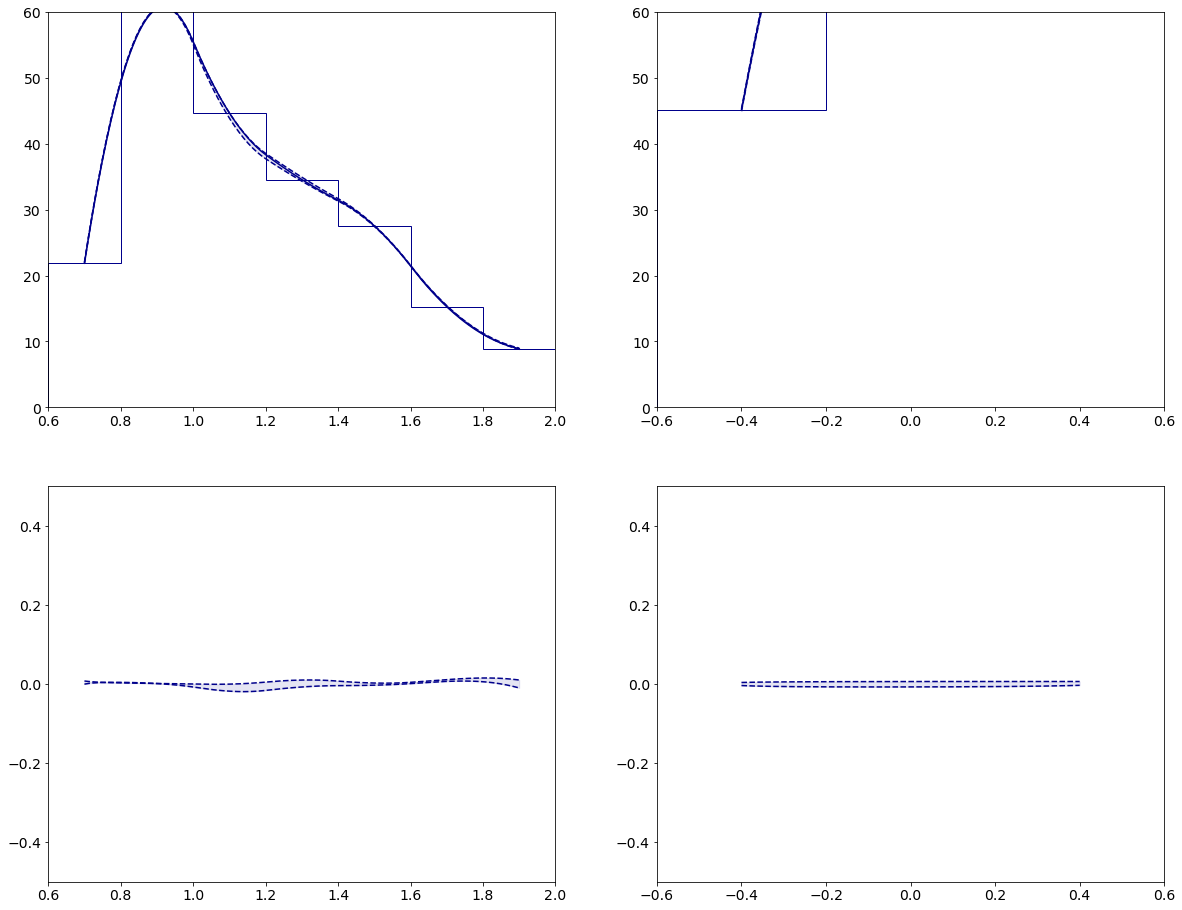

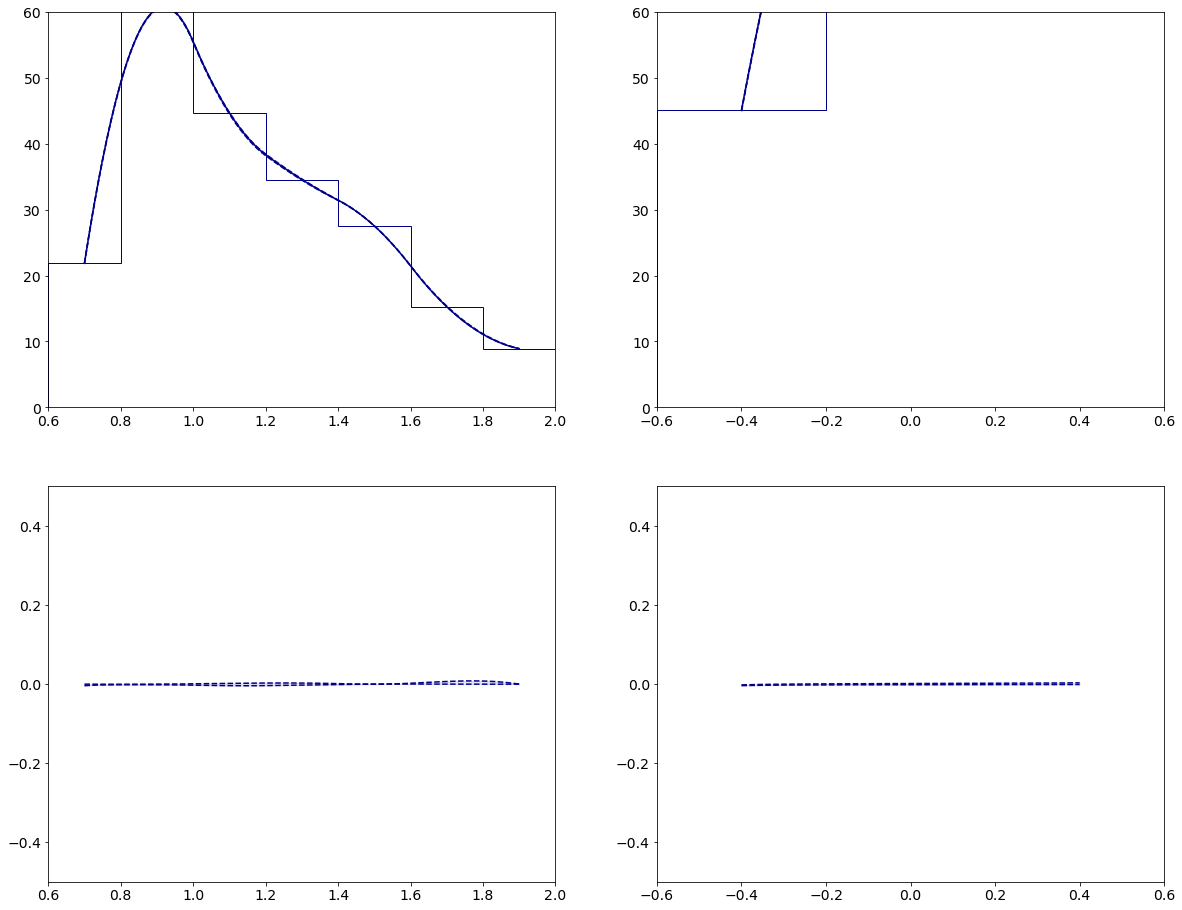

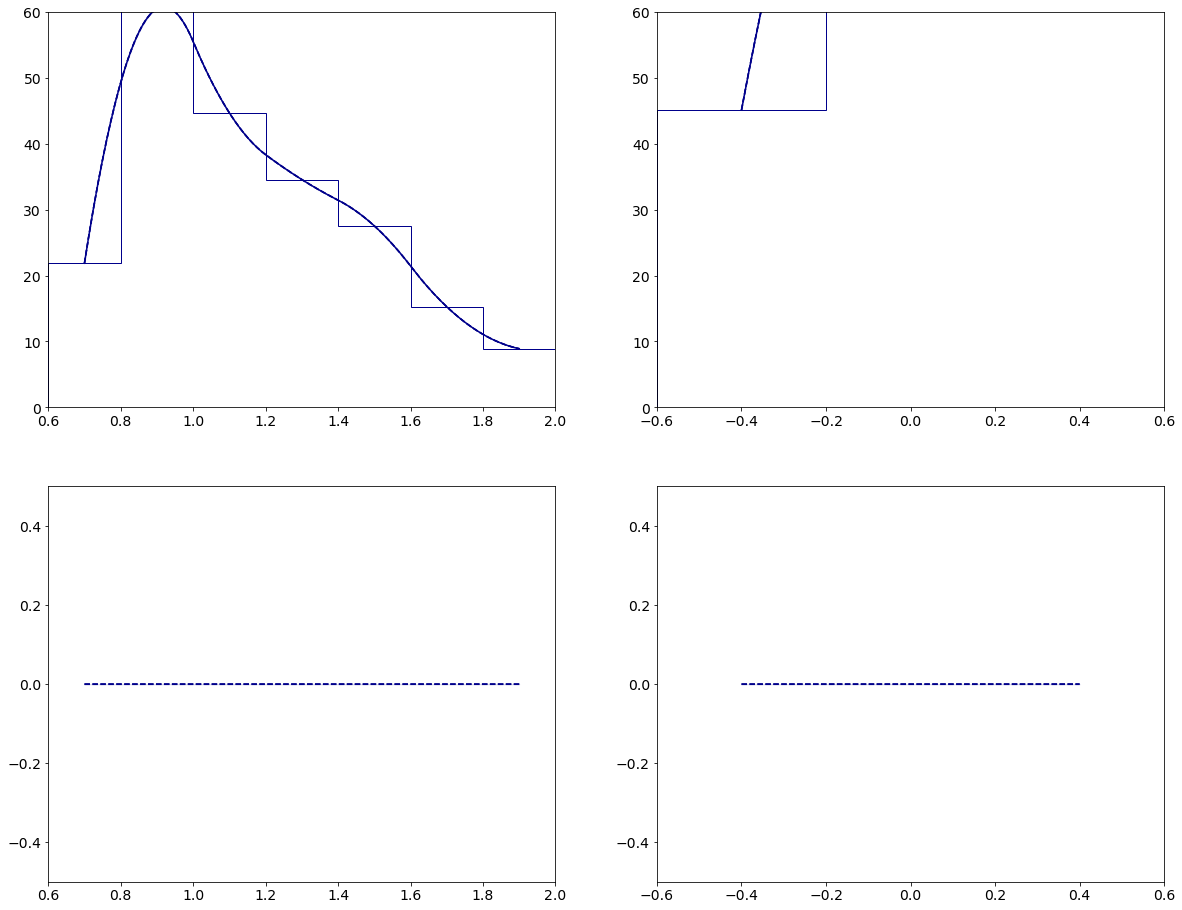

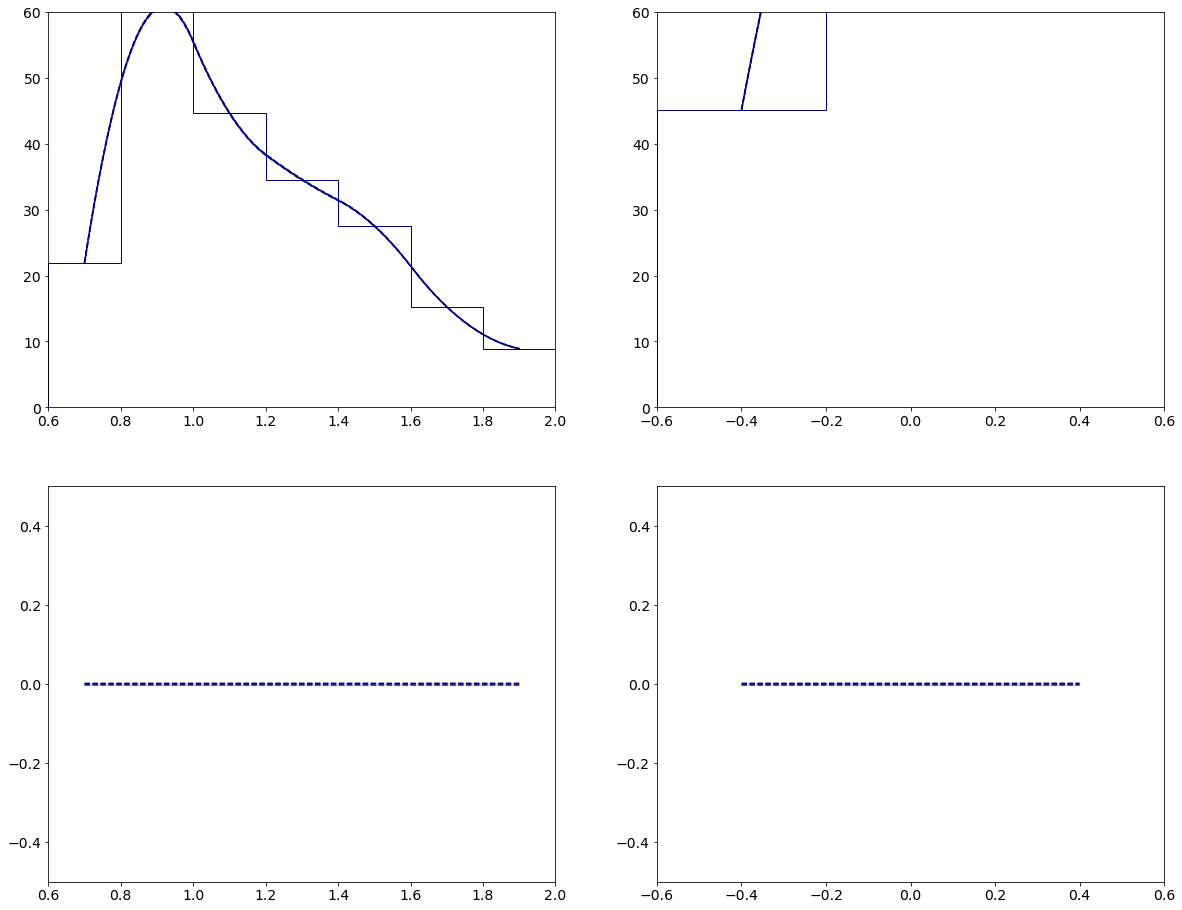

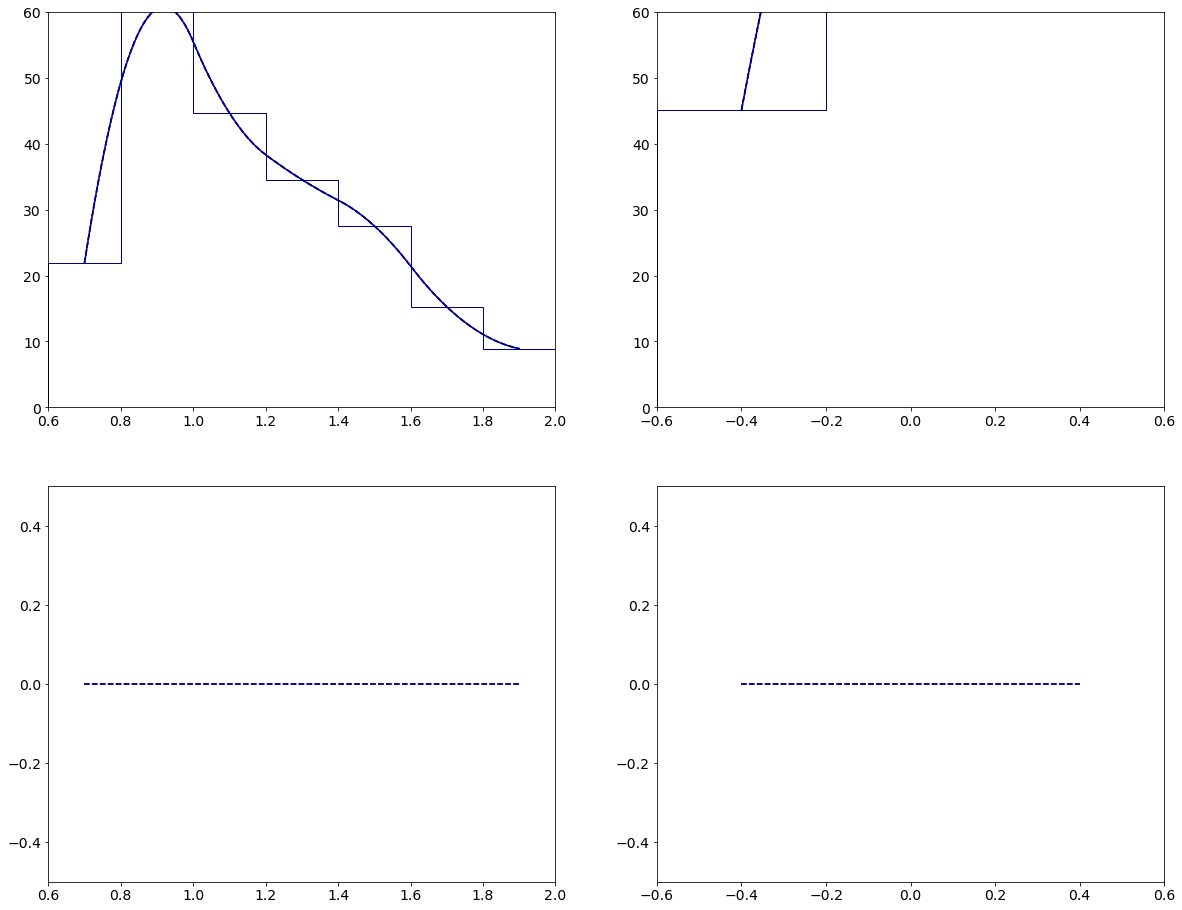

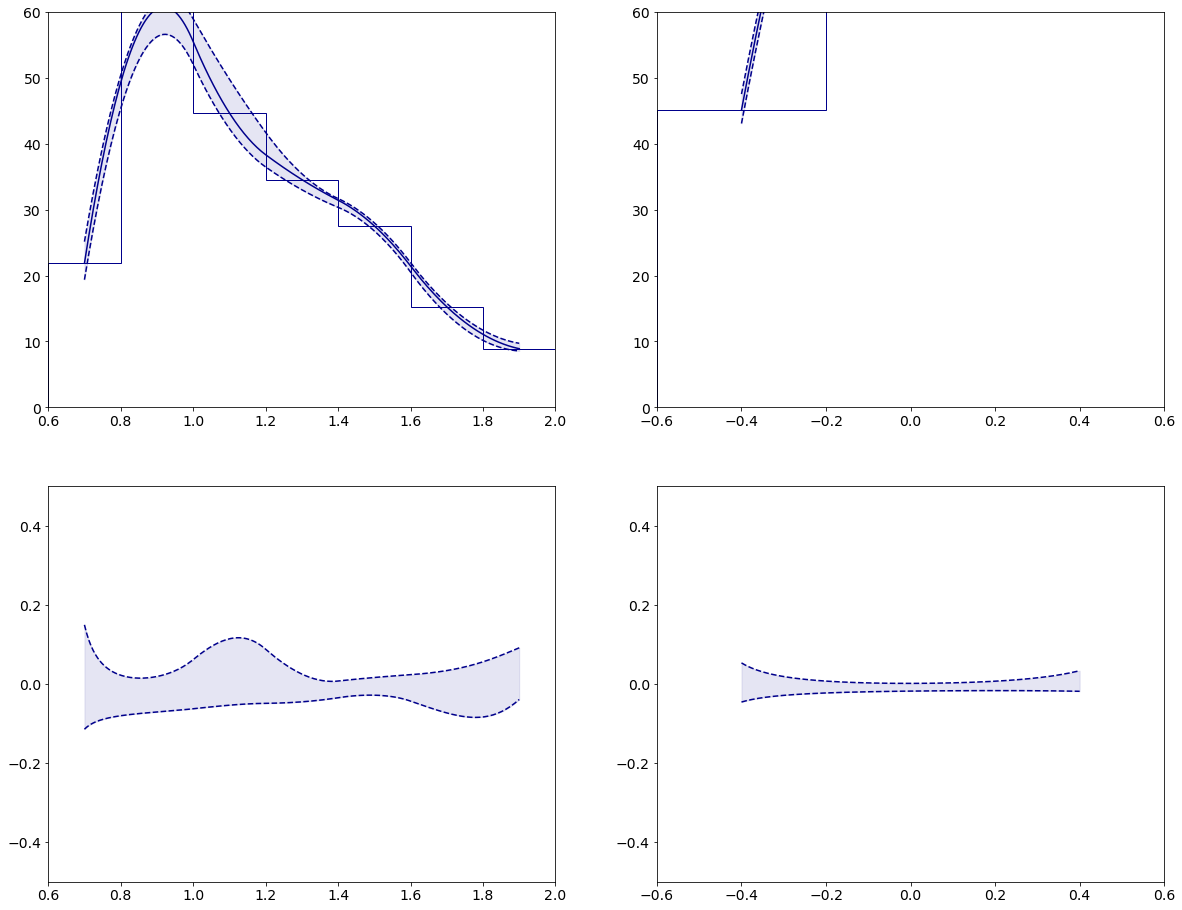

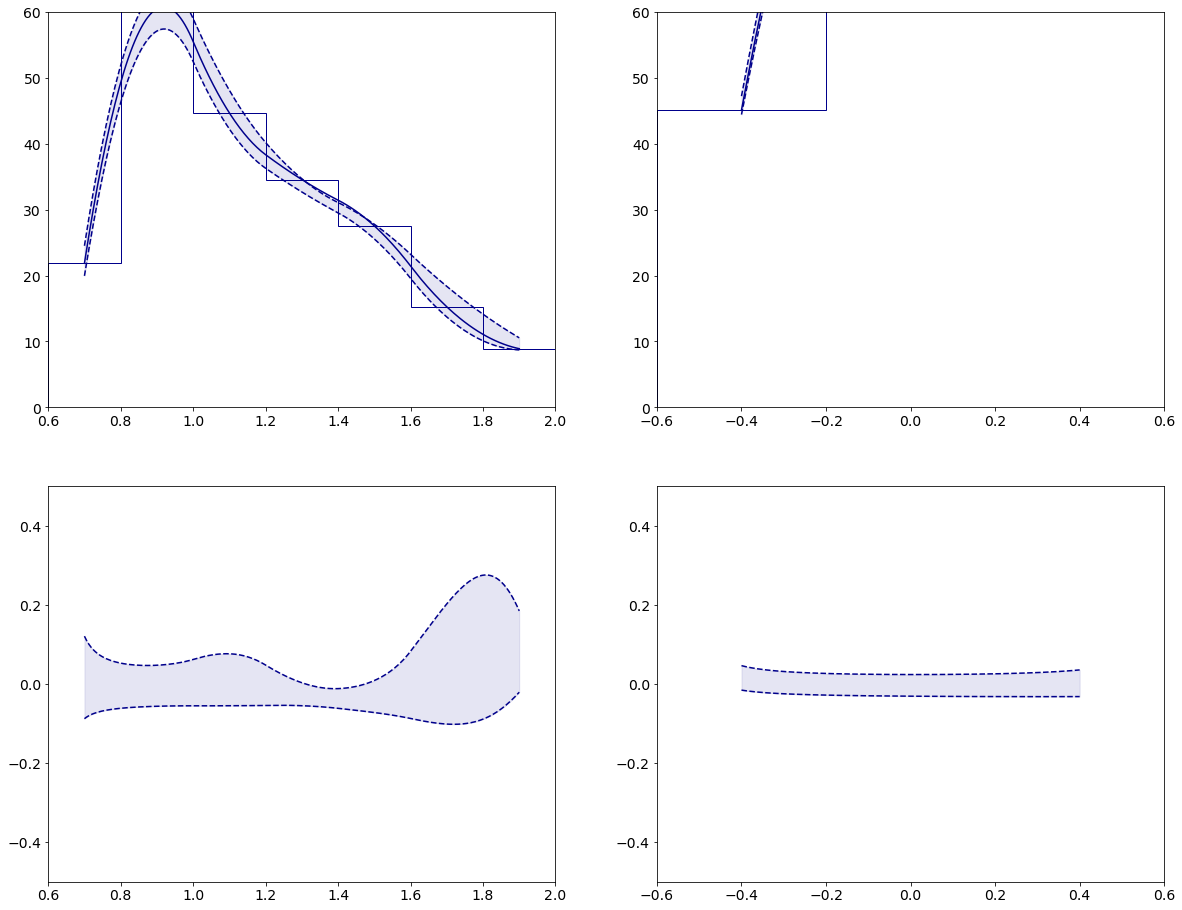

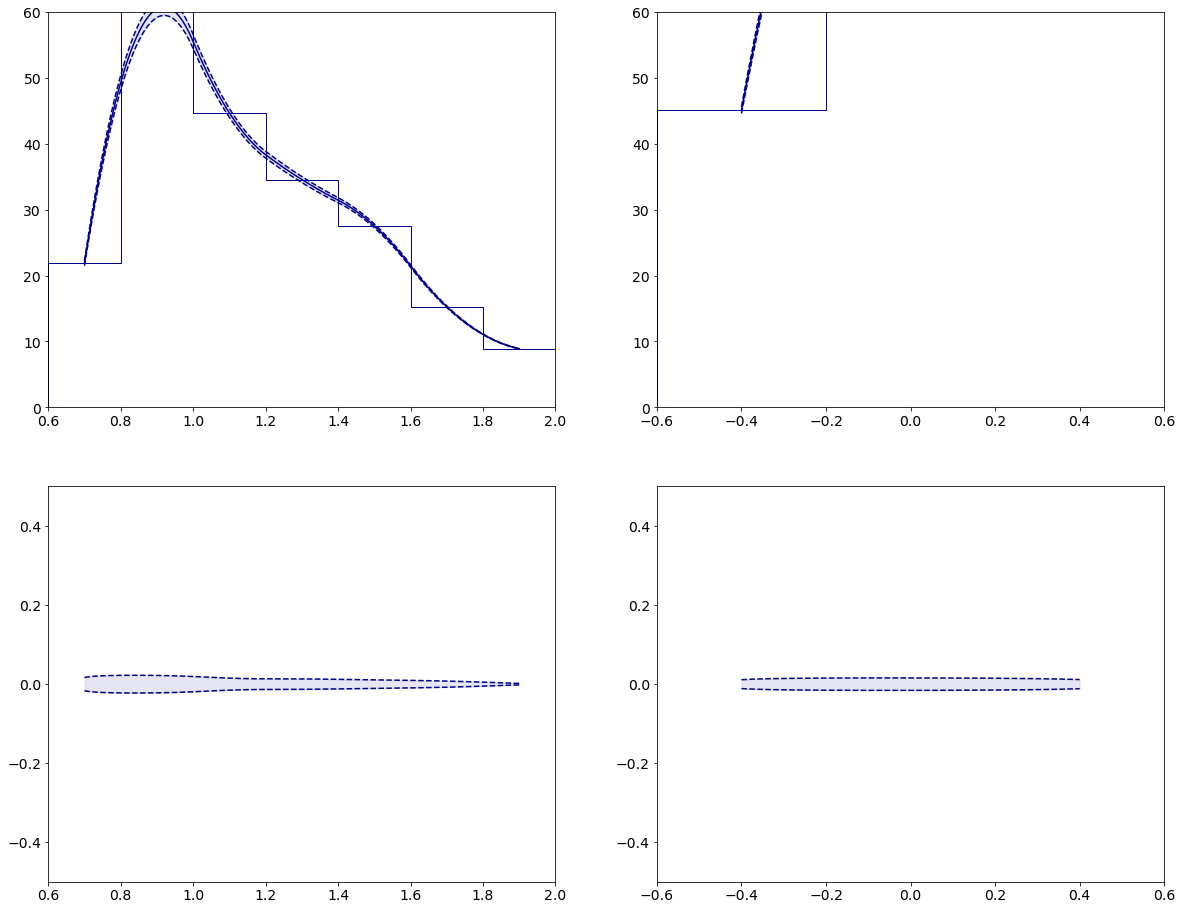

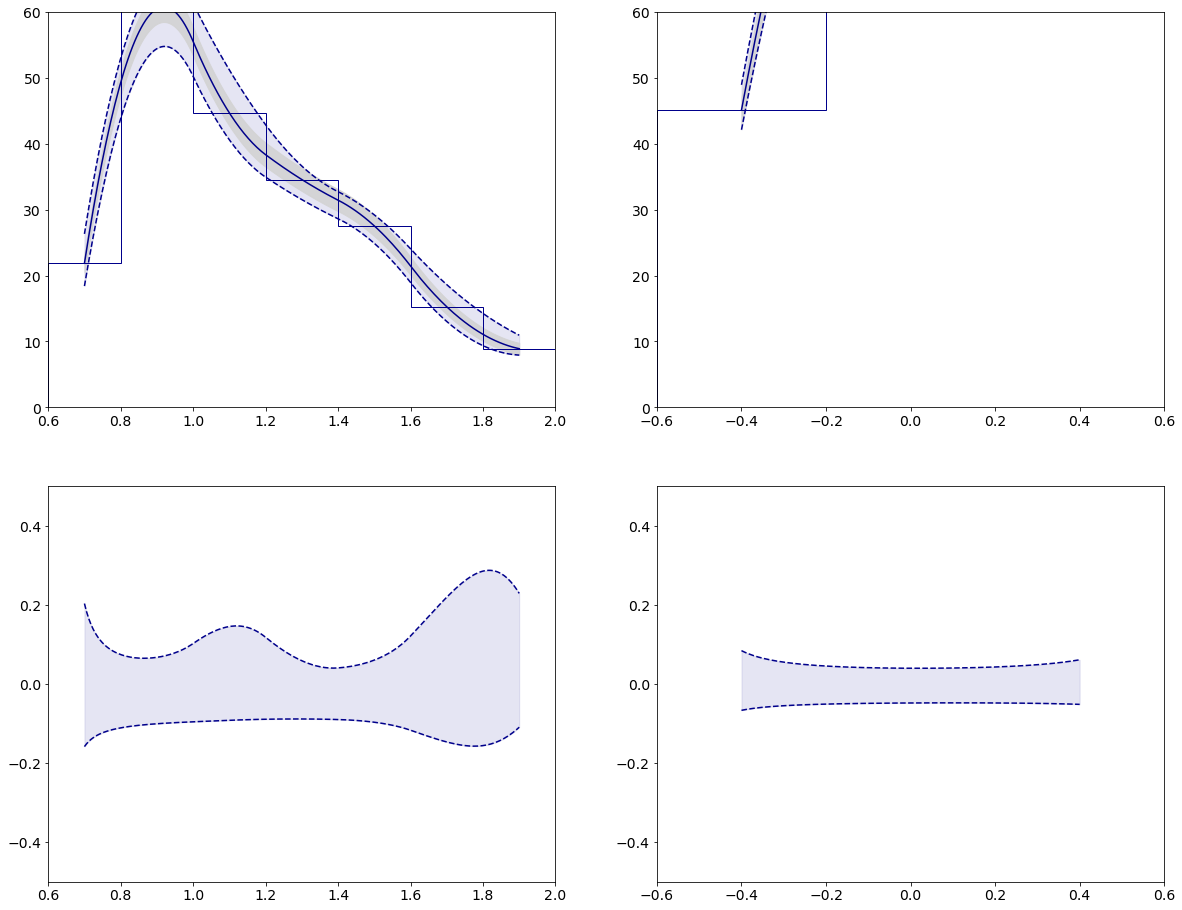

In [79]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,60.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

In [80]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([2.46959906, 3.47403597, 2.42247221, 1.84295454, 1.15494913,
       0.69232704, 0.35386922]), 'Diff_YWW_YX': array([3.22489668, 6.68084844, 4.36084753])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([ 4.70315088, 10.44099002,  7.52624536,  6.76607145,  4.18161156,
        2.79688783,  1.05735529]), 'Diff_YWW_YX': array([ 8.59937021, 21.31631609, 13.18258853])}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'R_MWW_MX': array([21.87268936, 60.50475663, 44.69384737, 34.5769168 , 27.54610604,
       15.26949608,  8.90731406]), 'Diff_YWW_YX': array([ 45.12704922, 121.47705871,  76.66704618])}}
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([0.25831186, 0.30530032, 0.25768241, 0.22396414, 0.17667698,
       0.1360148 , 0.09831638]), 'Diff_YWW_YX': array([0.29638231, 0.42455099, 0.34332558])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([0.40433611, 0.60028933, 0.51089074, 0.48583301, 0.3809249 ,
       0.31367141, 0.19057376]), '

### Background

### Load and select events

In [81]:
# ['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
#        'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
#        'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
#        'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
#        'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
#        'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
#        'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
#        'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
#        'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
#        'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
#        'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
#        'betaStar_rnd', 'period', 'jet0_pt_nom', 'jet0_energy_nom',
#        'jet0_mass_nom', 'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom',
#        'jet0_pz_nom', 'muon0_pt_nom', 'muon0_energy_nom', 'muon0_px_nom',
#        'muon0_py_nom', 'muon0_pz_nom', 'WLeptonicPt_nom',
#        'WLeptonicPx_nom', 'WLeptonicPy_nom', 'WLeptonicPz_nom',
#        'WLeptonicE_nom', 'WLeptonicM_nom', 'WW_energy_nom', 'WW_pz_nom',
#        'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
#        'within_aperture', 'xlow', 'xhigh', 'ylow', 'yhigh', 'MX', 'YX',
#        'diffMWW_MX', 'ratioMWW_MX', 'shiftedRatioMWW_MX', 'diffYWW_YX',
#        'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']

In [82]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = []
fileNames_bkg = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-single-arm-muon-2017B",
            "data-random-resample_50-single-arm-muon-2017C",
            "data-random-resample_50-single-arm-muon-2017D",
            "data-random-resample_50-single-arm-muon-2017E",
            "data-random-resample_50-single-arm-muon-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
            "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
            "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
            "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
            "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-single-arm-electron-2017B",
            "data-random-resample_50-single-arm-electron-2017C",
            "data-random-resample_50-single-arm-electron-2017D",
            "data-random-resample_50-single-arm-electron-2017E",
            "data-random-resample_50-single-arm-electron-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
            "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
            "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
            "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
            "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-2018-muon-2018A",
            "data-random-resample_50-2018-muon-2018B",
            "data-random-resample_50-2018-muon-2018C",
            "data-random-resample_50-2018-muon-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
            "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
            "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
            "data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5"
#             "data-random-resample_50-2018-muon-2018D-1": "data-store-data-random-resample_50-2018-muon-2018D-1.h5",
#             "data-random-resample_50-2018-muon-2018D-2": "data-store-data-random-resample_50-2018-muon-2018D-2.h5",
#             "data-random-resample_50-2018-muon-2018D-3": "data-store-data-random-resample_50-2018-muon-2018D-3.h5",
#             "data-random-resample_50-2018-muon-2018D-4": "data-store-data-random-resample_50-2018-muon-2018D-4.h5",
#             "data-random-resample_50-2018-muon-2018D-5": "data-store-data-random-resample_50-2018-muon-2018D-5.h5",
#             "data-random-resample_50-2018-muon-2018D-6": "data-store-data-random-resample_50-2018-muon-2018D-6.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-2018-electron-2018A",
            "data-random-resample_50-2018-electron-2018B",
            "data-random-resample_50-2018-electron-2018C",
            "data-random-resample_50-2018-electron-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
            "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
            "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
            "data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5"
        }
    
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None
df_protons_multiRP_bkg_events_nTracks40 = None

df_counts_bkg_list_ = []
# df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
df_protons_multiRP_bkg_events_list_nTracks40_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
#         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
        df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
            ['crossingAngle',
             'jet0_eta', 'jet0_phi', 
             'jet0_tau1', 'jet0_tau2',
             'met', 'met_phi',
             'num_bjets_ak4',
             'pfcand_nextracks', 'pfcand_nextracks_noDRl',
             'WLeptonicEta', 'WLeptonicPhi',
             'muon0_eta', 'muon0_phi', 'muon0_iso',
             'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
             'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
             'muon0_pt_nom', 
             'WLeptonicPt_nom', 
             'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
             'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
        ]

        print ( df_protons_multiRP_bkg_events__.shape[0] )
        df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
        print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
        print ( df_protons_multiRP_bkg_events_def__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )    
    
        df_counts_bkg_list_.append( df_counts_bkg__ )
#         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
        df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

# df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

{'data-random-resample_50-2018-muon-2018A': 'output/data-store-data-random-resample_50-2018-muon-2018A.h5', 'data-random-resample_50-2018-muon-2018B': 'output/data-store-data-random-resample_50-2018-muon-2018B.h5', 'data-random-resample_50-2018-muon-2018C': 'output/data-store-data-random-resample_50-2018-muon-2018C.h5', 'data-random-resample_50-2018-muon-2018D': 'output/data-store-data-random-resample_50-2018-muon-2018D.h5'}
data-random-resample_50-2018-muon-2018A
output/data-store-data-random-resample_50-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
4157146
78939
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 4157146, 'Muon': 4150581, 'Jet': 2972711, 'Jet_Muon': 2935630, 'MET': 2276133, 'Jet_MET': 2039004, 'PrunedMass': 567581, 'Tau21': 370167, 'BJet_Veto': 294218, 'Xi_CMS': 259819, 'WLeptonic': 170243, 'Jet_WLeptonic': 165851, 'MWW': 156470, 'ExtraTr

In [83]:
df_counts_bkg

All                     108448900
Jet                     108448900
Muon                    105076200
ProtonRnd_check_none    105076200
ProtonRnd                71804550
dtype: int64

In [84]:
df_protons_multiRP_bkg_events.columns.values

array(['crossingAngle', 'jet0_eta', 'jet0_phi', 'jet0_tau1', 'jet0_tau2',
       'met', 'met_phi', 'num_bjets_ak4', 'pfcand_nextracks',
       'pfcand_nextracks_noDRl', 'WLeptonicEta', 'WLeptonicPhi',
       'muon0_eta', 'muon0_phi', 'muon0_iso', 'run_rnd', 'lumiblock_rnd',
       'event_rnd', 'crossingAngle_rnd', 'period', 'jet0_pt_nom',
       'jet0_energy_nom', 'jet0_corrmass_nom', 'muon0_pt_nom',
       'WLeptonicPt_nom', 'MWW_nom', 'YWW_nom', 'xiCMS_45_nom',
       'xiCMS_56_nom', 'xi_nom', 'MX_nom', 'YX_nom', 'R_MWW_MX_nom',
       'Diff_YWW_YX_nom'], dtype=object)

In [85]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...  \
run    lumiblock event     slice                          ...   
316457 766       887404608 0                           0  ...   
                           3                           0  ...   
315645 279       282676384 5                           3  ...   
316457 766       887404608 6                           0  ...   
315645 279       282676384 7                           3  ...   
...                                                  ...  ...   
325022 496       801723712 1                           3  ...   
                           4                           3  ...   
                           20                          3  ...   
                           28                          3  ...   
                           45                          3  ...   

                                  WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event     slice                                          
316457 766       887404608 0           341.841736  617.227478 -0.592941   
                           3           341.841736  617.227478 -0.592941   
315645 279       28267638

In [86]:
df_protons_multiRP_bkg_events_nTracks40

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                      
316199 739       997501056  0              143.0 -0.711949  3.141166   
       431       606212352  0              148.0  1.537150 -0.524992   
       457       640544640  0              147.0 -0.252821 -2.567096   
       461       645320256  0              147.0 -0.135645 -0.994506   
       466       651308480  0              147.0  0.361461  1.984391   
...                                          ...       ...       ...   
325170 453       844710400  49             136.0 -1.037904 -2.788063   
       494       922318464  49             135.0  1.172148  2.442343   
       698       1276671616 49             132.0 -0.122631  2.536145   
       584       1081645568 49             134.0  0.914759 -0.834245   
       567       1052482304 49             134.0 -0.456844 -2.794641   

                                   jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event      slice                                               
316199 739       997501056  0       0.367093   0.203858  137.177704 -0.232372   
       431       606212352  0       0.274689   0.145763  134.065582  2.679044   
       457       640544640  0       0.355102   0.147476   52.566811  0.124150   
       461       645320256  0       0.402971   0.133848  104.933250  2.180758   
       466       651308480  0       0.281934   0.115077  286.500305 -1.026712   
...                                      ...        ...         ...       ...   
325170 453       844710400  49      0.362377   0.140179  233.978668  0.120907   
       494       922318464  49      0.262487   0.118982   51.376549 -1.032905   
       698       1276671616 49      0.422794   0.110299  148.000854 -0.438284   
       584       1081645568 49      0.472690   0.267931  226.064713  2.426128   
       567       1052482304 49      0.182705   0.094547  191.122223  0.353478   

                                   num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event      slice                                    
316199 739       997501056  0                  0                15   
       431       606212352  0                  0                40   
       457       640544640  0                  0                38   
       461       645320256  0                  0                25   
       466       651308480  0                  0                20   
...                                          ...               ...   
325170 453       844710400  49                 0                39   
       494       922318464  49                 0                18   
       698       1276671616 49                 0                25   
       584       1081645568 49                 0                38   
       567       1052482304 49                 0                27   

                                   pfcand_nextracks_noDRl  ...  \
run    lumiblock event      slice                          ...   
316199 739       997501056  0                          15  ...   
       431       606212352  0                          41  ...   
       457       640544640  0                          40  ...   
       461       645320256  0                          25  ...   
       466       651308480  0                          20  ...   
...                                                   ...  ...   
325170 453       844710400  49                         39  ...   
       494       922318464  49                         18  ...   
       698       1276671616 49                         25  ...   
       584       1081645568 49                         39  ...   
       567       1052482304 49                         27  ...   

                                   WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event      slice                                          
316199 739       997501056  0           207.508850  504.416473 -0.354777   
       431       606212352  0           280.96

In [87]:
norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors['Bkg'] )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )

In [88]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...     MWW_nom  \
run    lumiblock event     slice                          ...               
316457 766       887404608 0                           0  ...  617.227478   
                           3                           0  ...  617.227478   
315645 279       282676384 5                           3  ...  604.431396   
316457 766       887404608 6                           0  ...  617.227478   
315645 279       282676384 7                           3  ...  604.431396   
...                                                  ...  ...         ...   
325022 496       801723712 1                           3  ...  657.794128   
                           4                           3  ...  657.794128   
                           20                          3  ...  657.794128   
                           28                          3  ...  657.794128   
                           45                          3  ...  657.794128   

                                   YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event     slice                                         
316457 766       8874

In [89]:
def plot_regions_background( df_protons_multiRP_bkg_events ):
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 7813.260000000004 +/- 12.500607985214158
Number of events (A): 1126.68 +/- 4.746956919964622
Number of events (B): 2881.76 +/- 7.591785033837564
Number of events (C): 875.08 +/- 4.18349136487695
Number of events (D): 2929.7400000000002 +/- 7.65472403160297


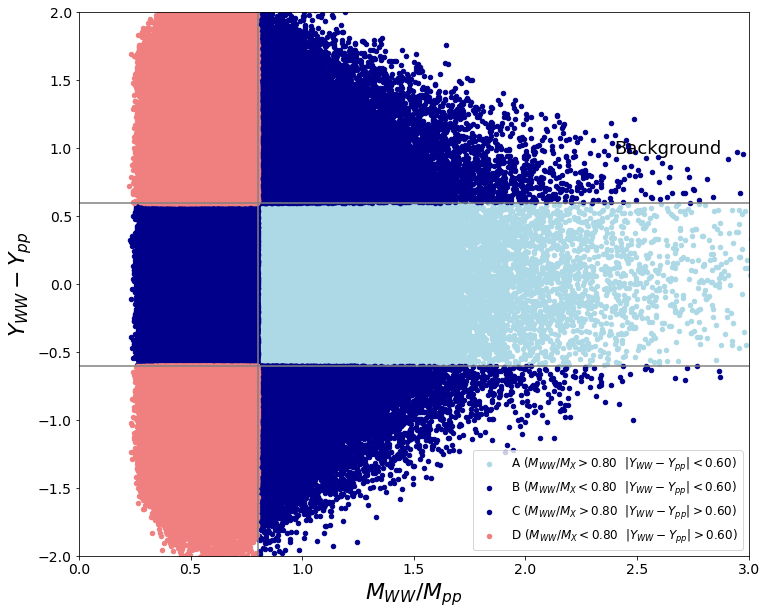

In [90]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 49.900000000000006 +/- 0.9989994994993743
Number of events (A): 10.559999999999999 +/- 0.45956501172304237
Number of events (B): 14.839999999999998 +/- 0.5447935388750494
Number of events (C): 6.9399999999999995 +/- 0.3725587202039432
Number of events (D): 17.559999999999995 +/- 0.5926212956011623


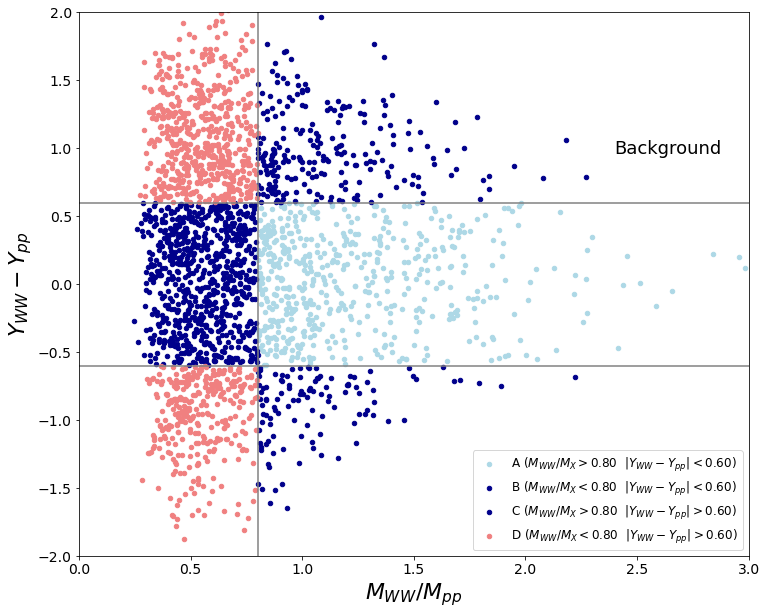

In [91]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [92]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        df_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-muon-2018A': 'output/data-store-data-2018-muon-2018A.h5', 'data-2018-muon-2018B': 'output/data-store-data-2018-muon-2018B.h5', 'data-2018-muon-2018C': 'output/data-store-data-2018-muon-2018C.h5', 'data-2018-muon-2018D': 'output/data-store-data-2018-muon-2018D.h5'}
data-2018-muon-2018A
output/data-store-data-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018B
output/data-store-data-2018-muon-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018C
output/data-store-data-2018-muon-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018D
output/data-store-data-2018-muon-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [93]:
df_counts_data

All                  2168978
Jet                  2168978
Muon                 2101524
Proton_check_none    2101524
Proton               1436091
dtype: int64

In [94]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316199 738       995631040  0              143.0       0.3  13.800958   
                 995580288  0              143.0       0.3  13.800958   
                 995377984  0              143.0       0.3  13.800958   
                 995499584  0              143.0       0.3  13.800958   
       739       997434176  0              143.0       0.3  13.797550   
...                                          ...       ...        ...   
325170 612       1131288576 0              133.0       0.3   9.424077   
       636       1171731200 0              133.0       0.3   9.308405   
                 1172657792 0              133.0       0.3   9.308405   
                 1172100864 0              133.0       0.3   9.308405   
       637       1174399232 0              133.0       0.3   9.307345   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316199 738       995631040  0      255.131989  0.222181  0.465844   
                 995580288  0      271.237091  1.201405 -0.672793   
                 995377984  0      229.029266  0.813785  2.755530   
                 995499584  0      255.765457 -0.307157  0.577788   
       739       997434176  0      260.124023 -1.864394 -2.418813   
...                                       ...       ...       ...   
325170 612       1131288576 0      246.729645  1.276864 -0.892836   
       636       1171731200 0      228.047119  0.597068  2.040150   
                 1172657792 0      379.605713  0.926268  1.182455   
                 1172100864 0      251.445709 -0.306289  2.033631   
       637       1174399232 0      387.555847 -1.455234  2.785599   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
316199 738       995631040  0       267.062378   11.652953      12.641805   
                 995580288  0       499.218048   58.163593      65.961021   
                 995377984  0       314.838440   17.131739      18.583464   
                 995499584  0       282.566986   68.186745      73.808731   
       739       997434176  0       862.344360   16.077612      18.077419   
...                                        ...         ...            ...   
325170 612       1131288576 0       479.071381    8.522972       9.892778   
       636       1171731200 0       274.537445   12.774544      13.872478   
                 1172657792 0       563.302612   45.636650      50.065033   
                 1172100864 0       275.799347   64.325394      70.173836   
       637       1174399232 0       886.254150  103.373039     117.672409   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316199 738       995631040  0       0.114730  ...  1081.969849 -0.666323   
                 995580288  0       0.327002  ...  1574.876953 -0.395413   
                 995377984  0       0.153312  ...   856.215759 -0.402162   
                 995499584  0       0.384951  ...   916.753662  0.275115   
       739       997434176  0       0.175540  ...  1315.981689 -0.325852   
...                                      ...  ...          ...       ...   
325170 612       1131288576 0       0.102824  ...   893.898987  0.588127   
       636       1171731200 0       0.148284  ...   937.104431 -0.351514   
                 1172657792 0       0.229042  ...  1345.170898 -0.256506   
                 1172100864 0       0.306301  ...  1131.908936 -0.433039   
       637       1174399232 0       0.307969  ...  1221.715698 -0.098217   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
316199 738       995631040  0     -641.624390     0.406985   
          

### Select events

In [95]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

400491
7745
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 7745}
60
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 60}


In [96]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    # msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
    # n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
    # label_str_ = r"{}".format( label_str_ )
    # df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 2793
Number of events (C): 864
Number of events (D): 2995


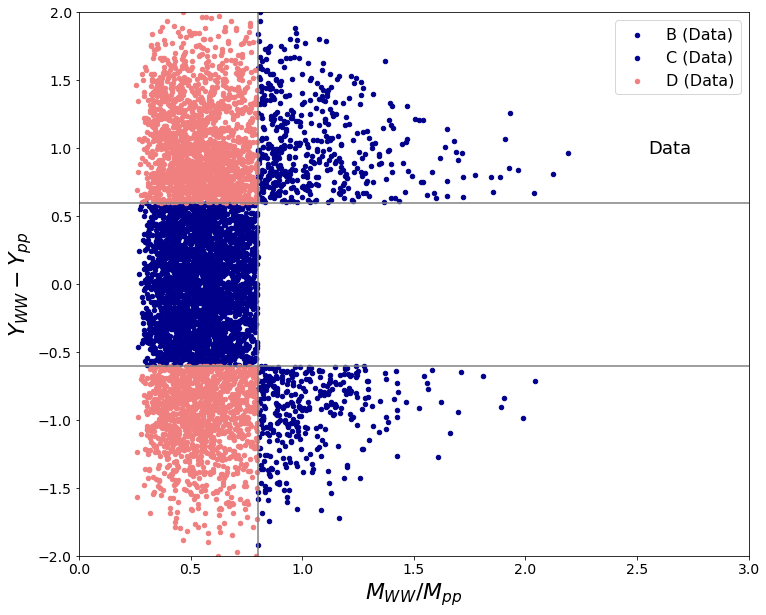

In [97]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 24
Number of events (C): 4
Number of events (D): 20


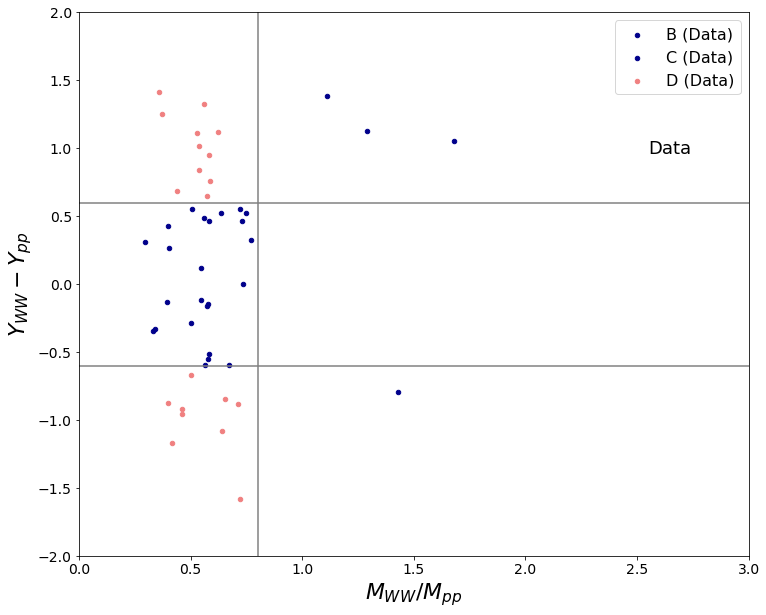

In [98]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [99]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9691993781577923 0.018515974017321087
0.9873383004982401 0.03391995609527372
1.0222750141650794 0.018869667182686525


In [100]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9959562935558806 0.013220835057705297


GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.203836
1      0.182544
2      0.165236
3      0.150929
4      0.138938
         ...   
195    0.259628
196    0.253174
197    0.246010
198    0.238130
199    0.229536
Length: 200, dtype: float64 0.12552985721186039
0     -0.157990
1     -0.150727
2     -0.144774
3     -0.139805
4     -0.135594
         ...   
195   -0.126973
196   -0.122892
197   -0.118530
198   -0.113891
199   -0.108979
Length: 200, dtype: float64 -0.10928796248216432
Diff_YWW_YX
0      0.084723
1      0.082586
2      0.080589
3      0.078719
4      0.076965
         ...   
195    0.058813
196    0.059471
197    0.060154
198    0.060862
199    0.061598
Length: 200, dtype: float64 0.048090986280489655
0     -0.066248
1     -0.065399
2     -0.064604
3     -0.063860
4     -0.063162
         ...   
195   -0.050582
196   -0.050719
197   -0.050861
198   -0.051009
199   -0.051164
Length: 200, dtype: float64 -0.050224203265960894
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.1

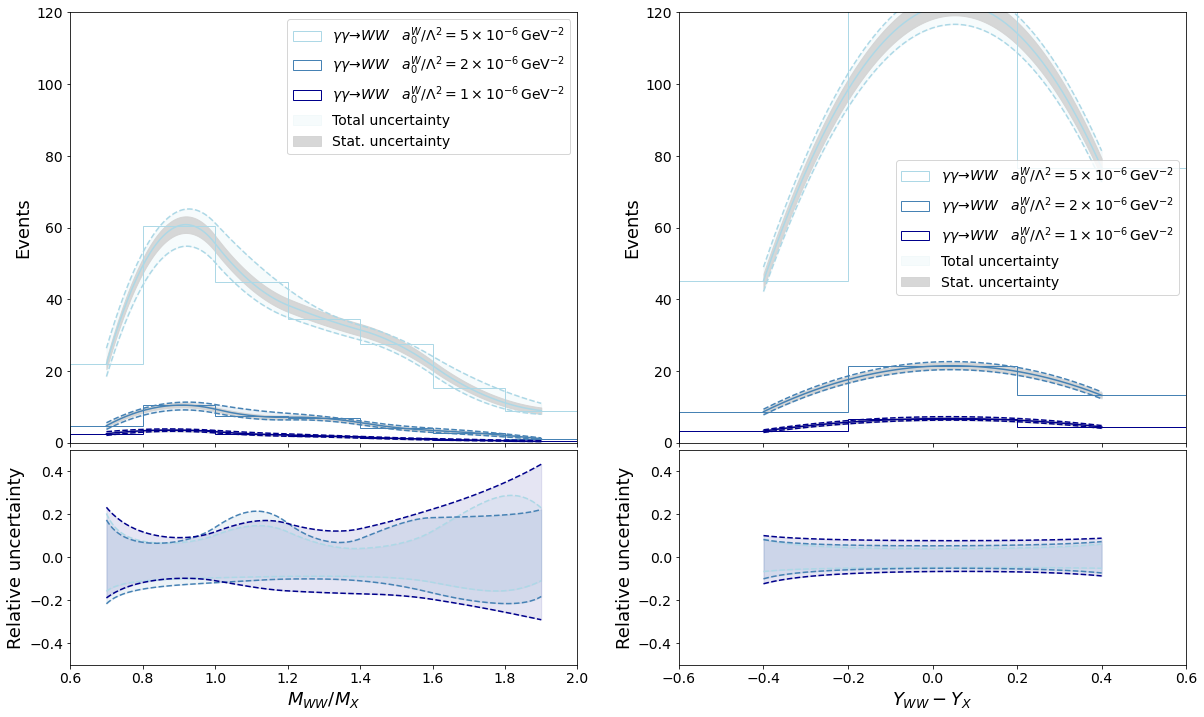

In [101]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,120.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.203836
1      0.182544
2      0.165236
3      0.150929
4      0.138938
         ...   
195    0.259628
196    0.253174
197    0.246010
198    0.238130
199    0.229536
Length: 200, dtype: float64 0.12552985721186039
0     -0.157990
1     -0.150727
2     -0.144774
3     -0.139805
4     -0.135594
         ...   
195   -0.126973
196   -0.122892
197   -0.118530
198   -0.113891
199   -0.108979
Length: 200, dtype: float64 -0.10928796248216432
Diff_YWW_YX
0      0.084723
1      0.082586
2      0.080589
3      0.078719
4      0.076965
         ...   
195    0.058813
196    0.059471
197    0.060154
198    0.060862
199    0.061598
Length: 200, dtype: float64 0.048090986280489655
0     -0.066248
1     -0.065399
2     -0.064604
3     -0.063860
4     -0.063162
         ...   
195   -0.050582
196   -0.050719
197   -0.050861
198   -0.051009
199   -0.051164
Length: 200, dtype: float64 -0.050224203265960894
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.1

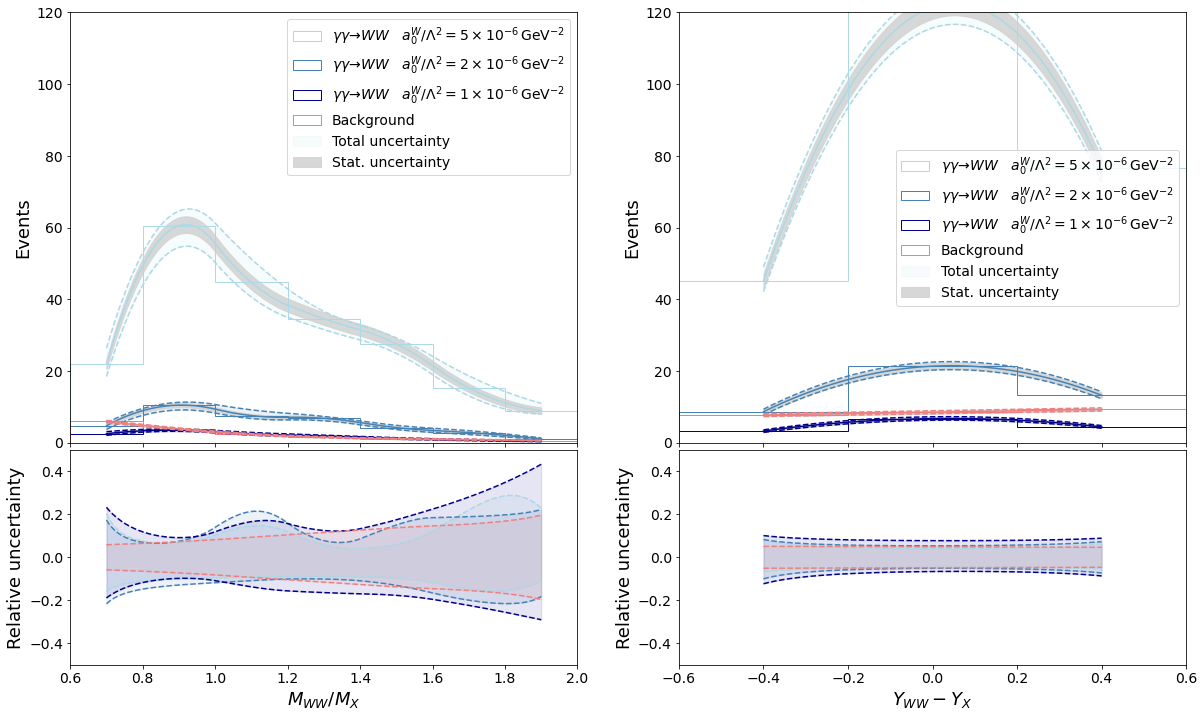

In [102]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [103]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [104]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [105]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"
var_name_trigger_ = ""
if lepton_type == 'muon':
    var_name_trigger_ = "sf_muon_trigger"
elif lepton_type == 'electron':
    var_name_trigger_ = "sf_electron_trigger"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    var_name_trigger_up__ = "syst_up_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    var_name_trigger_dw__ = "syst_dw_{}".format( var_name_trigger_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.05482506975306656, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267528895, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398857047, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355, 'syst_up_proton_scale_arm1': 0.4253156439537662, 'syst_dw_proton_scale_arm1': -0.3160781558874852, 'syst_up_proton_scale': 0.5672923714183038, 'syst_dw_proton_scale': -0.5992369131002344, 'syst_up_proton_eff': 0.16204530486951363, 'syst_dw_proton_eff': -0.16204530486951185, 'syst_up_total': 0.5986494252802941, 'syst_dw_total': -0.6236697742806215}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central':

In [106]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        10.697901   
stat                                            0.538228   
syst_up_jes                                     0.081726   
syst_dw_jes                                    -0.054825   
syst_up_jer                                     0.054846   
syst_dw_jer                                     0.000000   
syst_up_sf_muon_id                              0.005678   
syst_dw_sf_muon_id                             -0.005678   
syst_up_sf_muon_trigger                         0.021721   
syst_dw_sf_muon_trigger                        -0.021721   
syst_up_sf_prefiring                            0.010516   
syst_dw_sf_prefiring                           -0.010516   
syst_up_proton_scale_arm0                       0.375403   
syst_dw_proton_scale_arm0                      -0.509097   
syst_up_proton_scale_arm1                       0.425316   
syst_dw_proton_scale_arm1                      -0.316078   
syst_up_proton_scale                            0.567292   
syst_dw_proton_scale                           -0.599237   
syst_up_proton_eff                              0.162045   
syst_dw_proton_eff                             -0.162045   
syst_up_total                                   0.598649   
syst_dw_total                                  -0.623670   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        36.871563   
stat                                            1.130486   
syst_up_jes                                     0.287287   
syst_dw_jes                                    -0.349660   
syst_up_jer                                     0.103289   
syst_dw_jer                                    -0.067610   
syst_up_sf_muon_id                              0.018467   
syst_dw_sf_muon_id                             -0.018467   
syst_up_sf_muon_trigger                         0.075051   
syst_dw_sf_muon_trigger                        -0.075051   
syst_up_sf_prefiring                            0.020307   
syst_dw_sf_prefiring                           -0.020306   
syst_up_proton_scale_arm0                       0.791470   
syst_dw_proton_scale_arm0                      -0.781831   
syst_up_proton_scale_arm1                       1.146112   
syst_dw_proton_scale_arm1                      -0.967630   
syst_up_proton_scale                            1.392838   
syst_dw_proton_scale                           -1.244013   
syst_up_proton_eff                              0.526968   
syst_dw_proton_eff                             -0.526968   
syst_up_total                                   1.522262   
syst_dw_total                                  -1.399458   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       216.620230  
stat                                            4.365751  
syst_up_jes                                     1.414140  
syst_dw_jes                                    -1.441210  
syst_up_jer                                     0.267223  
syst_dw_jer                                    -0.254624  
syst_up_sf_muon_id                              0.104653  
syst_dw_sf_muon_id                             -0.104653  
syst_up_sf_muon_trigger                         0.442059  
syst_dw_sf_muon_trigger                        -0.442059  
syst_up_sf_prefiring                            0.163047  
syst_dw_sf_prefiring                           -0.163047  
syst_up_proton_scale_arm0                       3.722833  
syst_dw_proton_scale_arm0                      -4.988347  
syst_up_proton_scale_arm1                       5.428237  
syst_dw_proton_scale_arm1                      -5.143104  
syst_up_proton_scale                            6.582192  
syst_dw_proton_scale                           -7.164853  
syst_up_proton_eff                              2.897117  
syst_dw_proton_eff                             -2.897117  
syst_up_total             

In [107]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [108]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
#     var_name_lepton_id_ = ""
#     if lepton_type == 'muon':
#         var_name_lepton_id_ = "sf_muon_id"
#     elif lepton_type == 'electron':
#         var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, var_name_trigger_, 'sf_prefiring', 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_trigger_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_sf_prefiring" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 10.697901058217795, 'stat': 0.5382280016666428, 'syst_up_jes': 0.08172602218868619, 'syst_dw_jes': -0.08172602218868619, 'syst_up_jer': 0.054845564636735844, 'syst_dw_jer': -0.054845564636735844, 'syst_up_sf_muon_id': 0.005678358659174876, 'syst_dw_sf_muon_id': -0.005678358659174876, 'syst_up_sf_muon_trigger': 0.021721337267532448, 'syst_dw_sf_muon_trigger': -0.021721337267532448, 'syst_up_sf_prefiring': 0.010515701398858823, 'syst_dw_sf_prefiring': -0.010515701398858823, 'syst_up_proton_scale_arm0': 0.37540276727482436, 'syst_dw_proton_scale_arm0': -0.5090967269514355, 'syst_up_proton_scale_arm1': 0.4253156439537662, 'syst_dw_proton_scale_arm1': -0.3160781558874852, 'syst_up_proton_scale': 0.5992369131002344, 'syst_dw_proton_scale': -0.5992369131002344, 'syst_up_proton_eff': 0.16204530486951363, 'syst_dw_proton_eff': -0.16204530486951363, 'syst_up_total': 0.6290034799116151, 'syst_dw_total': -0.6290034799116151}, 'GGToWW-AQGC-2018-muon-A0W

In [109]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        10.697901   
stat                                            0.538228   
syst_up_jes                                     0.081726   
syst_dw_jes                                    -0.081726   
syst_up_jer                                     0.054846   
syst_dw_jer                                    -0.054846   
syst_up_sf_muon_id                              0.005678   
syst_dw_sf_muon_id                             -0.005678   
syst_up_sf_muon_trigger                         0.021721   
syst_dw_sf_muon_trigger                        -0.021721   
syst_up_sf_prefiring                            0.010516   
syst_dw_sf_prefiring                           -0.010516   
syst_up_proton_scale_arm0                       0.375403   
syst_dw_proton_scale_arm0                      -0.509097   
syst_up_proton_scale_arm1                       0.425316   
syst_dw_proton_scale_arm1                      -0.316078   
syst_up_proton_scale                            0.599237   
syst_dw_proton_scale                           -0.599237   
syst_up_proton_eff                              0.162045   
syst_dw_proton_eff                             -0.162045   
syst_up_total                                   0.629003   
syst_dw_total                                  -0.629003   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        36.871563   
stat                                            1.130486   
syst_up_jes                                     0.349660   
syst_dw_jes                                    -0.349660   
syst_up_jer                                     0.103289   
syst_dw_jer                                    -0.103289   
syst_up_sf_muon_id                              0.018467   
syst_dw_sf_muon_id                             -0.018467   
syst_up_sf_muon_trigger                         0.075051   
syst_dw_sf_muon_trigger                        -0.075051   
syst_up_sf_prefiring                            0.020307   
syst_dw_sf_prefiring                           -0.020307   
syst_up_proton_scale_arm0                       0.791470   
syst_dw_proton_scale_arm0                      -0.781831   
syst_up_proton_scale_arm1                       1.146112   
syst_dw_proton_scale_arm1                      -0.967630   
syst_up_proton_scale                            1.392838   
syst_dw_proton_scale                           -1.392838   
syst_up_proton_eff                              0.526968   
syst_dw_proton_eff                             -0.526968   
syst_up_total                                   1.535256   
syst_dw_total                                  -1.535256   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       216.620230  
stat                                            4.365751  
syst_up_jes                                     1.441210  
syst_dw_jes                                    -1.441210  
syst_up_jer                                     0.267223  
syst_dw_jer                                    -0.267223  
syst_up_sf_muon_id                              0.104653  
syst_dw_sf_muon_id                             -0.104653  
syst_up_sf_muon_trigger                         0.442059  
syst_dw_sf_muon_trigger                        -0.442059  
syst_up_sf_prefiring                            0.163047  
syst_dw_sf_prefiring                           -0.163047  
syst_up_proton_scale_arm0                       3.722833  
syst_dw_proton_scale_arm0                      -4.988347  
syst_up_proton_scale_arm1                       5.428237  
syst_dw_proton_scale_arm1                      -5.143104  
syst_up_proton_scale                            7.164853  
syst_dw_proton_scale                           -7.164853  
syst_up_proton_eff                              2.897117  
syst_dw_proton_eff                             -2.897117  
syst_up_total             

In [110]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

10.559999999999999 ± 0.45956501172304237


In [111]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                        10.697901   
stat                                            0.538228   
syst_up_jes                                     0.081726   
syst_dw_jes                                    -0.081726   
syst_up_jer                                     0.054846   
syst_dw_jer                                    -0.054846   
syst_up_sf_muon_id                              0.005678   
syst_dw_sf_muon_id                             -0.005678   
syst_up_sf_muon_trigger                         0.021721   
syst_dw_sf_muon_trigger                        -0.021721   
syst_up_sf_prefiring                            0.010516   
syst_dw_sf_prefiring                           -0.010516   
syst_up_proton_scale_arm0                       0.375403   
syst_dw_proton_scale_arm0                      -0.509097   
syst_up_proton_scale_arm1                       0.425316   
syst_dw_proton_scale_arm1                      -0.316078   
syst_up_proton_scale                            0.599237   
syst_dw_proton_scale                           -0.599237   
syst_up_proton_eff                              0.162045   
syst_dw_proton_eff                             -0.162045   
syst_up_total                                   0.629003   
syst_dw_total                                  -0.629003   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        36.871563   
stat                                            1.130486   
syst_up_jes                                     0.349660   
syst_dw_jes                                    -0.349660   
syst_up_jer                                     0.103289   
syst_dw_jer                                    -0.103289   
syst_up_sf_muon_id                              0.018467   
syst_dw_sf_muon_id                             -0.018467   
syst_up_sf_muon_trigger                         0.075051   
syst_dw_sf_muon_trigger                        -0.075051   
syst_up_sf_prefiring                            0.020307   
syst_dw_sf_prefiring                           -0.020307   
syst_up_proton_scale_arm0                       0.791470   
syst_dw_proton_scale_arm0                      -0.781831   
syst_up_proton_scale_arm1                       1.146112   
syst_dw_proton_scale_arm1                      -0.967630   
syst_up_proton_scale                            1.392838   
syst_dw_proton_scale                           -1.392838   
syst_up_proton_eff                              0.526968   
syst_dw_proton_eff                             -0.526968   
syst_up_total                                   1.535256   
syst_dw_total                                  -1.535256   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
central                                       216.620230   10.560000  
stat                                            4.365751    0.459565  
syst_up_jes                                     1.441210   -1.000000  
syst_dw_jes                                    -1.441210   -1.000000  
syst_up_jer                                     0.267223   -1.000000  
syst_dw_jer                                    -0.267223   -1.000000  
syst_up_sf_muon_id                              0.104653   -1.000000  
syst_dw_sf_muon_id                             -0.104653   -1.000000  
syst_up_sf_muon_trigger                         0.442059   -1.000000  
syst_dw_sf_muon_trigger                        -0.442059   -1.000000  
syst_up_sf_prefiring                            0.163047   -1.000000  
syst_dw_sf_prefiring                           -0.163047   -1.000000  
syst_up_proton_scale_arm0                       3.722833   -1.000000  
syst_dw_proton_scale_arm0                      -4.988347   -1.000000  
syst_up_proton_scale_arm1                       5.428237   -1.000000  
syst_dw_proton_scale_arm1                      -5.143104   -1.000000  
syst_up_proton_scale                            7.164853  

In [112]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-2018-muon-A0W1e-6  \
stat                                            5.031155   
syst_up_jes                                     0.763944   
syst_dw_jes                                    -0.763944   
syst_up_jer                                     0.512676   
syst_dw_jer                                    -0.512676   
syst_up_sf_muon_id                              0.053079   
syst_dw_sf_muon_id                             -0.053079   
syst_up_sf_muon_trigger                         0.203043   
syst_dw_sf_muon_trigger                        -0.203043   
syst_up_sf_prefiring                            0.098297   
syst_dw_sf_prefiring                           -0.098297   
syst_up_proton_scale_arm0                       3.509125   
syst_dw_proton_scale_arm0                      -4.758847   
syst_up_proton_scale_arm1                       3.975692   
syst_dw_proton_scale_arm1                      -2.954581   
syst_up_proton_scale                            5.601444   
syst_dw_proton_scale                           -5.601444   
syst_up_proton_eff                              1.514739   
syst_dw_proton_eff                             -1.514739   
syst_up_total                                   5.879691   
syst_dw_total                                  -5.879691   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
stat                                            3.066010   
syst_up_jes                                     0.948318   
syst_dw_jes                                    -0.948318   
syst_up_jer                                     0.280133   
syst_dw_jer                                    -0.280133   
syst_up_sf_muon_id                              0.050085   
syst_dw_sf_muon_id                             -0.050085   
syst_up_sf_muon_trigger                         0.203548   
syst_dw_sf_muon_trigger                        -0.203548   
syst_up_sf_prefiring                            0.055074   
syst_dw_sf_prefiring                           -0.055074   
syst_up_proton_scale_arm0                       2.146560   
syst_dw_proton_scale_arm0                      -2.120417   
syst_up_proton_scale_arm1                       3.108391   
syst_dw_proton_scale_arm1                      -2.624327   
syst_up_proton_scale                            3.777541   
syst_dw_proton_scale                           -3.777541   
syst_up_proton_eff                              1.429200   
syst_dw_proton_eff                             -1.429200   
syst_up_total                                   4.163794   
syst_dw_total                                  -4.163794   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
stat                                            2.015394    4.351941  
syst_up_jes                                     0.665316   -1.000000  
syst_dw_jes                                    -0.665316   -1.000000  
syst_up_jer                                     0.123360   -1.000000  
syst_dw_jer                                    -0.123360   -1.000000  
syst_up_sf_muon_id                              0.048312   -1.000000  
syst_dw_sf_muon_id                             -0.048312   -1.000000  
syst_up_sf_muon_trigger                         0.204071   -1.000000  
syst_dw_sf_muon_trigger                        -0.204071   -1.000000  
syst_up_sf_prefiring                            0.075269   -1.000000  
syst_dw_sf_prefiring                           -0.075269   -1.000000  
syst_up_proton_scale_arm0                       1.718599   -1.000000  
syst_dw_proton_scale_arm0                      -2.302807   -1.000000  
syst_up_proton_scale_arm1                       2.505877   -1.000000  
syst_dw_proton_scale_arm1                      -2.374249   -1.000000  
syst_up_proton_scale                            3.307564   -1.000000  
syst_dw_proton_scale                           -3.307564   -1.000000  
syst_up_proton_eff                              1.337418   -1.000000  
syst_dw_proton_eff                  

In [113]:
save_table_systematics = False

if save_table_systematics:
    file_path_ = ""
    file_str_ = "table_systematics"
    if norm_to_1fb:
        file_str_ += "-norm_to_1fb"
    if data_sample == '2017':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2017-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2017-electron" + ".h5"
    elif data_sample == '2018':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2018-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2018-electron" + ".h5"

    with pd.HDFStore( file_path_, 'w' ) as store_:
        store_[ "table_systematics" ] = df_sum_weights__

In [114]:
if save_table_systematics:
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )

In [115]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [116]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [117]:
# help( df_groupby.transform )

In [118]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [119]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )